In [55]:
# Importations des librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy import interpolate

## Partie1: Chargement des données
Chargez les 5 fichiers CSV à l'aide de Pandas. Stockez le résultat du chargement dans la variable df.

Les colonnes du fichier sont uniquement séparées par des virgules.

In [56]:
# Charger 5 fichier csv  
df_EdStatsData = pd.read_csv("EdStatsData.csv", sep=',')
df_EdStatsCountry = pd.read_csv("EdStatsCountry.csv", sep=',')
df_EdStatsSeries = pd.read_csv("EdStatsSeries.csv", sep=',')
df_EdStatsCountry_Series = pd.read_csv("EdStatsCountry-Series.csv", sep=',')
df_EdStatsFootNote = pd.read_csv("EdStatsFootNote.csv", sep=',')

Fusioner deux df_EdStatsData et df_EdStatsCountry avec la colonnes commun Country Code

In [57]:
# Fusioner des Tableaux 
df = pd.merge(df_EdStatsData, df_EdStatsCountry, how='outer', on= 'Country Code')


Pouvez-vous afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées ?

In [58]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1_1: Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

Combien de lignes et colonnes sont contenues dans df ?

In [59]:
# Taille de notre dataframe
df.shape

(886930, 101)

Comme vous pouvez le voir via la commande ci dessus, nous avons 886930 lignes de noms de pays, renseignées sur 101 variables différentes. Les contenus des colonnes sont la list suivant:

In [60]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975',
       ...
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object', length=101)

les informations contenues dans les lignes(une list des noms des pays)

In [61]:
df['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [62]:
nombre_indicateur = df['Indicator Name'].unique()
len(nombre_indicateur)

3665

## Partie2: Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

Affichez le type des colonnes. Le premier reflexe devrait être de vérifier que les variables ont bien été importées dans le bon type :

In [63]:
# Type des données de df
df.dtypes

Country Name                     object
Country Code                     object
Indicator Name                   object
Indicator Code                   object
1970                            float64
                                 ...   
Latest agricultural census       object
Latest industrial data          float64
Latest trade data               float64
Latest water withdrawal data     object
Unnamed: 31                     float64
Length: 101, dtype: object

 Comporte-t-il beaucoup de données manquantes?

In [64]:
# Taux valeurs manquantes
df.isna().mean()

Country Name                    0.000000
Country Code                    0.000000
Indicator Name                  0.000000
Indicator Code                  0.000000
1970                            0.918496
                                  ...   
Latest agricultural census      0.413223
Latest industrial data          0.557851
Latest trade data               0.235537
Latest water withdrawal data    0.260331
Unnamed: 31                     1.000000
Length: 101, dtype: float64

 Il y a beaucoup des NaN dans les colonnes des années.
 Afficher les 50 colonnes qui ont plus NAN

In [65]:
# Taux pourcentage valeurs manquestes pour 50ème premières colonnes 
print("plus null en colonne =", df.isna().mean().nlargest(50)*100)

plus null en colonne = Unnamed: 69                         100.000000
Unnamed: 31                         100.000000
2017                                 99.983877
2016                                 98.144160
1971                                 95.993258
1973                                 95.992356
1972                                 95.984012
1974                                 95.971497
1979                                 95.849842
1976                                 95.773849
1982                                 95.770692
1989                                 95.767422
1977                                 95.763589
1978                                 95.763364
1983                                 95.663694
1988                                 95.653321
1984                                 95.647233
1987                                 95.643286
1981                                 95.627953
1986                                 95.560867
2020                                 

Comme vous pouvez le voir via la commande ci dessus, nous avons deux colonnes 100% NAN et par example 99.98 de la colonne d'année 2017 est NaN. En plus les années '1970 à '1997' et '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095','2100' sont les années avec beaucoup de NaN.

<AxesSubplot:>

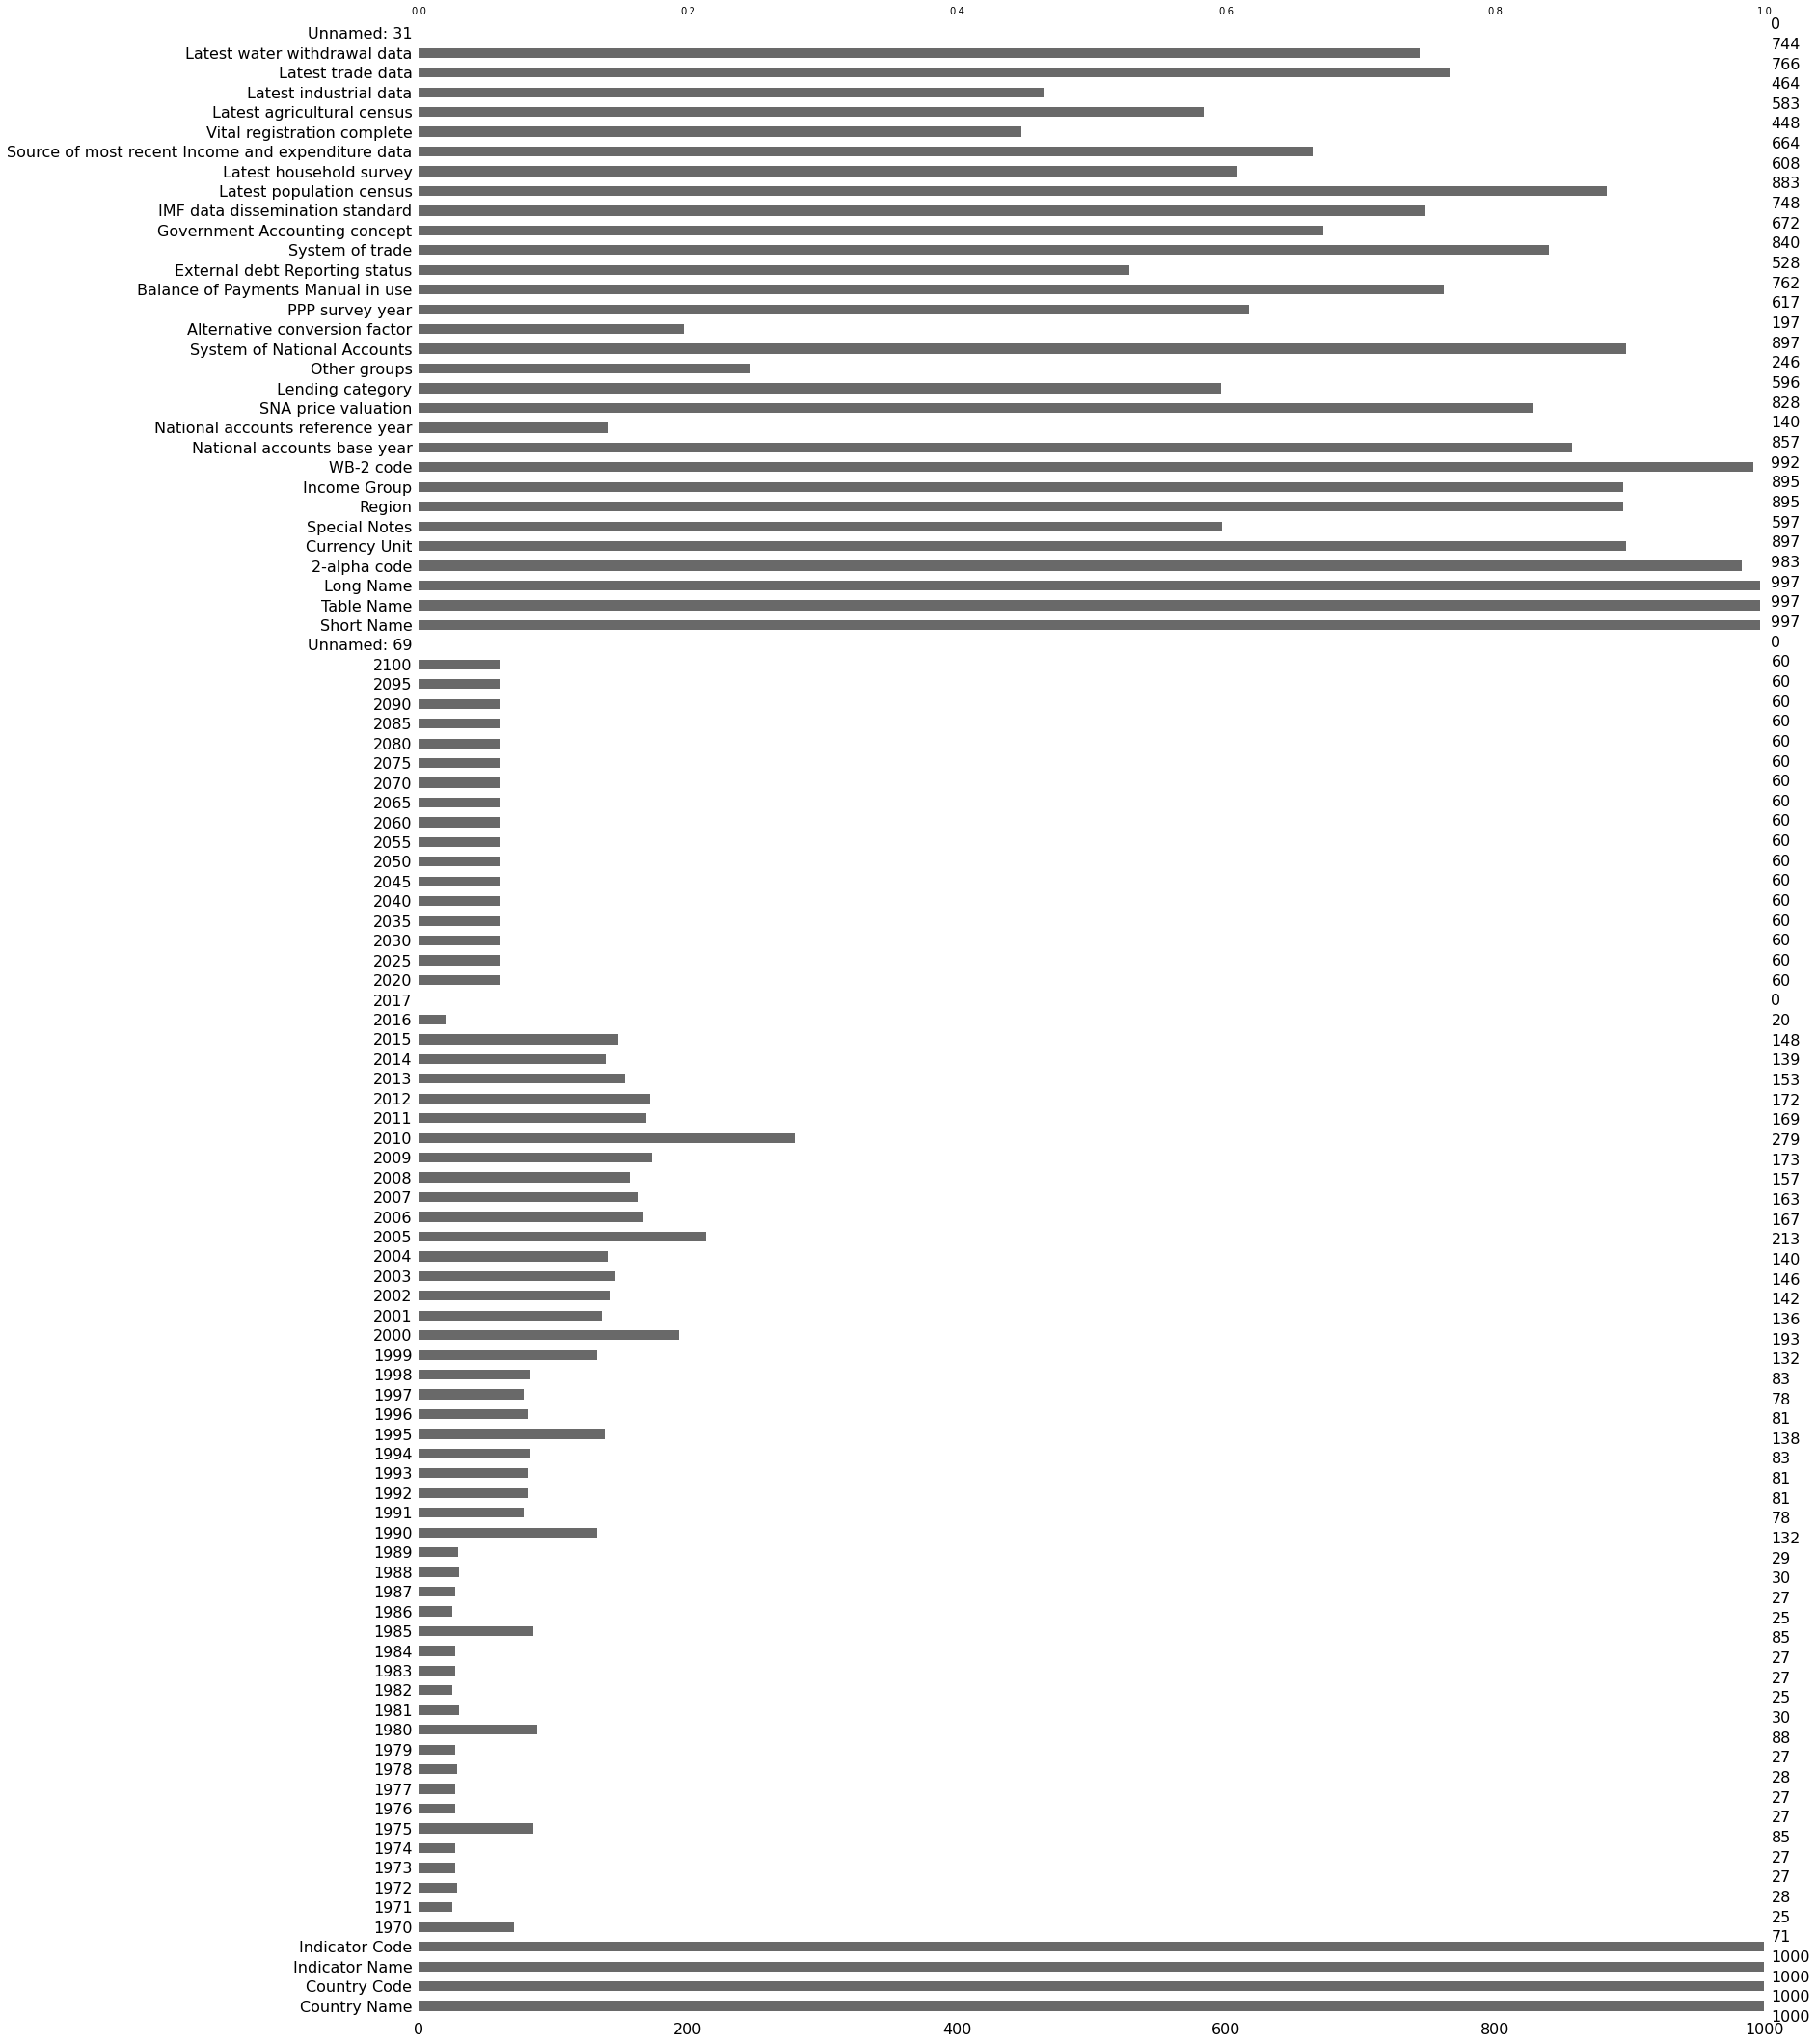

In [66]:
# mesure la corrélation de nullité 
msno.bar(df.sample(1000))

Existe-t-il des valeurs duplicates dans ce jeu de données ?

In [67]:
# Détecter duplivatas
df.duplicated().sum()

0

Dans le dataframe il n'y a pas de données dupliquées

## Partie 3: Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

Il y a beaucoup de Nan dans le jeu de données et donc dans le premier depart les colonnes avec des taux de remplissage plus élevés sont intéressants. Nous avons vu le porsantage de null des colonnes dans partie précedantes, il y a deux colonnes complètement  Nan et les plus NaN sont dans les 2017 et 2016 et entres les années 1970 à 1998 et ensuite il y a des années sans données de 2019 à 2100. Donc nous choissions les années plus recents avec plus des données de 2010 à 2015. 


### 3.1: Quels sont les colonnes contenant des informations pertinentes? 
'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010', '2011', '2012', '2013', '2014', '2015', 'Currency Unit','Region', 'Income Group'

### 3.2: Quels sont les lignes contenant des informations pertinentes

Nous avons combien pays unique dans notre jeu de données?

In [68]:
df['Country Name'].nunique()

242

 Nous avons combien indicateurs unique dans notre jeu de données?

In [69]:
df['Indicator Name'].nunique()

3665

Dans la page https://datatopics.worldbank.org/education/indicators nous trouvons les indicateurs et ceux qui seraient pertinent. Nous trouvons que les indicateurs ont été divisé en 19 groupes suivants:
01 Early Childhood Education
02 Primary
03 Secondary
04 Vocational & Post-secondary Non-Tertiary
05 Tertiary
06 Teachers
07 Expenditures
08 Literacy
09 Learning Outcomes
10 Attainment
11 Technology Skills
12 Population
13 Labor
14 Background
15 School Safety/Violence
16 SABER
17 Global Achievement
18 Learning Poverty
19 Education Equality
Notre start_up dela EdTech Academy propose des contenus de formation en ligne pour niveau lycée et université. On souhaite identifier les pays ayant un fort potentiel économique pour notre client, voici la liste des critères que l'on recherche :

 - Le taux d'accès d'internet parce que notre formation est en_ligne
 - Notre formation sera pour le niveau lycée et université donc il correcepand la populations des gens qui ont 15_24 ans et la population ayant l'âge officiel d'entrée dans l'enseignement secondaire
 - Taux d'admission (Inscriptions dans l'enseignement supérieur)
 - Dépenses d'éducation 
 - Croissance démographique
 
Donc nous allons choisir 6 indicateurs suivants:

 * Internet users (per 100 people)
 * Population, ages 15-24, total
 * Expenditure on education as % of total government expenditure (%)
 * Population of the official entrance age to secondary general education, both sexes (number)
 * Enrolment in tertiary education, all programmes, both sexes (number)
 * Population growth (annual %)
et en filtrant sur site nous voyons que pour les années 2010 à 2015 notre jeu de données a assez bien des informations 

## Partie4: Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Pour répondre de cette partie nous avons besoin d'un nettoyage notre jeu de données

### 4.1: Nettoyez votre jeu de données  

#### 4.1.1: Filtrage sur les colonnes
Pour faire un nettoyage sur les colonnes contenant des informations pertinentes ('Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010', '2011', '2012', '2013', '2014', '2015', 'Currency Unit','Region', 'Income Group'),Nous supprimons les années et les colonnes  qui ont pas les informations pertinentes.


In [70]:
# Supprimer les colonnes toutes null,nan
column_with_nan = df.columns[df.isna().all()]
for column in column_with_nan:
    if df[column].isna().any():
        df.drop(column, axis=1, inplace=True)

# supprimer les années 1970 à 2009(plus Nan)
df.drop(df.iloc[:, 4:44], inplace=True, axis = 1) 

# Supprimer les années avec les minimum taux remplissages 
df1= df.drop(labels=['2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095','2100', 'Short Name','Table Name', 'Long Name', '2-alpha code','WB-2 code', 'Special Notes', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data'], axis = 1)


Pouvez-vous afficher les colonnes du dataframe pour vérifier que les données sont bien nettoyé ?

In [71]:
df1.shape

(886930, 13)

Le nombre de colonne a diminué de 101 à 13. Afficher la liste des colonnes contenant des informations pertinentes: 

In [72]:
# les colonnes contenant des informations pertinentes
df1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010', '2011', '2012', '2013', '2014', '2015', 'Currency Unit',
       'Region', 'Income Group'],
      dtype='object')

#### 4.1.2:  Filtrage avec une liste des indicators valides 

In [73]:
 # Filter df avec une liste des indicateurs
VALID_indicateur = ["Expenditure on education as % of total government expenditure (%)","Internet users (per 100 people)","Enrolment in tertiary education, all programmes, both sexes (number)" , "Population, ages 15-24, total", "Population of the official entrance age to secondary general education, both sexes (number)", "Population growth (annual %)"]
mask = df1['Indicator Name'].isin(VALID_indicateur)
df2 = df1[mask]

Pouvez-vous afficher les lignes du dataframe pour vérifier que les données sont bien nettoyé ?

In [74]:
df2.shape

(1452, 13)

Le nombre de lignes a diminué de 886930 à 1452. Afficher la liste des indicateurs contenant des informations pertinentes:

In [75]:
df2['Indicator Name'].unique

<bound method Series.unique of 1204      Enrolment in tertiary education, all programme...
1224      Expenditure on education as % of total governm...
1375                        Internet users (per 100 people)
2307                           Population growth (annual %)
2338      Population of the official entrance age to sec...
                                ...                        
884489    Expenditure on education as % of total governm...
884640                      Internet users (per 100 people)
885572                         Population growth (annual %)
885603    Population of the official entrance age to sec...
885747                        Population, ages 15-24, total
Name: Indicator Name, Length: 1452, dtype: object>

#### 4.1.3:  Filtre avec liste des payas valides

D'abord, Nous vérifions la liste de pays pour découvrir si toutes des données dans la colonne de Country Name sont les noms de pays ou non

In [76]:
# Vérifier la liste des pays qui restent
df2['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


Il y a des lignes qui sont l'ensemble des pays comme Arab World', 'East Asia & Pacific', donc d'abord nous supprimons les lignes qui sont un région et en suite nous allons vérifier le taux de remplissage de pays selon des indicateurs et des années.

In [77]:
# Filter df avec une liste des pays
INVALID_pays = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World']
df2 = df2[~df2['Country Name'].isin(INVALID_pays)]
df2.shape

(1302, 13)

Le nombre de lignes a diminué de 1452 à 1302.

### 4.2: Visualisation notre dataframe pour decouvrir plus d'informations et nettoyer plus

La matrice de nullité msno.matrix est un affichage dense en données qui nous permet de sélectionner rapidement des modèles visuels dans l'achèvement des données.

<AxesSubplot:>

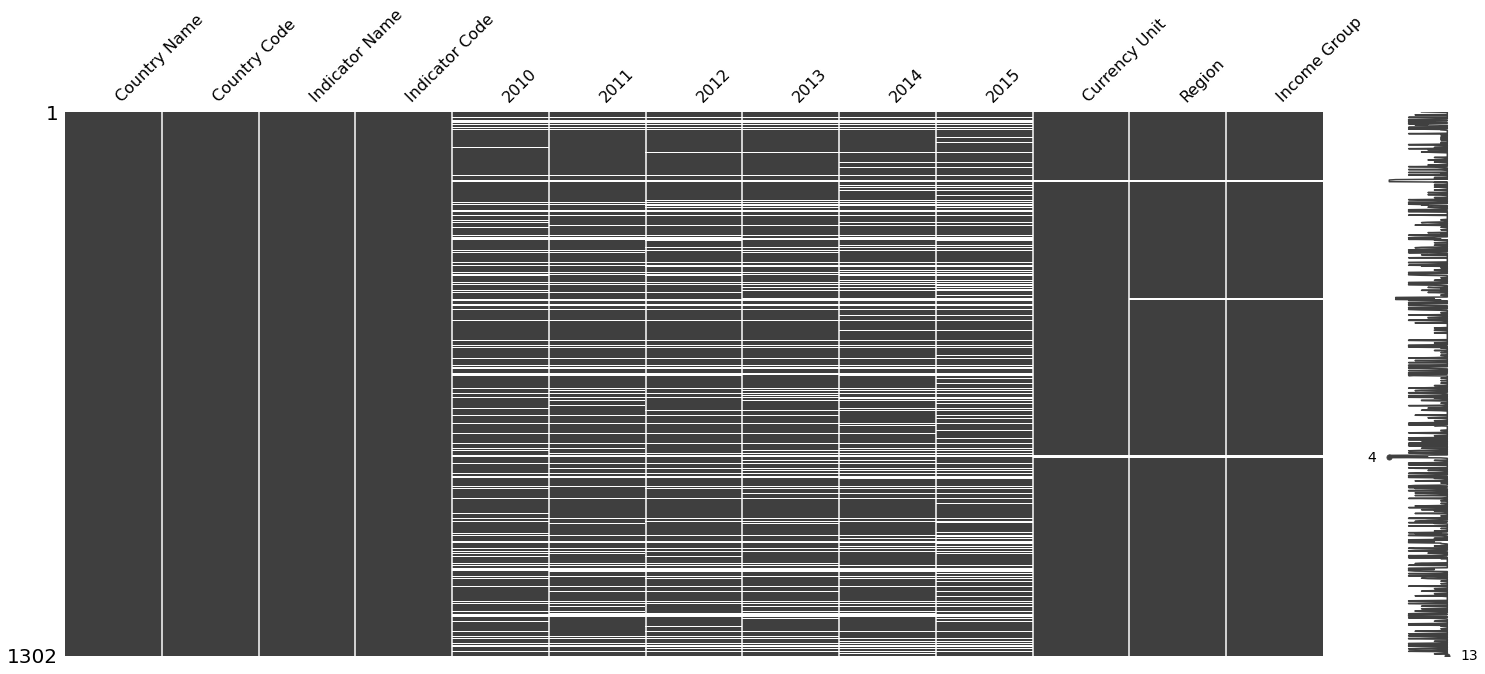

In [78]:
# Afficher les remplisage notre df
msno.matrix(df2)

<AxesSubplot:>

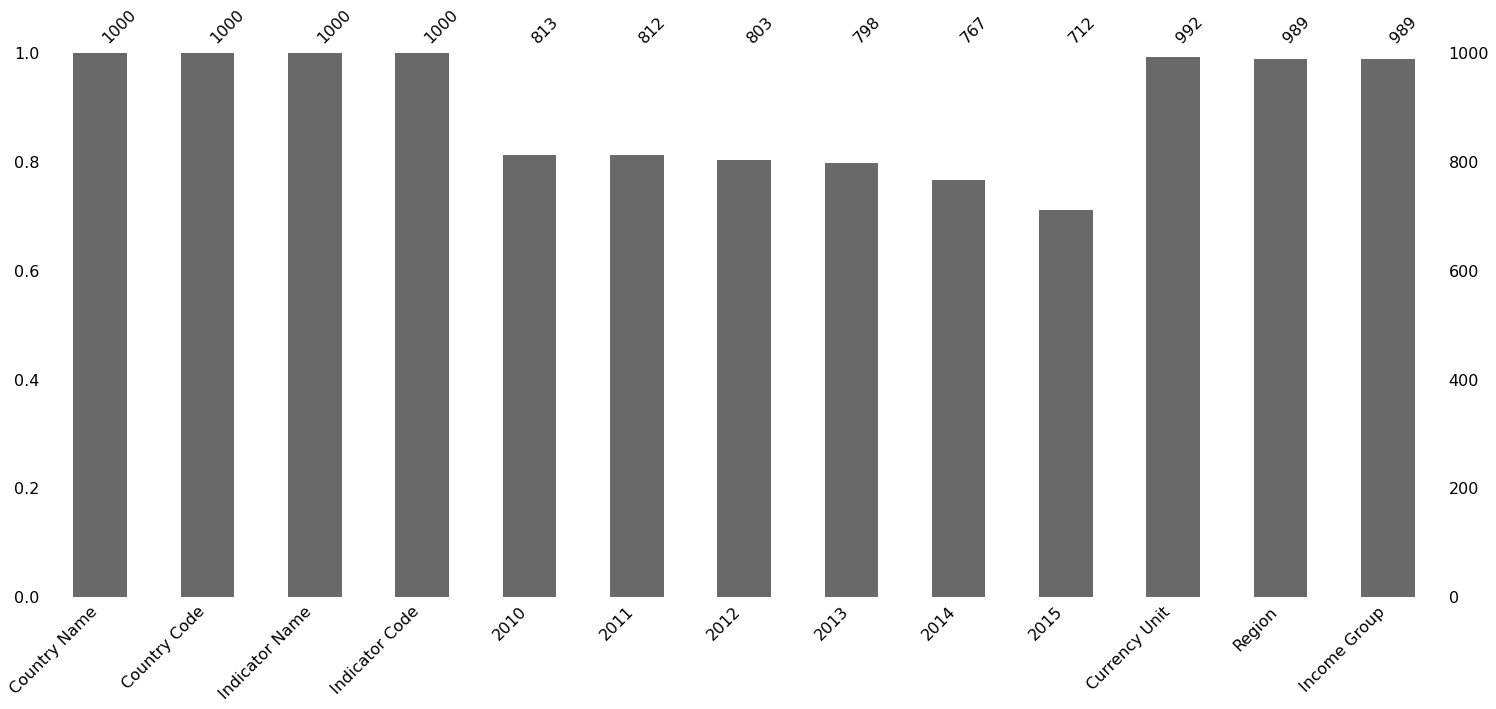

In [79]:
# mesure la corrélation de nullité 
msno.bar(df2.sample(1000))

Selons les diagrammes nous voyons qu'il y a toujours des NaN pour les pays pour certains des indicateurs. La facon de nettoyage de NaN qui restent : Supprimer les pays qui ont des Nan-null pour des indicators.

In [80]:
# Supprimer une ligne en fonction de plusieurs colonnes
df2.dropna(axis=0, how='any', subset=['2010','2011','2012','2013','2014','2015'], inplace=True)
df2.shape

(875, 13)

Pouvez-vous afficher la matrice de nullité  dataframe pour vérifier que les données sont bien nettoyé ?

<AxesSubplot:>

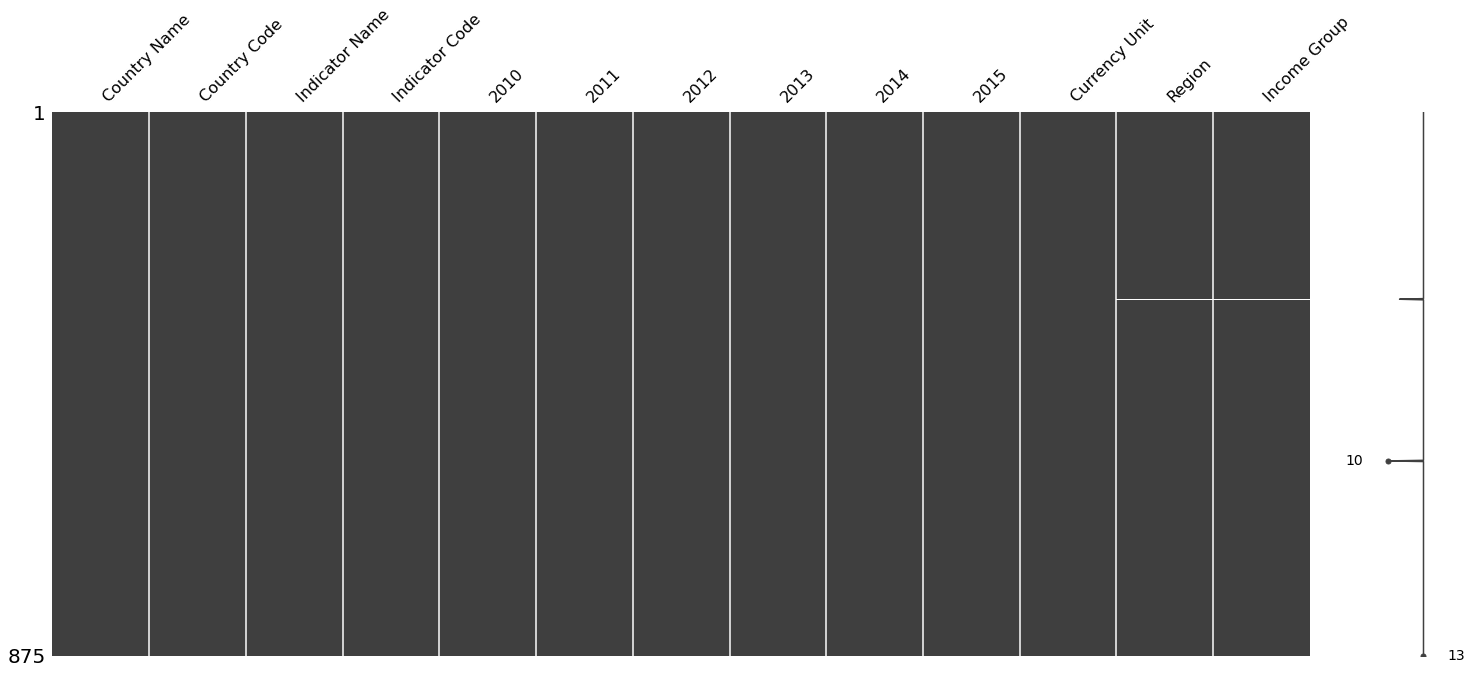

In [81]:
msno.matrix(df2)

Pouvez-vous afficher la fréquence des indicateurs ?

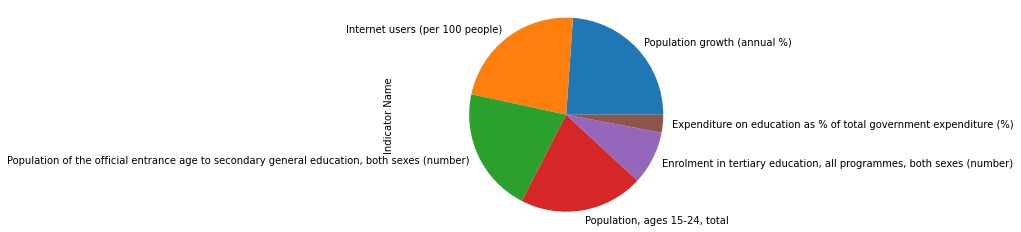

In [82]:
# VARIABLE QUALITATIVE
# Diagramme en secteurs
df2["Indicator Name"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

Nous trouvons qu'il n'y a pas une répartition égale des indicateurs . Afficher la densité des values selon des regions et nous attendons que le plus pertinante de région soit l'eroupe et central Asia

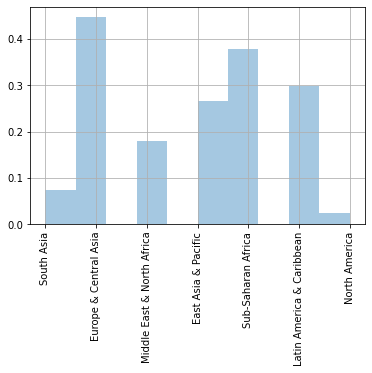

In [83]:
# Histogramme de region
df2["Region"].hist(density=True, alpha=0.4)
plt.xticks(rotation=90)
plt.show()

### 4.3: Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes pays

Affichez les statistiques élémentaires (min, max, moyenne)

In [84]:
# Statistiques
df2.describe()

,2010,2011,2012,2013,2014,2015
count,8.750000e+02,8.750000e+02,8.750000e+02,8.750000e+02,8.750000e+02,8.750000e+02
mean,1.657687e+06,1.669001e+06,1.674994e+06,1.675309e+06,1.686521e+06,1.687406e+06
std,1.157653e+07,1.158647e+07,1.156099e+07,1.150769e+07,1.147766e+07,1.142411e+07
min,-2.270802e+00,-2.628656e+00,-2.147571e+00,-3.040564e+00,-3.107229e+00,-2.467847e+00
25%,3.191062e+00,3.374009e+00,3.975000e+00,4.750000e+00,6.008220e+00,6.732211e+00
50%,8.000000e+02,8.040000e+02,8.080000e+02,8.110000e+02,8.150000e+02,8.140000e+02
75%,3.993480e+05,4.007240e+05,4.038970e+05,4.141781e+05,4.174105e+05,4.211925e+05
max,2.350568e+08,2.375485e+08,2.397136e+08,2.415350e+08,2.430027e+08,2.441202e+08


Quel est l'écart-type des indicateurs pour les pays?

In [85]:
df2.groupby(by=["Country Name", "Indicator Name"]).std()


2010  2011  \
Country Name Indicator Name                                                   
Afghanistan  Expenditure on education as % of total governme...   NaN   NaN   
             Internet users (per 100 people)                      NaN   NaN   
             Population growth (annual %)                         NaN   NaN   
             Population of the official entrance age to seco...   NaN   NaN   
             Population, ages 15-24, total                        NaN   NaN   
...                                                               ...   ...   
Zambia       Population, ages 15-24, total                        NaN   NaN   
Zimbabwe     Internet users (per 100 people)                      NaN   NaN   
             Population growth (annual %)                         NaN   NaN   
             Population of the official entrance age to seco...   NaN   NaN   
             Population, ages 15-24, total                        NaN   NaN   

                                                                 2012  2013  \
Country Name Indicator Name                                                   
Afghanistan  Expenditure on education as % of total governme...   NaN   NaN   
             Internet users (per 100 people)                      NaN   NaN   
             Population growth (annual %)                         NaN   NaN   
             Population of the official entrance age to seco...   NaN   NaN   
             Population, ages 15-24, total                        NaN   NaN   
...                                                               ...   ...   
Zambia       Population, ages 15-24, total                        NaN   NaN   
Zimbabwe     Internet users (per 100 people)                      NaN   NaN   
             Population growth (annual %)                         NaN   NaN   
             Population of the official entrance age to seco...   NaN   NaN   
             Population, ages 15-24, total                        NaN   NaN   

                                                                 2014  2015  
Country Name Indicator Name                                                  
Afghanistan  Expenditure on education as % of total governme...   NaN   NaN  
             Internet users (per 100 people)                      NaN   NaN  
             Population growth (annual %)                         NaN   NaN  
             Population of the official entrance age to seco...   NaN   NaN  
             Population, ages 15-24, total                        NaN   NaN  
...                                                               ...   ...  
Zambia       Population, ages 15-24, total                        NaN   NaN  
Zimbabwe     Internet users (per 100 people)                      NaN   NaN  
             Population growth (annual %)                         NaN   NaN  
             Population of the official entrance age to seco...   NaN   NaN  
             Population, ages 15-24, total                        NaN   NaN  

[875 rows x 6 columns]

Quel est la Médiane des indicateurs pour les pays? 

In [86]:
df2.groupby(by=["Country Name", "Indicator Name"]).median()

2010  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.706756e+01   
             Internet users (per 100 people)                     4.000000e+00   
             Population growth (annual %)                        2.812617e+00   
             Population of the official entrance age to seco...  7.276120e+05   
             Population, ages 15-24, total                       6.090239e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.720387e+06   
Zimbabwe     Internet users (per 100 people)                     6.400000e+00   
             Population growth (annual %)                        1.976756e+00   
             Population of the official entrance age to seco...  3.405250e+05   
             Population, ages 15-24, total                       3.389035e+06   

                                                                         2011  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.604843e+01   
             Internet users (per 100 people)                     5.000000e+00   
             Population growth (annual %)                        3.095119e+00   
             Population of the official entrance age to seco...  7.611120e+05   
             Population, ages 15-24, total                       6.330684e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.786411e+06   
Zimbabwe     Internet users (per 100 people)                     8.400000e+00   
             Population growth (annual %)                        2.109672e+00   
             Population of the official entrance age to seco...  3.401520e+05   
             Population, ages 15-24, total                       3.389423e+06   

                                                                         2012  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.035680e+01   
             Internet users (per 100 people)                     5.454545e+00   
             Population growth (annual %)                        3.272703e+00   
             Population of the official entrance age to seco...  7.925070e+05   
             Population, ages 15-24, total                       6.569239e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.854607e+06   
Zimbabwe     Internet users (per 100 people)                     1.200000e+01   
             Population growth (annual %)                        2.228306e+00   
             Population of the official entrance age to seco...  3.419050e+05   
             Population, ages 15-24, total                       3.383141e+06   

                                                                         2013  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.410280e+01   
             Internet users (per 100 people)                     5.900000e+00   
             Population growth (annual %)                        3.315224e+00   
             Population of the official entrance age to seco...  8.217800e+05   
             Population, ages 15-24, total                       6.803785e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.924614e+06   
Zimbabwe     Internet users (per 100 people)                     1.550000e+01   
             Population growth (annual %)                        2.309366e+00   
             Populat

Quel est la moyenne des indicateurs pour les pays?

In [87]:
df2.groupby(by=["Country Name","Indicator Name"]).mean()


2010  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.706756e+01   
             Internet users (per 100 people)                     4.000000e+00   
             Population growth (annual %)                        2.812617e+00   
             Population of the official entrance age to seco...  7.276120e+05   
             Population, ages 15-24, total                       6.090239e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.720387e+06   
Zimbabwe     Internet users (per 100 people)                     6.400000e+00   
             Population growth (annual %)                        1.976756e+00   
             Population of the official entrance age to seco...  3.405250e+05   
             Population, ages 15-24, total                       3.389035e+06   

                                                                         2011  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.604843e+01   
             Internet users (per 100 people)                     5.000000e+00   
             Population growth (annual %)                        3.095119e+00   
             Population of the official entrance age to seco...  7.611120e+05   
             Population, ages 15-24, total                       6.330684e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.786411e+06   
Zimbabwe     Internet users (per 100 people)                     8.400000e+00   
             Population growth (annual %)                        2.109672e+00   
             Population of the official entrance age to seco...  3.401520e+05   
             Population, ages 15-24, total                       3.389423e+06   

                                                                         2012  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.035680e+01   
             Internet users (per 100 people)                     5.454545e+00   
             Population growth (annual %)                        3.272703e+00   
             Population of the official entrance age to seco...  7.925070e+05   
             Population, ages 15-24, total                       6.569239e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.854607e+06   
Zimbabwe     Internet users (per 100 people)                     1.200000e+01   
             Population growth (annual %)                        2.228306e+00   
             Population of the official entrance age to seco...  3.419050e+05   
             Population, ages 15-24, total                       3.383141e+06   

                                                                         2013  \
Country Name Indicator Name                                                     
Afghanistan  Expenditure on education as % of total governme...  1.410280e+01   
             Internet users (per 100 people)                     5.900000e+00   
             Population growth (annual %)                        3.315224e+00   
             Population of the official entrance age to seco...  8.217800e+05   
             Population, ages 15-24, total                       6.803785e+06   
...                                                                       ...   
Zambia       Population, ages 15-24, total                       2.924614e+06   
Zimbabwe     Internet users (per 100 people)                     1.550000e+01   
             Population growth (annual %)                        2.309366e+00   
             Populat

In [88]:
df_region = df2.groupby(by=["Region","Indicator Name"]).mean()
df_region

2010  \
Region                     Indicator Name                                                     
East Asia & Pacific        Enrolment in tertiary education, all programmes...  3.806334e+06   
                           Expenditure on education as % of total governme...  1.803545e+01   
                           Internet users (per 100 people)                     3.231994e+01   
                           Population growth (annual %)                        9.895593e-01   
                           Population of the official entrance age to seco...  1.046738e+06   
                           Population, ages 15-24, total                       1.325675e+07   
Europe & Central Asia      Enrolment in tertiary education, all programmes...  5.480924e+05   
                           Expenditure on education as % of total governme...  1.263257e+01   
                           Internet users (per 100 people)                     5.811358e+01   
                           Population growth (annual %)                        3.752331e-01   
                           Population of the official entrance age to seco...  2.265330e+05   
                           Population, ages 15-24, total                       2.633952e+06   
Latin America & Caribbean  Enrolment in tertiary education, all programmes...  1.452851e+06   
                           Expenditure on education as % of total governme...  1.660349e+01   
                           Internet users (per 100 people)                     3.534216e+01   
                           Population growth (annual %)                        1.042393e+00   
                           Population of the official entrance age to seco...  2.265793e+05   
                           Population, ages 15-24, total                       3.386747e+06   
Middle East & North Africa Enrolment in tertiary education, all programmes...  8.278072e+05   
                           Expenditure on education as % of total governme...  1.880435e+01   
                           Internet users (per 100 people)                     3.749289e+01   
                           Population growth (annual %)                        3.244016e+00   
                           Population of the official entrance age to seco...  3.943121e+05   
                           Population, ages 15-24, total                       3.633741e+06   
North America              Enrolment in tertiary education, all programmes...  1.021449e+07   
                           Internet users (per 100 people)                     7.873333e+01   
                           Population growth (annual %)                        3.901072e-01   
                           Population of the official entrance age to seco...  1.506113e+06   
                           Population, ages 15-24, total                       2.481714e+07   
South Asia                 Enrolment in tertiary education, all programmes...  1.050119e+07   
                           Expenditure on education as % of total governme...  1.320466e+01   
                           Internet users (per 100 people)                     1.040750e+01   
                           Population growth (annual %)                        1.616965e+00   
                           Population of the official entrance age to seco...  4.237466e+06   
                           Population, ages 15-24, total                       4.038320e+07   
Sub-Saharan Africa         Enrolment in tertiary education, all programmes...  7.761462e+04   
                           Expenditure on education as % of total governme...  1.895369e+01   
                           Internet users (per 100 people)                     7.614783e+00   
                           Population growth (annual %)                        2.617136e+00   
                           Population of the official entrance age to seco...  4.446828e+05   
                           Population, ages 15-24, total                       3.845923e+06   

 

Pour déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes pays, nous allons ajouter une colonne Average Years qui va représenter une moyennes des values des années pour chaques indicateur de pays 

In [89]:
# Ajouter une colonne de moyennes des années pour chaque indicators de pays 
df2['Average Years'] = df2[['2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
# Supprimer les colonnes des années pour simpilifier df
df3 = df2.drop(['2010', '2011', '2012', '2013', '2014', '2015'], axis = 1) 

pour chaque pays :
- l'écart-type
- la variance ;
- un histogramme ;
- une boîte à moustache des montants.

--------------------
Afghanistan
moy:
 1496790.7595721222
med:
 14.091753323872881
mod:
 0    3.103683e+00
1    5.935758e+00
2    1.409175e+01
3    8.041300e+05
4    6.679801e+06
dtype: float64
var:
 6812889822768.288
ect:
 2610151.302658198


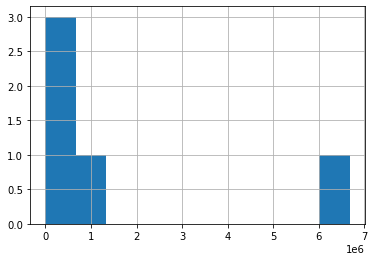

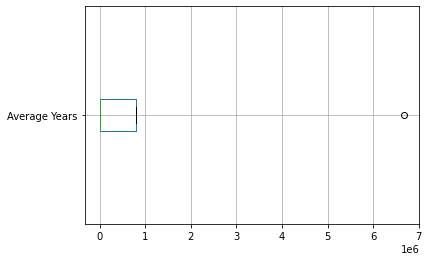

--------------------
Albania
moy:
 157242.48655990776
med:
 46293.666666666664
mod:
 0        -0.268682
1        54.868149
2     46293.666667
3    154236.166667
4    585628.000000
dtype: float64
var:
 49053211635.668846
ect:
 221479.59643197124


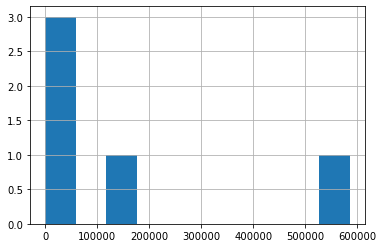

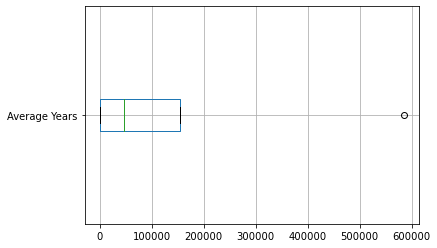

--------------------
Algeria
moy:
 1733161.0836492039
med:
 574517.5
mod:
 0    1.951579e+00
1    2.263333e+01
2    5.745175e+05
3    1.221773e+06
4    6.869491e+06
dtype: float64
var:
 6798692823475.227
ect:
 2607430.3103774847


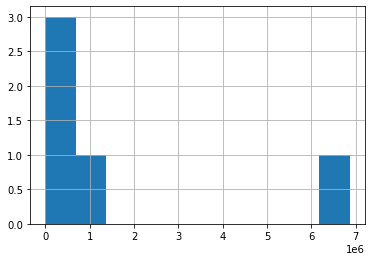

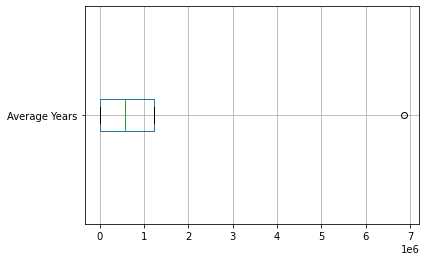

--------------------
American Samoa
moy:
 -0.205793388037251
med:
 -0.205793388037251
mod:
 0   -0.205793
dtype: float64
var:
 0.0
ect:
 0.0


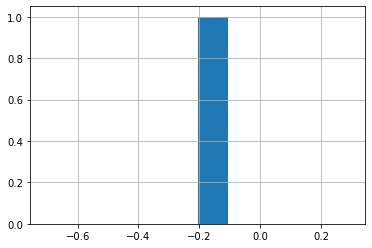

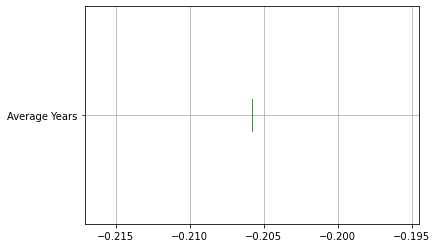

--------------------
Andorra
moy:
 43.94192345741082
med:
 43.94192345741082
mod:
 0    -1.323557
1    89.207404
dtype: float64
var:
 2048.9637381063853
ect:
 45.26548064592251


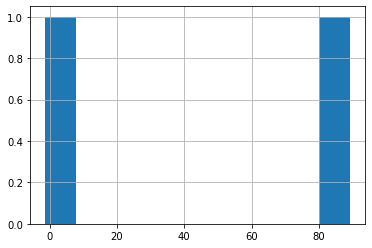

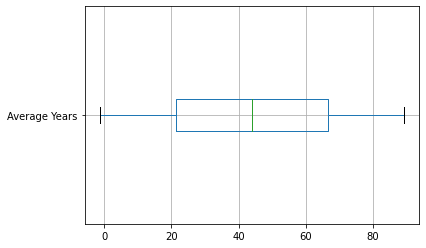

--------------------
Angola
moy:
 1153910.9602168535
med:
 298494.6583333333
mod:
 0    3.524201e+00
1    7.316667e+00
2    5.969820e+05
3    4.018651e+06
dtype: float64
var:
 2794975337939.157
ect:
 1671817.973925139


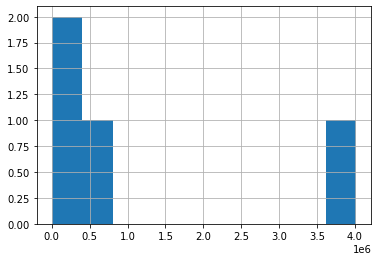

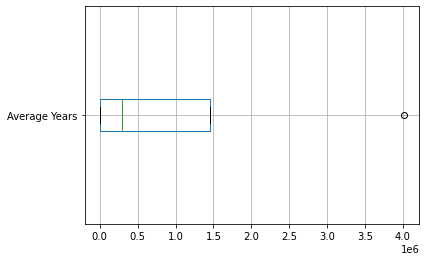

--------------------
Antigua and Barbuda
moy:
 544.4854028775602
med:
 59.696666666666665
mod:
 0       1.092875
1      59.696667
2    1572.666667
dtype: float64
var:
 529150.7563305864
ect:
 727.4274921465276


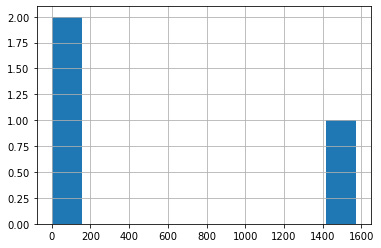

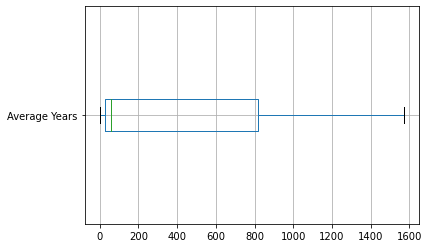

--------------------
Argentina
moy:
 1893549.7776324302
med:
 350420.53692200914
mod:
 0    1.036686e+00
1    5.740718e+01
2    7.007837e+05
3    6.873357e+06
dtype: float64
var:
 8348002789681.283
ect:
 2889291.053127269


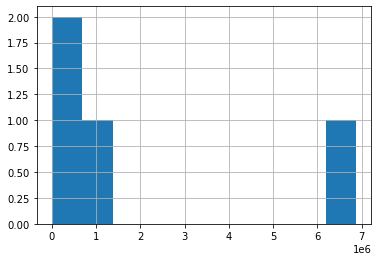

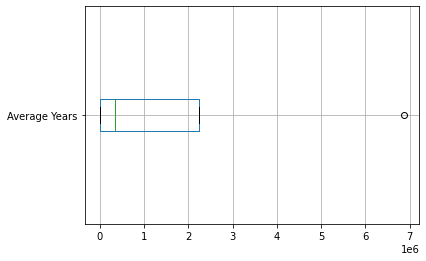

--------------------
Armenia
moy:
 127517.05418185933
med:
 41.687530595
mod:
 0         0.162869
1        11.420510
2        41.687531
3    124134.500000
4    513397.500000
dtype: float64
var:
 39536674685.74171
ect:
 198838.31292218738


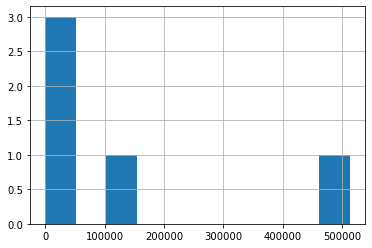

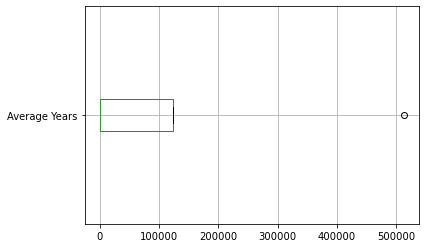

--------------------
Aruba
moy:
 3451.7049367128284
med:
 1480.6666666666667
mod:
 0        0.467812
1       76.056871
2     1480.666667
3     1839.500000
4    13861.833333
dtype: float64
var:
 27632201.480949737
ect:
 5256.634044799936


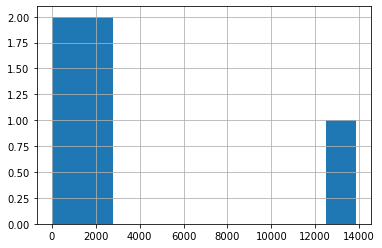

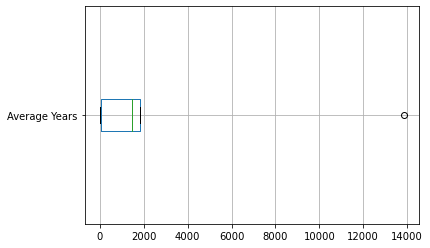

--------------------
Australia
moy:
 973706.9295830028
med:
 81.08361903833334
mod:
 0    1.538463e+00
1    8.108362e+01
2    2.921038e+06
dtype: float64
var:
 1896049474515.468
ect:
 1376971.1233411788


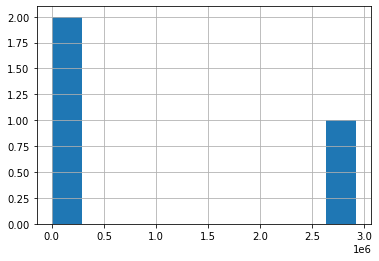

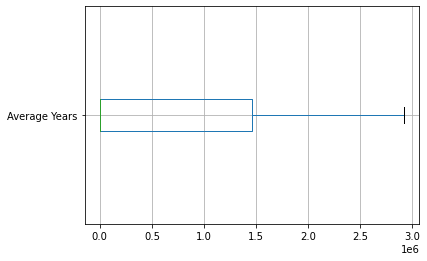

--------------------
Austria
moy:
 293200.7542836865
med:
 83170.0
mod:
 0         0.569168
1        79.915792
2     83170.000000
3    393076.119792
4    989677.166667
dtype: float64
var:
 142210714779.2156
ect:
 377108.3594661031


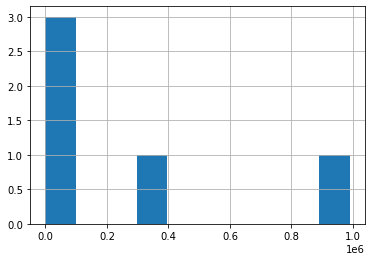

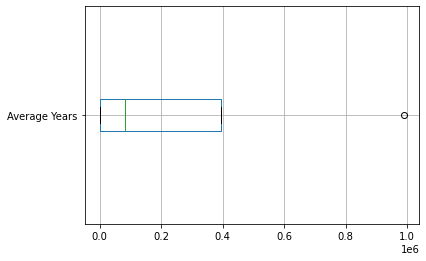

--------------------
Azerbaijan
moy:
 470070.98976813676
med:
 94511.3500014175
mod:
 0    1.259070e+00
1    6.253334e+01
2    1.889602e+05
3    1.691260e+06
dtype: float64
var:
 503049848603.07874
ect:
 709260.0712031368


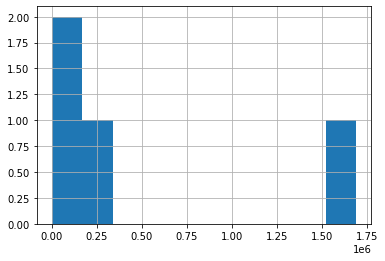

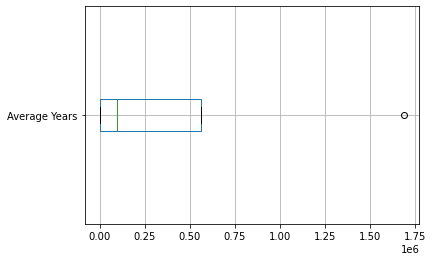

--------------------
Bahamas, The
moy:
 16419.720733147744
med:
 2720.4723502341667
mod:
 0        1.438232
1       67.778034
2     5373.166667
3    60236.500000
dtype: float64
var:
 644720633.0974771
ect:
 25391.349572196377


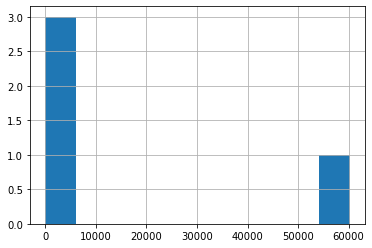

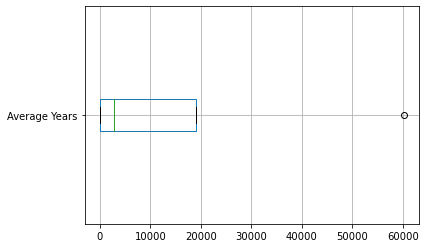

--------------------
Bahrain
moy:
 43450.75672777737
med:
 82.33024013666666
mod:
 0         2.439943
1        82.330240
2    130267.500000
dtype: float64
var:
 3768574519.9407654
ect:
 61388.716552317375


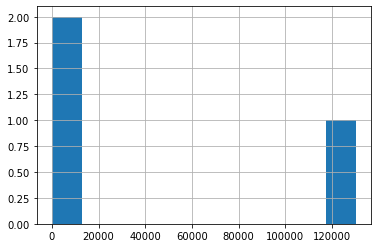

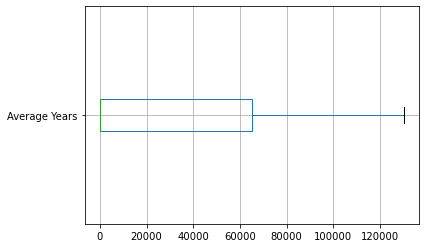

--------------------
Bangladesh
moy:
 9299879.751205128
med:
 1650217.8441666665
mod:
 0    1.149821e+00
1    8.021667e+00
2    3.300428e+06
3    3.389908e+07
dtype: float64
var:
 203522385244470.44
ect:
 14266127.198524147


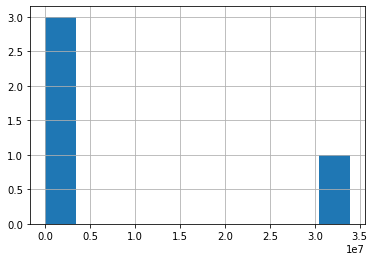

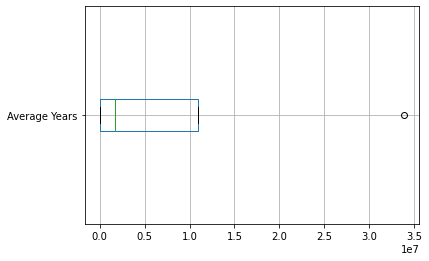

--------------------
Barbados
moy:
 10830.74636540528
med:
 1941.4891666666667
mod:
 0        0.340462
1       70.978333
2     3812.000000
3    39439.666667
dtype: float64
var:
 275200855.37263393
ect:
 16589.178863724206


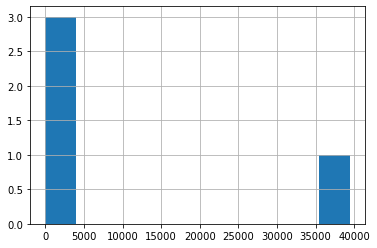

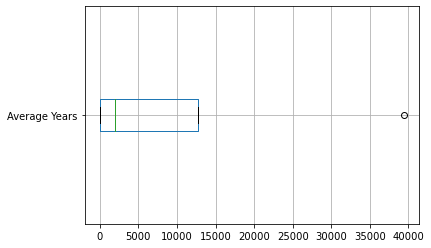

--------------------
Belarus
moy:
 311982.79502238106
med:
 43757.070741305
mod:
 0   -3.009170e-02
1    1.265874e+01
2    4.980815e+01
3    8.746433e+04
4    5.497572e+05
5    1.234613e+06
dtype: float64
var:
 208358702739.90005
ect:
 456463.25453414104


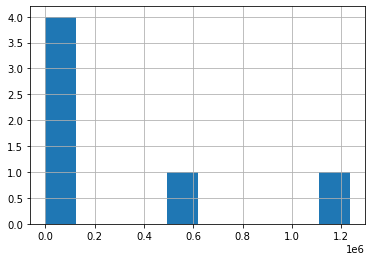

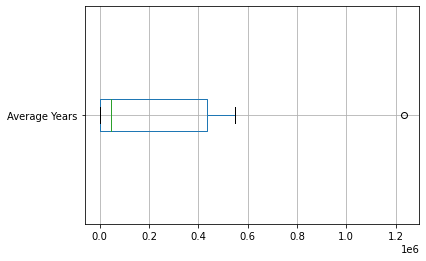

--------------------
Belgium
moy:
 370772.16275360325
med:
 120082.66666666667
mod:
 0    7.215869e-01
1    8.159218e+01
2    1.200827e+05
3    4.790972e+05
4    1.254599e+06
dtype: float64
var:
 226122355927.2932
ect:
 475523.2443606655


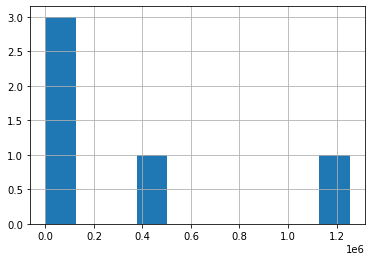

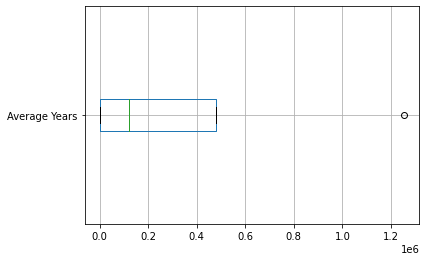

--------------------
Belize
moy:
 18081.386906039985
med:
 3903.3158333333336
mod:
 0        2.249291
1       33.965000
2     7772.666667
3    64516.666667
dtype: float64
var:
 728767393.4464415
ect:
 26995.692127568087


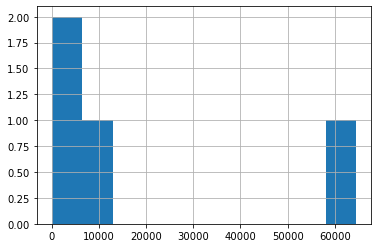

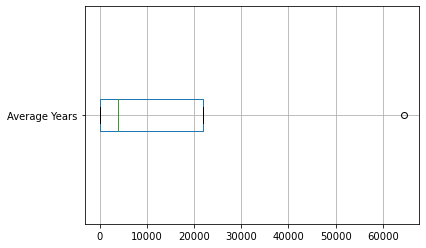

--------------------
Benin
moy:
 592981.1952250225
med:
 123588.07777591467
mod:
 0    2.792015e+00
1    5.655552e+00
2    2.471705e+05
3    2.124746e+06
dtype: float64
var:
 792282830203.8519
ect:
 890102.7076713406


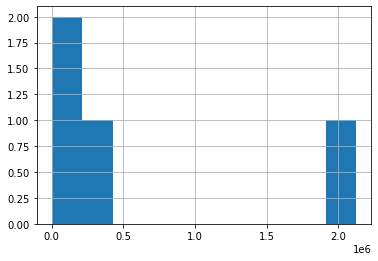

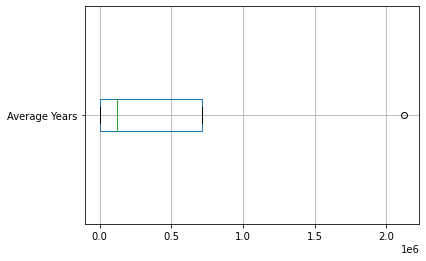

--------------------
Bermuda
moy:
 523.0693479304036
med:
 450.52240951416667
mod:
 0      -0.100761
1      92.378152
2     808.666667
3    1191.333333
dtype: float64
var:
 246836.11277449995
ect:
 496.8260387444482


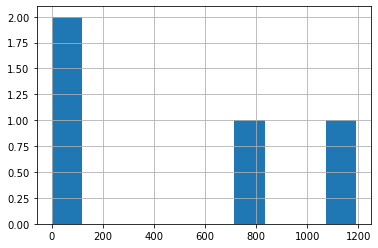

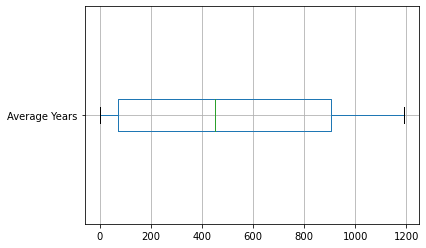

--------------------
Bhutan
moy:
 41406.20080993767
med:
 7280.674999999999
mod:
 0         1.619906
1        22.683333
2     14538.666667
3    151061.833333
dtype: float64
var:
 4043289243.394601
ect:
 63586.863764417576


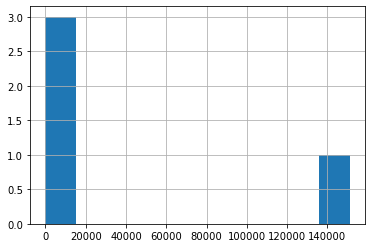

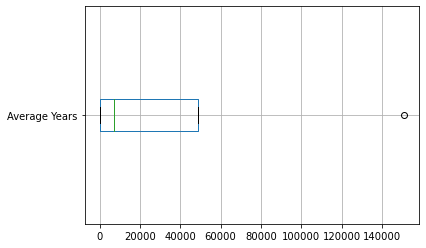

--------------------
Bolivia
moy:
 577787.972118965
med:
 112118.49102255417
mod:
 0    1.573097e+00
1    3.248205e+01
2    2.242045e+05
3    2.086913e+06
dtype: float64
var:
 767529789205.217
ect:
 876087.7748292217


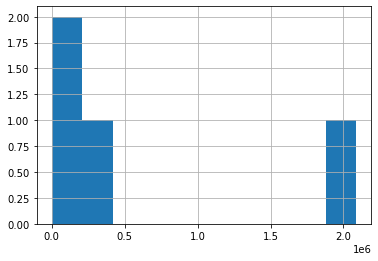

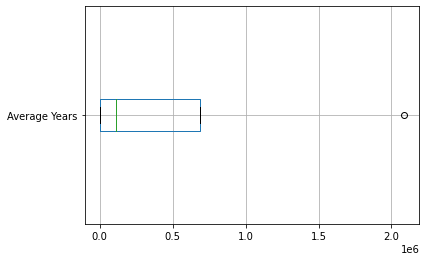

--------------------
Bosnia and Herzegovina
moy:
 153857.4654241281
med:
 54427.9962919
mod:
 0        -0.964221
1        54.492584
2    108801.500000
3    506574.833333
dtype: float64
var:
 43441838118.09218
ect:
 208427.05706815555


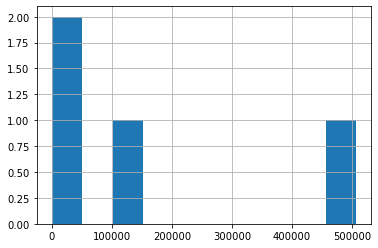

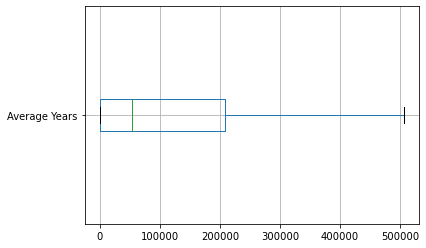

--------------------
Botswana
moy:
 105897.03386610739
med:
 43900.833333333336
mod:
 0         1.826531
1        22.509466
2     43900.833333
3     49999.333333
4    435560.666667
dtype: float64
var:
 27613880490.012962
ect:
 166174.24737309015


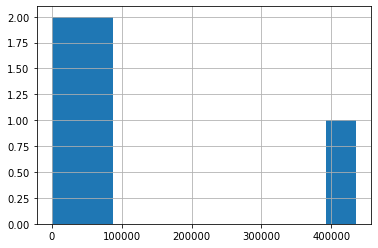

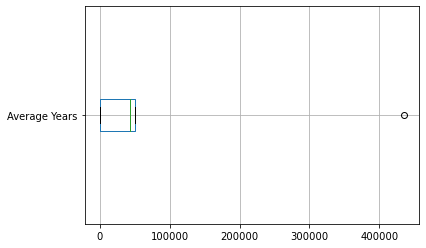

--------------------
Brazil
moy:
 10242084.305898681
med:
 3718538.984912801
mod:
 0    9.204358e-01
1    4.980316e+01
2    7.437028e+06
3    3.353126e+07
dtype: float64
var:
 190013377413616.56
ect:
 13784533.99334256


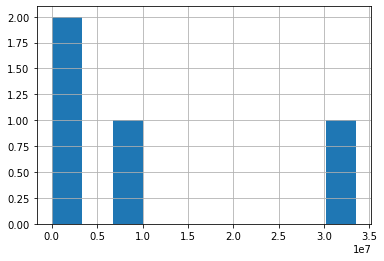

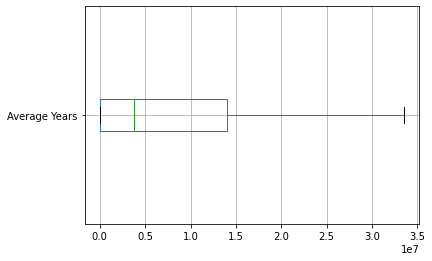

--------------------
Brunei Darussalam
moy:
 18220.63922387395
med:
 6992.5
mod:
 0        1.405609
1       62.290511
2     6992.500000
3     8615.500000
4    75431.500000
dtype: float64
var:
 830615700.4401213
ect:
 28820.404237972118


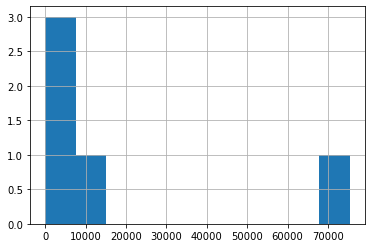

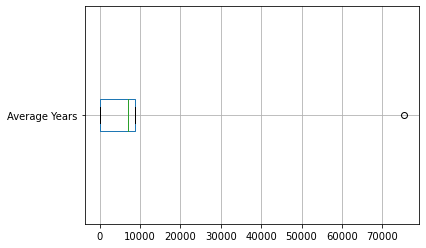

--------------------
Bulgaria
moy:
 229768.38909832685
med:
 62901.333333333336
mod:
 0        -0.607472
1        51.886297
2     62901.333333
3    283925.333333
4    801964.000000
dtype: float64
var:
 92749773897.5823
ect:
 304548.475447805


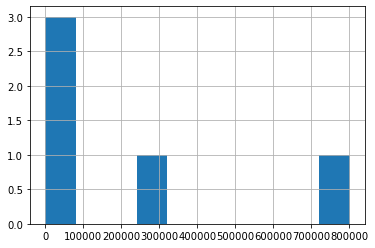

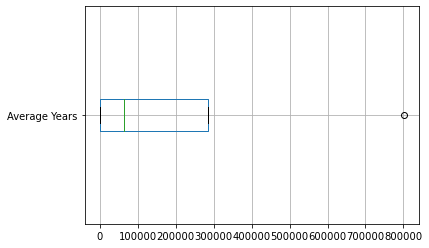

--------------------
Burkina Faso
moy:
 788289.531451734
med:
 17.837046941121397
mod:
 0    2.984765e+00
1    6.502114e+00
2    1.783705e+01
3    4.196428e+05
4    3.521778e+06
dtype: float64
var:
 1894402988092.3308
ect:
 1376373.1282222604


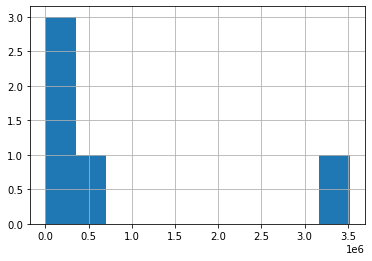

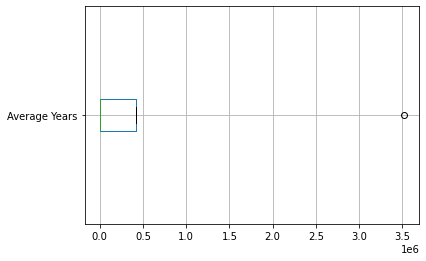

--------------------
Burundi
moy:
 568235.5914404782
med:
 113253.44617741308
mod:
 0    1.806740e+00
1    3.059021e+00
2    2.265038e+05
3    2.046434e+06
dtype: float64
var:
 736906997268.8136
ect:
 858432.8728961942


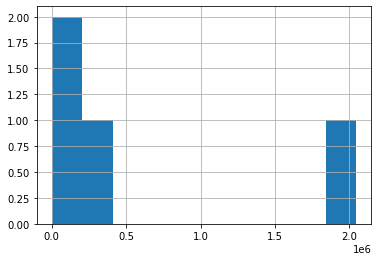

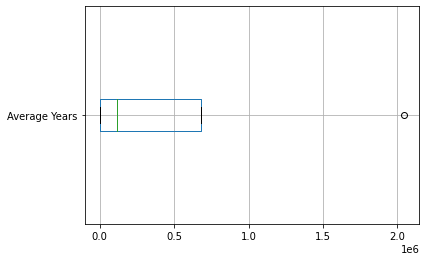

--------------------
Cabo Verde
moy:
 29295.38152948794
med:
 10614.5
mod:
 0         1.164043
1        37.076937
2     10614.500000
3     12119.333333
4    123704.833333
dtype: float64
var:
 2254267224.3970366
ect:
 47479.12409045723


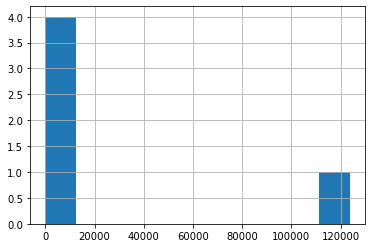

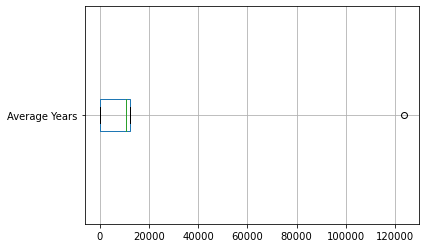

--------------------
Cambodia
moy:
 961477.9479042961
med:
 155126.00833333333
mod:
 0    1.608284e+00
1    8.183333e+00
2    3.102438e+05
3    3.535658e+06
dtype: float64
var:
 2224842632620.6455
ect:
 1491590.6384194845


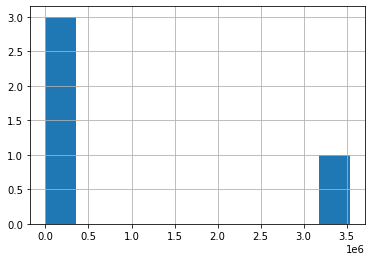

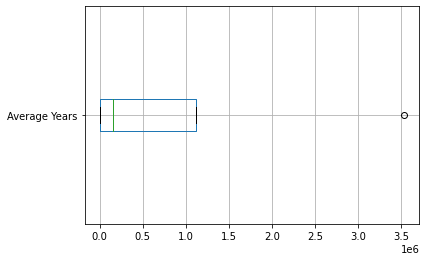

--------------------
Cameroon
moy:
 1023750.0275822685
med:
 299479.6666666667
mod:
 0    2.688741e+00
1    1.061584e+01
2    2.994797e+05
3    5.296288e+05
4    4.289628e+06
dtype: float64
var:
 2706157083045.4727
ect:
 1645040.146332445


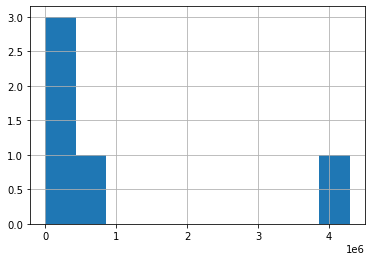

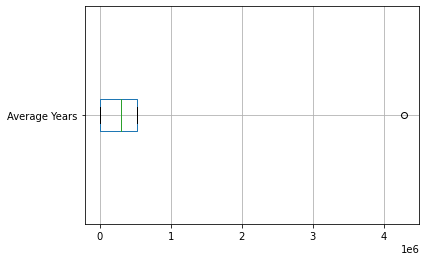

--------------------
Canada
moy:
 1208293.128453169
med:
 190372.3075
mod:
 0    1.065479e+00
1    8.461500e+01
2    3.806600e+05
3    4.452427e+06
dtype: float64
var:
 3532279402969.735
ect:
 1879435.9268061614


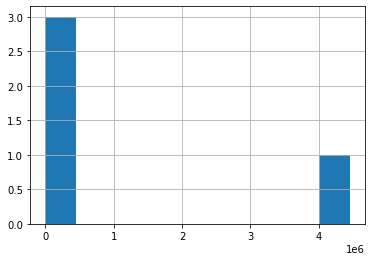

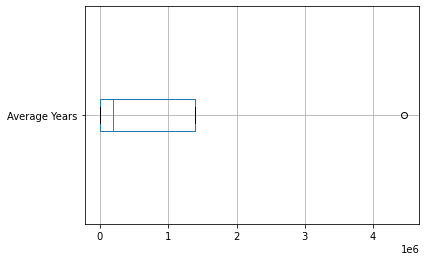

--------------------
Cayman Islands
moy:
 36.46874786194393
med:
 36.46874786194393
mod:
 0     1.659838
1    71.277657
dtype: float64
var:
 1211.6601900743235
ect:
 34.80890963638941


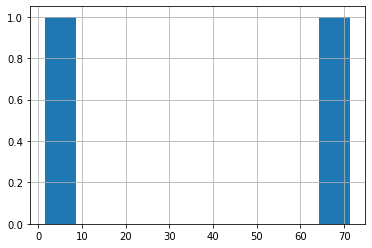

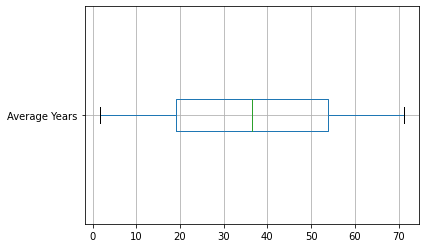

--------------------
Central African Republic
moy:
 285172.8404344992
med:
 55930.25
mod:
 0    5.284047e-01
1    3.000000e+00
2    1.118575e+05
3    1.028830e+06
dtype: float64
var:
 186427439854.09644
ect:
 431772.4398964071


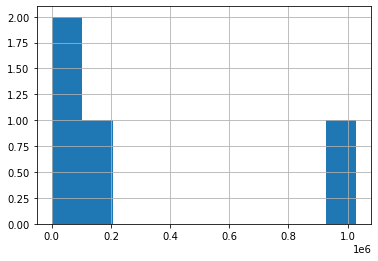

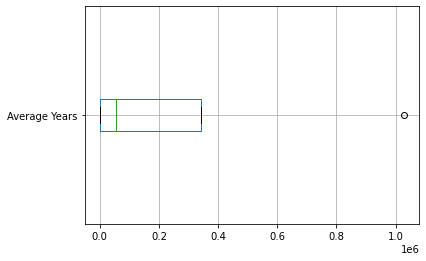

--------------------
Chad
moy:
 705506.4714174747
med:
 166275.72616828274
mod:
 0    2.433333e+00
1    3.285670e+00
2    3.325482e+05
3    2.489472e+06
dtype: float64
var:
 1079275399276.5835
ect:
 1038881.8023608766


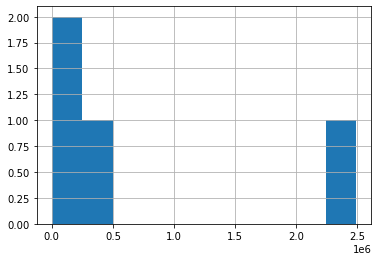

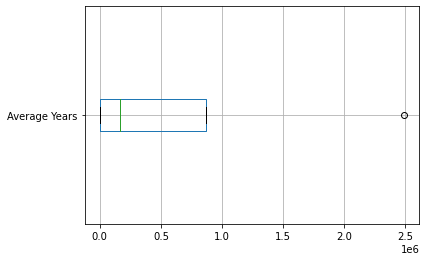

--------------------
Channel Islands
moy:
 0.5330917291876361
med:
 0.5330917291876361
mod:
 0    0.533092
dtype: float64
var:
 0.0
ect:
 0.0


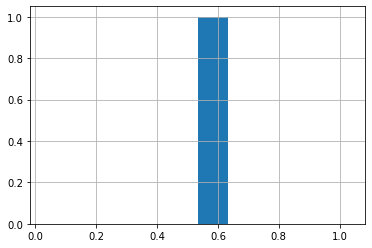

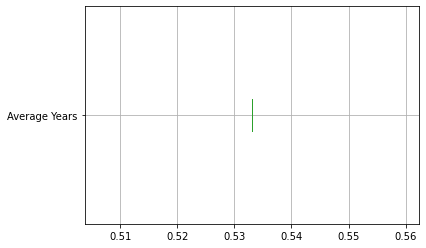

--------------------
Chile
moy:
 713744.7689741921
med:
 126906.8915506075
mod:
 0    8.994972e-01
1    1.893125e+01
2    5.594977e+01
3    2.537578e+05
4    1.128152e+06
5    2.900483e+06
dtype: float64
var:
 1115555536664.4487
ect:
 1056198.62557402


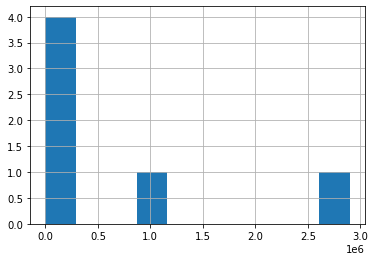

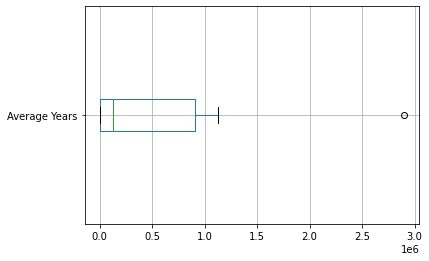

--------------------
China
moy:
 51939860.42858722
med:
 15261914.666666666
mod:
 0    4.929165e-01
1    4.315002e+01
2    1.526191e+07
3    3.572066e+07
4    2.087167e+08
dtype: float64
var:
 6316560107960030.0
ect:
 79476789.74367315


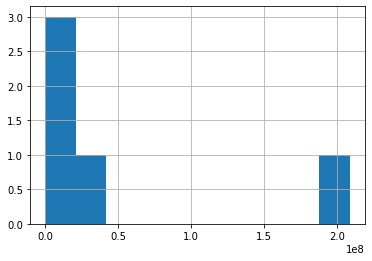

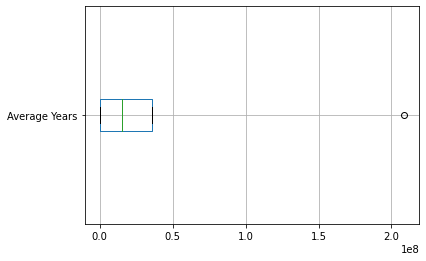

--------------------
Colombia
moy:
 1959696.8131473202
med:
 408415.0838240217
mod:
 0    1.001429e+00
1    1.587647e+01
2    4.766765e+01
3    8.167825e+05
4    2.017624e+06
5    8.923710e+06
dtype: float64
var:
 10221345793177.553
ect:
 3197083.9515373306


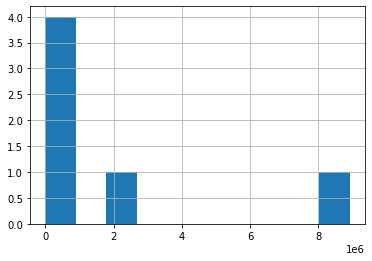

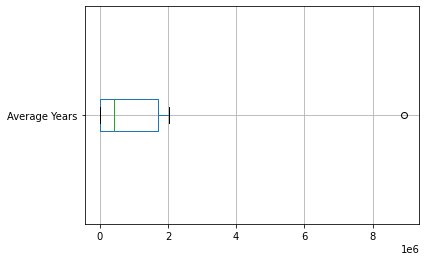

--------------------
Comoros
moy:
 51565.03754485278
med:
 8660.376204807833
mod:
 0         2.39777
1         6.25241
2     17314.50000
3    188937.00000
dtype: float64
var:
 6340292384.0209055
ect:
 79625.9529551823


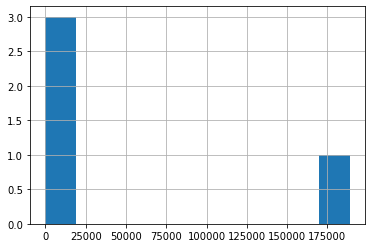

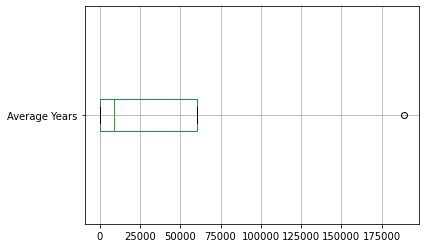

--------------------
Congo, Dem. Rep.
moy:
 4047601.7316676294
med:
 877067.9966718814
mod:
 0    2.099993e+00
1    3.326677e+00
2    1.754133e+06
3    1.443627e+07
dtype: float64
var:
 36487630031939.7
ect:
 6040499.154204038


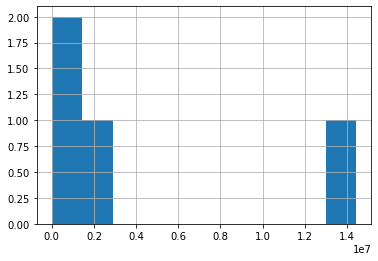

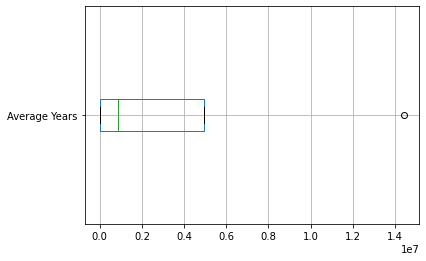

--------------------
Congo, Rep.
moy:
 238902.96292423655
med:
 49793.75272247384
mod:
 0         2.679585
1         6.338778
2     99581.166667
3    856021.666667
dtype: float64
var:
 128597749957.22896
ect:
 358605.2843409156


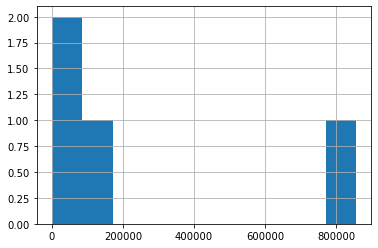

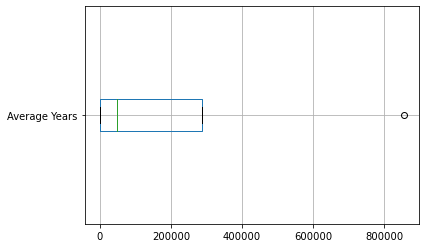

--------------------
Costa Rica
moy:
 188796.3175517036
med:
 46.98919102333334
mod:
 0         1.146411
1        23.118823
2        46.989191
3     75545.000000
4    868365.333333
dtype: float64
var:
 116309030859.69421
ect:
 341041.098490628


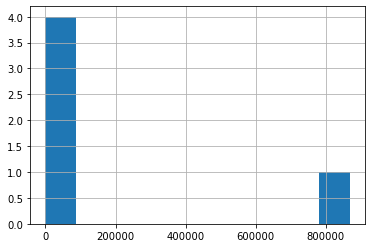

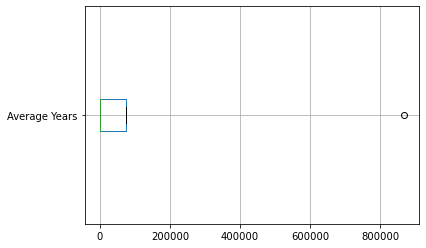

--------------------
Cote d'Ivoire
moy:
 1028237.6365973803
med:
 21.76218382517496
mod:
 0    2.460897e+00
1    1.062657e+01
2    2.176218e+01
3    5.305035e+05
4    4.610650e+06
dtype: float64
var:
 3250632532628.937
ect:
 1802951.0621835904


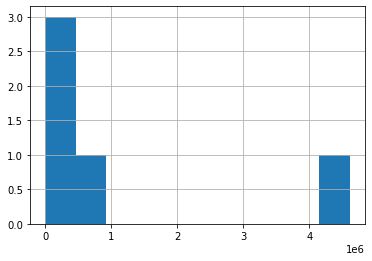

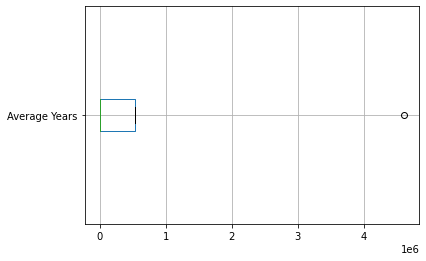

--------------------
Croatia
moy:
 182634.64169383916
med:
 101969.58333333333
mod:
 0        63.566775
1     44971.166667
2    158968.000000
3    526535.833333
dtype: float64
var:
 42777892323.39395
ect:
 206828.17101012607


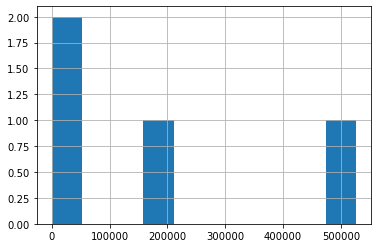

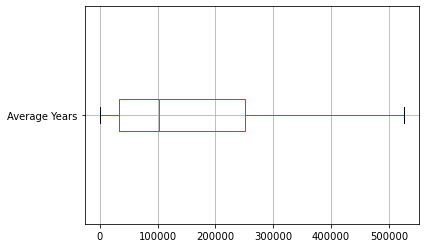

--------------------
Cuba
moy:
 425378.9892193961
med:
 138407.16666666666
mod:
 0    2.090015e-01
1    2.457043e+01
2    1.384072e+05
3    4.842170e+05
4    1.504246e+06
dtype: float64
var:
 322328450729.37366
ect:
 567739.7737778935


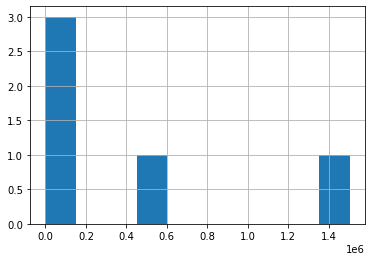

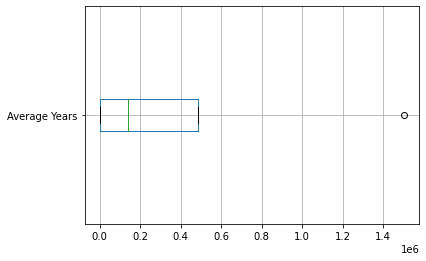

--------------------
Cyprus
moy:
 34409.320379442615
med:
 9409.666666666666
mod:
 0         0.928487
1        62.840077
2      9409.666667
3     33154.666667
4    129418.500000
dtype: float64
var:
 2403383839.1334534
ect:
 49024.31885435486


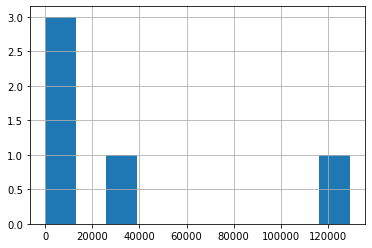

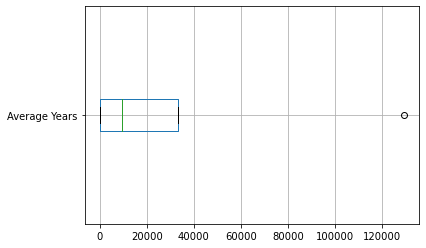

--------------------
Czech Republic
moy:
 336190.72413431446
med:
 89592.33333333333
mod:
 0    1.621785e-01
1    7.279183e+01
2    8.959233e+04
3    4.275560e+05
4    1.163732e+06
dtype: float64
var:
 195996570660.49164
ect:
 442714.99936244724


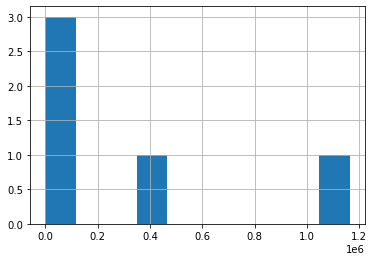

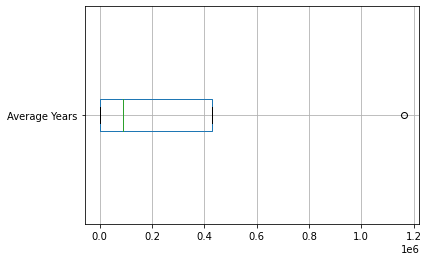

--------------------
Denmark
moy:
 208668.12009369518
med:
 68780.0
mod:
 0         0.477098
1        92.956704
2     68780.000000
3    280129.833333
4    694337.333333
dtype: float64
var:
 69519166261.55962
ect:
 263664.87491048104


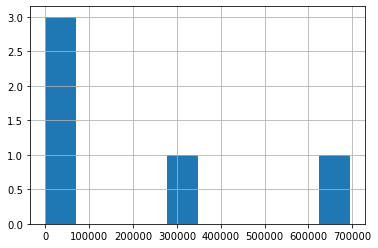

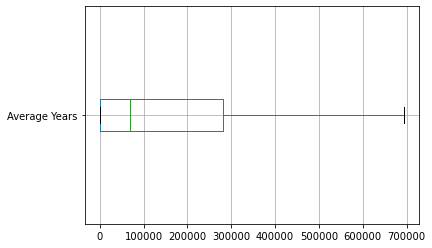

--------------------
Djibouti
moy:
 53260.21568257381
med:
 9174.2416386935
mod:
 0         1.712786
1         8.983277
2     18339.500000
3    194690.666667
dtype: float64
var:
 6723547683.1942215
ect:
 81997.24192431245


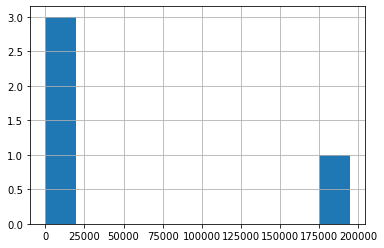

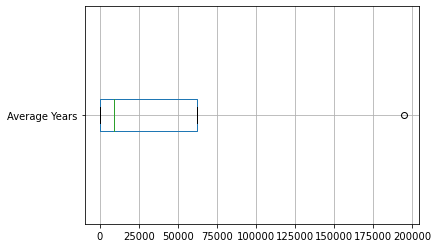

--------------------
Dominica
moy:
 398.33486734238113
med:
 53.225
mod:
 0       0.446269
1      53.225000
2    1141.333333
dtype: float64
var:
 276487.62597883586
ect:
 525.8209067532746


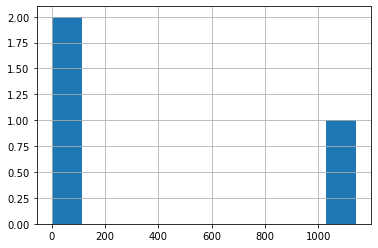

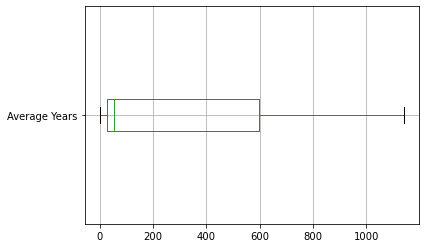

--------------------
Dominican Republic
moy:
 527383.7464437482
med:
 100695.86798052833
mod:
 0    1.249814e+00
1    4.356929e+01
2    2.013482e+05
3    1.908142e+06
dtype: float64
var:
 642253128557.9246
ect:
 801406.9681241389


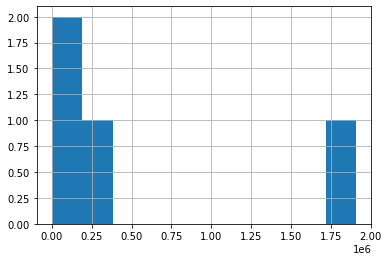

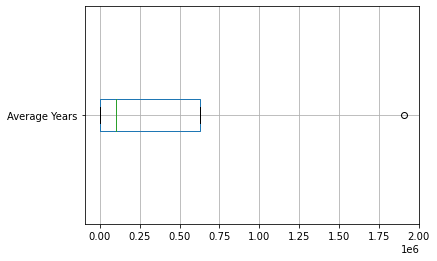

--------------------
Ecuador
moy:
 587006.7193059854
med:
 38.390316868333336
mod:
 0    1.571958e+00
1    1.213426e+01
2    3.839032e+01
3    3.010408e+05
4    2.633941e+06
dtype: float64
var:
 1061076915585.2239
ect:
 1030085.8777719573


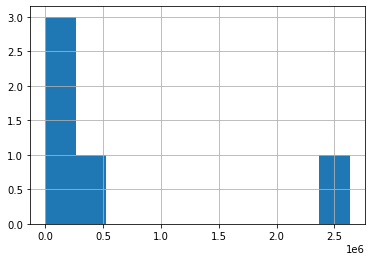

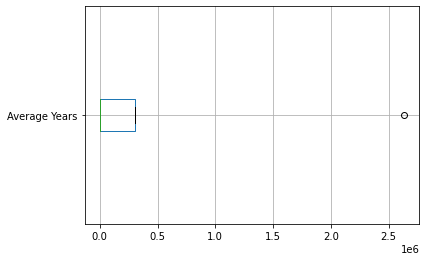

--------------------
Egypt, Arab Rep.
moy:
 3900657.9189925557
med:
 1614149.8333333333
mod:
 0    2.142632e+00
1    2.911900e+01
2    1.614150e+06
3    2.513976e+06
4    1.537513e+07
dtype: float64
var:
 33848916965466.8
ect:
 5817982.207386578


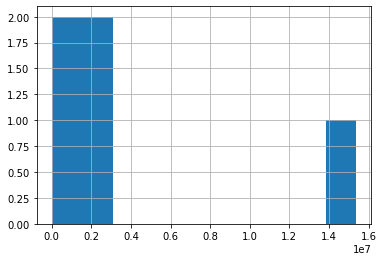

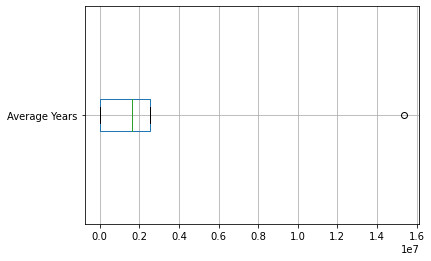

--------------------
El Salvador
moy:
 277813.5332682602
med:
 64728.98291706917
mod:
 0    4.691219e-01
1    1.593132e+01
2    2.163250e+01
3    1.294363e+05
4    1.686663e+05
5    1.368740e+06
dtype: float64
var:
 242595082974.5271
ect:
 492539.42276179994


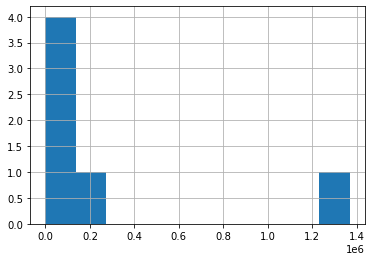

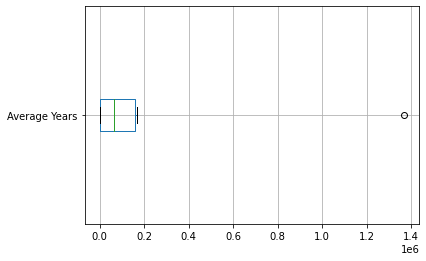

--------------------
Equatorial Guinea
moy:
 32618.36299607702
med:
 8454.001931848332
mod:
 0         4.281454
1        14.670530
2     16893.333333
3    113561.166667
dtype: float64
var:
 2231423275.2963696
ect:
 47237.943173855165


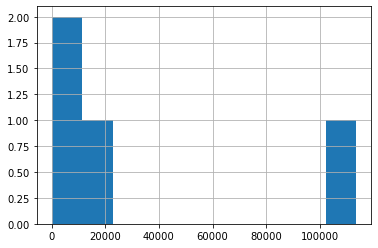

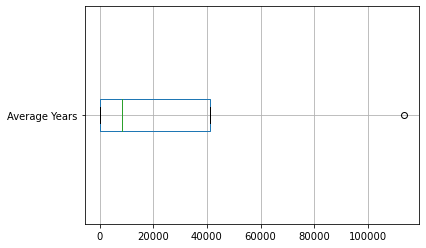

--------------------
Eritrea
moy:
 408499.4490962843
med:
 116880.83333333333
mod:
 0    8.472889e-01
1    1.168808e+05
2    1.108617e+06
dtype: float64
var:
 247358881025.54013
ect:
 497351.86842470005


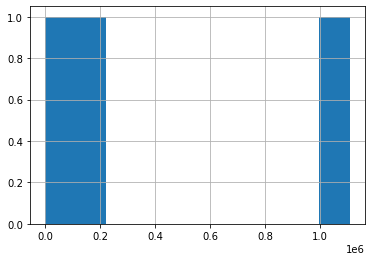

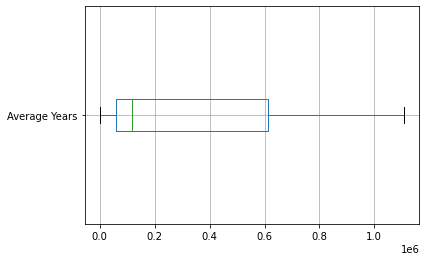

--------------------
Estonia
moy:
 47286.24017949694
med:
 11585.0
mod:
 0        -0.240363
1        80.274594
2     11585.000000
3     64287.166667
4    160479.000000
dtype: float64
var:
 3768125071.306137
ect:
 61385.05576527675


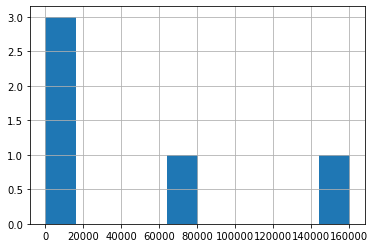

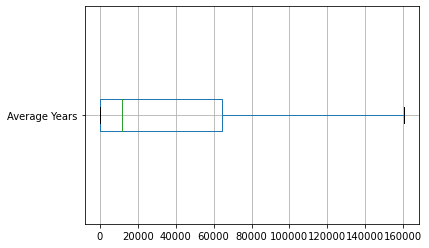

--------------------
Ethiopia
moy:
 5547886.720263793
med:
 1198081.2208333332
mod:
 0    2.606055e+00
1    4.775000e+00
2    2.396158e+06
3    1.979538e+07
dtype: float64
var:
 68620631311875.234
ect:
 8283757.077068064


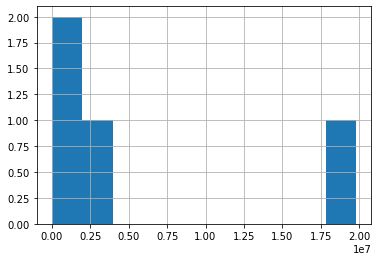

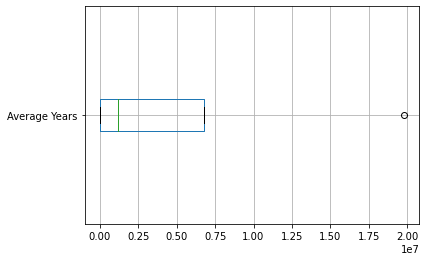

--------------------
Faroe Islands
moy:
 43.30720937984664
med:
 43.30720937984664
mod:
 0     0.153192
1    86.461227
dtype: float64
var:
 1862.2692373358934
ect:
 43.15401762682003


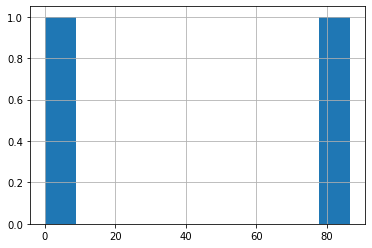

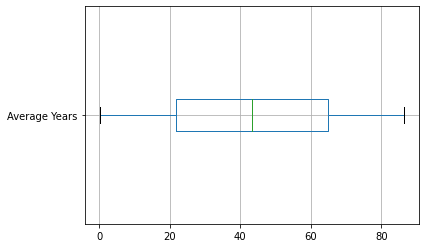

--------------------
Fiji
moy:
 45460.76878722002
med:
 7870.070196395834
mod:
 0         0.768089
1        32.807059
2     15707.333333
3    166102.166667
dtype: float64
var:
 4892481293.449589
ect:
 69946.27433573277


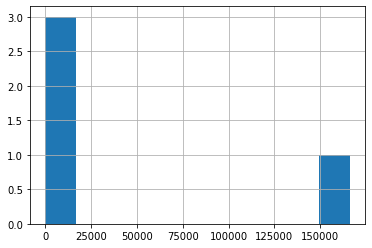

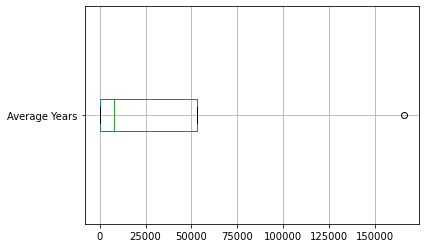

--------------------
Finland
moy:
 203178.21824831853
med:
 59645.666666666664
mod:
 0         0.433422
1        88.324486
2     59645.666667
3    306396.833333
4    649759.833333
dtype: float64
var:
 62643506398.15254
ect:
 250286.84823248812


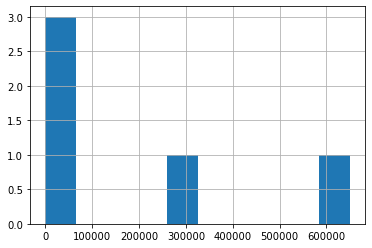

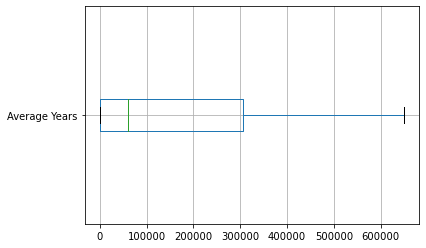

--------------------
France
moy:
 2089635.034328401
med:
 387810.7420249159
mod:
 0    4.865971e-01
1    8.115072e+01
2    7.755403e+05
3    7.582918e+06
dtype: float64
var:
 10158953107701.297
ect:
 3187311.2662087614


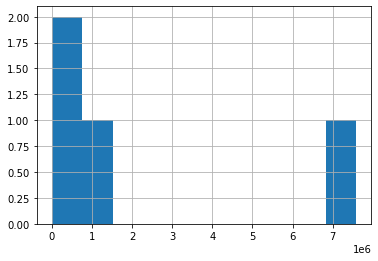

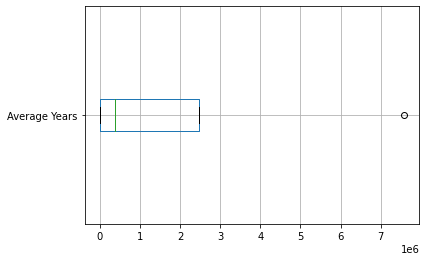

--------------------
French Polynesia
moy:
 28.11461590068903
med:
 28.11461590068903
mod:
 0     0.743092
1    55.486140
dtype: float64
var:
 749.2003346212673
ect:
 27.37152415597764


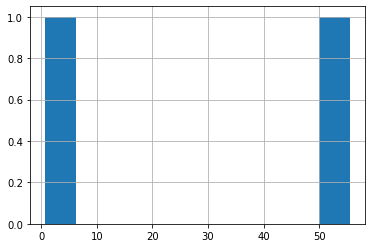

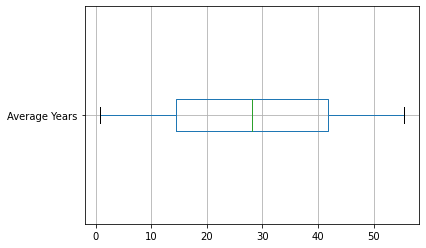

--------------------
Gabon
moy:
 83604.49940852042
med:
 18263.699481605
mod:
 0         3.265338
1        28.232297
2     36499.166667
3    297887.333333
dtype: float64
var:
 15527551012.533344
ect:
 124609.59438395321


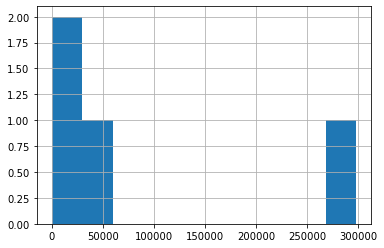

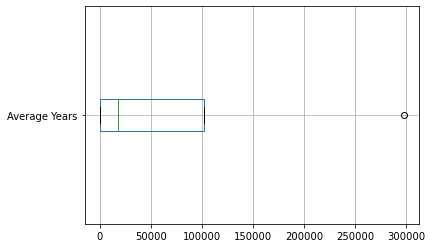

--------------------
Gambia, The
moy:
 125808.462479476
med:
 13.09658812
mod:
 0         3.124184
1        13.096588
2    377409.166667
dtype: float64
var:
 31651457190.319927
ect:
 177908.5641286555


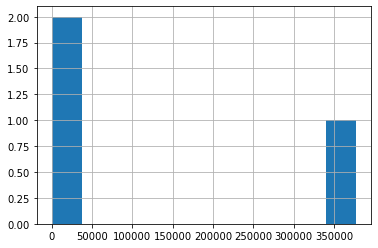

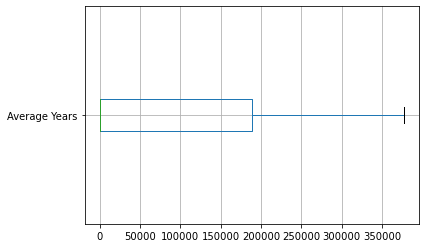

--------------------
Georgia
moy:
 158901.8482073678
med:
 44450.833333333336
mod:
 0        -1.130590
1        38.371627
2     44450.833333
3    112821.833333
4    637199.333333
dtype: float64
var:
 58895729543.24797
ect:
 242684.4237755031


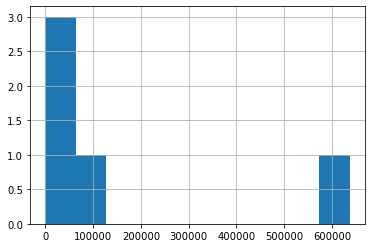

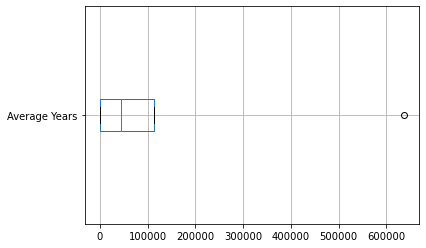

--------------------
Germany
moy:
 2444652.3044205396
med:
 370870.0474831675
mod:
 0   -4.395084e-02
1    8.392830e+01
2    7.416562e+05
3    9.036869e+06
dtype: float64
var:
 14577439663503.68
ect:
 3818041.3386321105


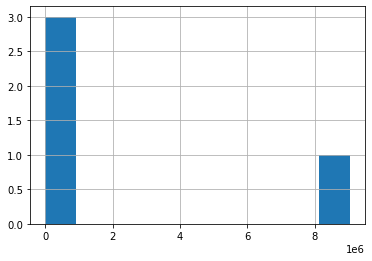

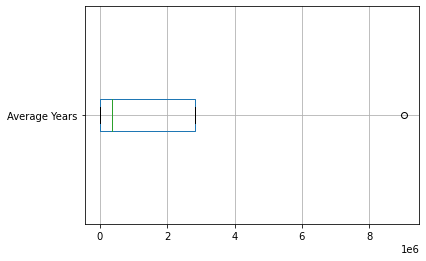

--------------------
Ghana
moy:
 1478541.6117096285
med:
 287759.6971324867
mod:
 0    2.385907e+00
1    1.656093e+01
2    5.755028e+05
3    5.338645e+06
dtype: float64
var:
 5021997299538.869
ect:
 2240981.325120508


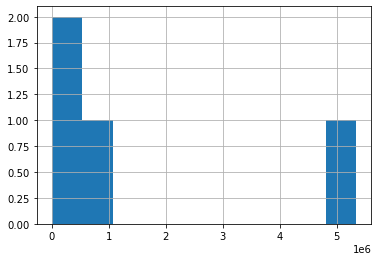

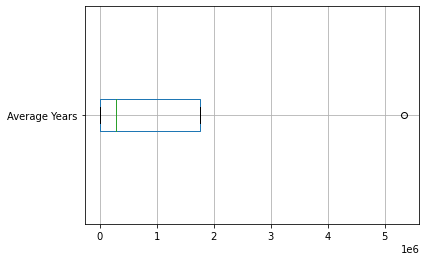

--------------------
Gibraltar
moy:
 0.6311780683744129
med:
 0.6311780683744129
mod:
 0    0.631178
dtype: float64
var:
 0.0
ect:
 0.0


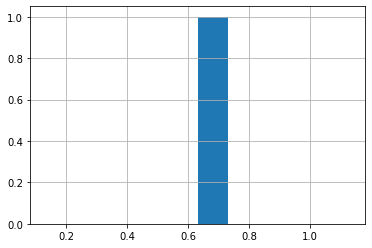

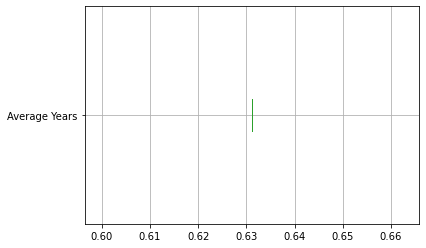

--------------------
Greece
moy:
 312659.4758903899
med:
 53042.66927405083
mod:
 0   -4.349865e-01
1    5.683855e+01
2    1.060285e+05
3    1.144553e+06
dtype: float64
var:
 232554956098.96164
ect:
 482239.5215025015


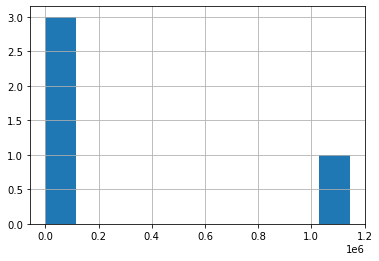

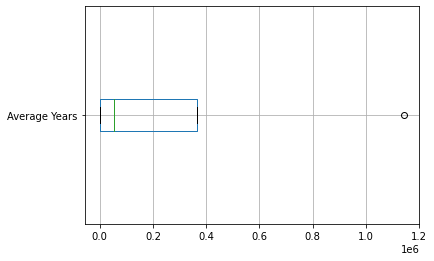

--------------------
Greenland
moy:
 32.63539078404781
med:
 32.63539078404781
mod:
 0    -0.061961
1    65.332742
dtype: float64
var:
 1069.1167937599348
ect:
 32.697351479285516


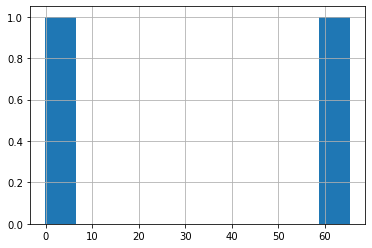

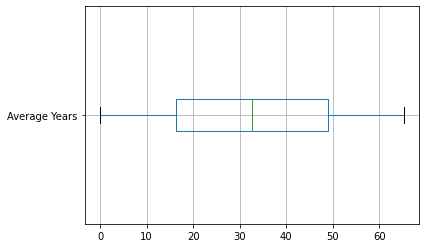

--------------------
Grenada
moy:
 6585.116834369938
med:
 982.2841666666666
mod:
 0        0.399004
1       38.235000
2     1926.333333
3    24375.500000
dtype: float64
var:
 106105541.88658276
ect:
 10300.754432884165


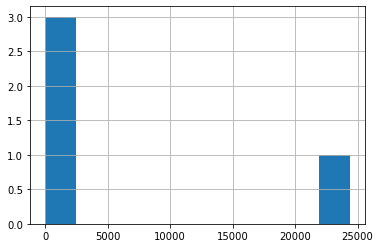

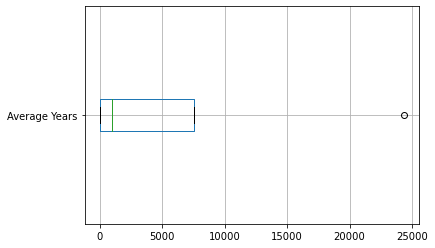

--------------------
Guam
moy:
 31.89023397975967
med:
 31.89023397975967
mod:
 0     0.266441
1    63.514027
dtype: float64
var:
 1000.0642561039372
ect:
 31.623792563573666


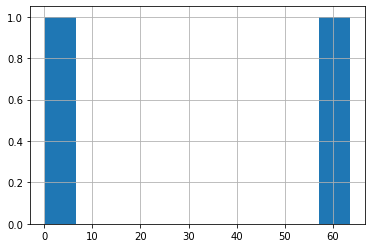

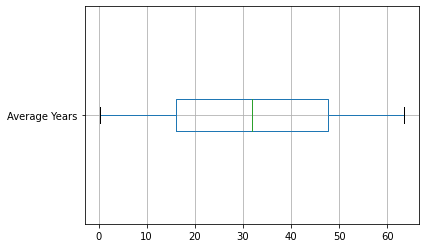

--------------------
Guatemala
moy:
 699057.5574086967
med:
 21.22188568115235
mod:
 0    2.114168e+00
1    1.845099e+01
2    2.122189e+01
3    3.712172e+05
4    3.124029e+06
dtype: float64
var:
 1490790198854.0535
ect:
 1220979.1967327099


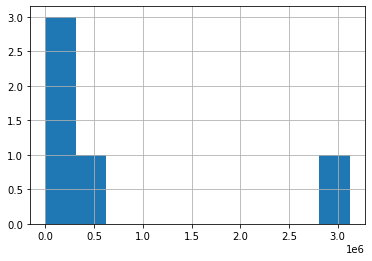

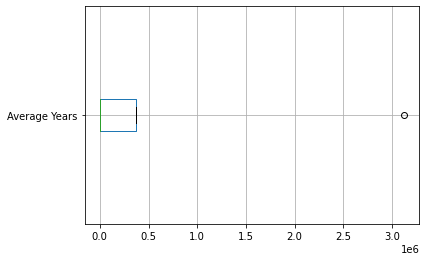

--------------------
Guinea
moy:
 598751.9906724924
med:
 138111.85
mod:
 0    2.262690e+00
1    4.200000e+00
2    2.762195e+05
3    2.118782e+06
dtype: float64
var:
 782879647597.48
ect:
 884804.8641352962


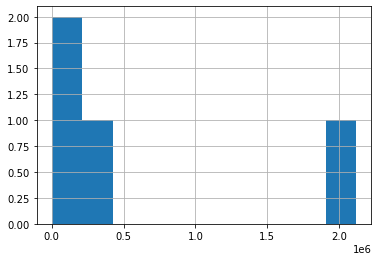

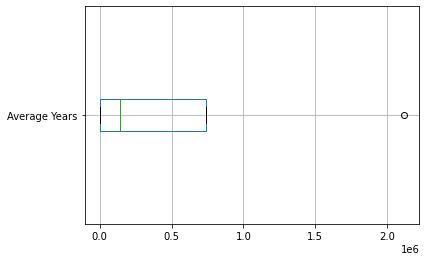

--------------------
Guinea-Bissau
moy:
 106606.22505698533
med:
 20136.498058128167
mod:
 0         2.570778
1         2.996116
2     40270.000000
3    386149.333333
dtype: float64
var:
 26318357916.44024
ect:
 162229.33740985396


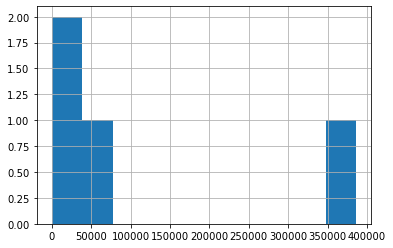

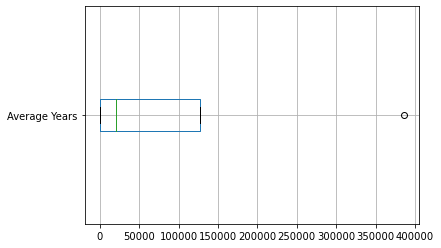

--------------------
Guyana
moy:
 35621.975603303195
med:
 9855.366666666667
mod:
 0         0.502413
1        31.233333
2     19679.500000
3    122776.666667
dtype: float64
var:
 2596423247.568
ect:
 50955.11012222424


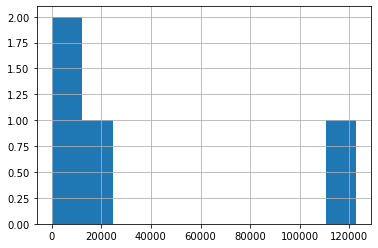

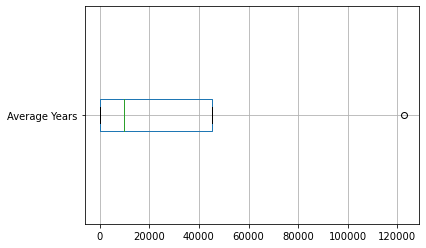

--------------------
Haiti
moy:
 590777.2382965105
med:
 115606.44730833333
mod:
 0    1.391903e+00
1    1.022795e+01
2    2.312027e+05
3    2.131895e+06
dtype: float64
var:
 800589640446.2738
ect:
 894756.7493158539


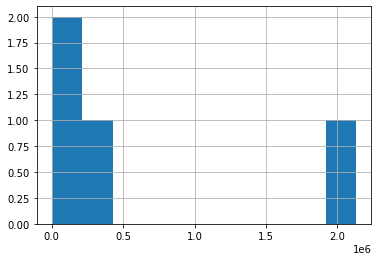

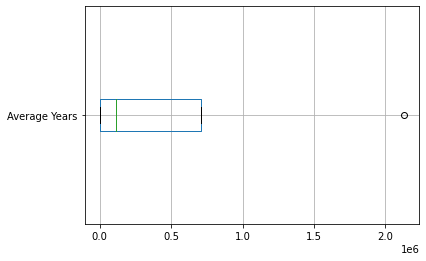

--------------------
Honduras
moy:
 466466.1464636266
med:
 90870.63415115084
mod:
 0    1.817552e+00
1    1.826830e+01
2    1.817230e+05
3    1.684122e+06
dtype: float64
var:
 499731453160.4457
ect:
 706916.8643910298


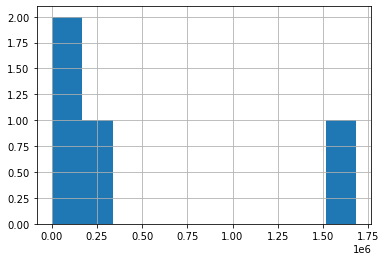

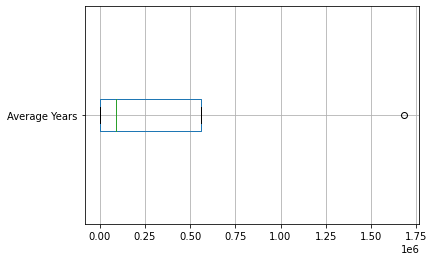

--------------------
Hong Kong SAR, China
moy:
 203742.27188237628
med:
 31905.342885282498
mod:
 0         0.777300
1        19.246349
2        76.019104
3     63734.666667
4    284839.088542
5    873783.833333
dtype: float64
var:
 99938021255.0384
ect:
 316129.7538275042


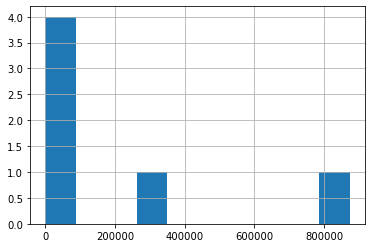

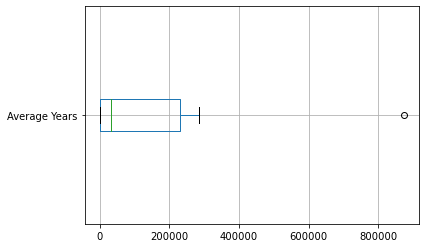

--------------------
Hungary
moy:
 328289.19744563487
med:
 96011.16666666667
mod:
 0   -3.014024e-01
1    7.078863e+01
2    9.601117e+04
3    3.579763e+05
4    1.187388e+06
dtype: float64
var:
 201677296221.81964
ect:
 449084.9543480828


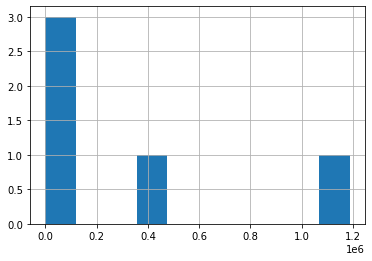

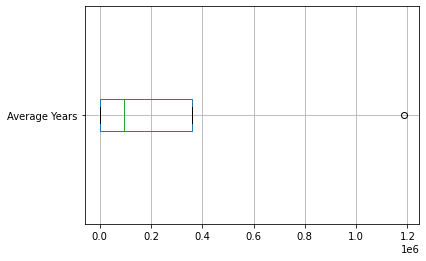

--------------------
Iceland
moy:
 12309.963345145628
med:
 2211.5271905291665
mod:
 0        0.632333
1       96.221048
2     4326.833333
3    44816.166667
dtype: float64
var:
 355269687.5108608
ect:
 18848.599086161837


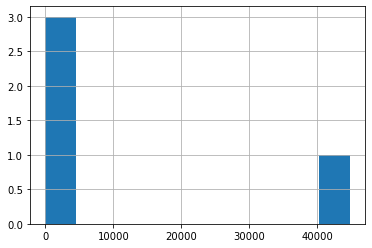

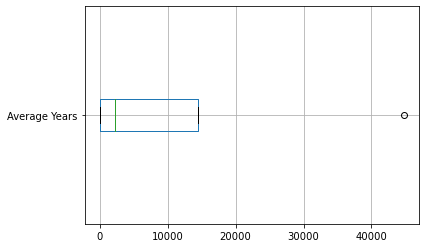

--------------------
India
moy:
 58619718.99220717
med:
 25177681.666666668
mod:
 0    1.252692e+00
1    1.537501e+01
2    2.517768e+07
3    2.775808e+07
4    2.401628e+08
dtype: float64
var:
 8380249239159410.0
ect:
 91543701.2533326


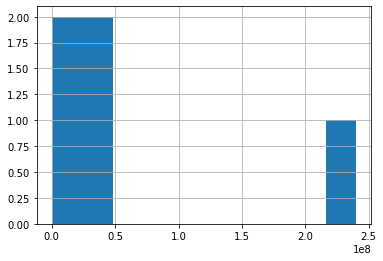

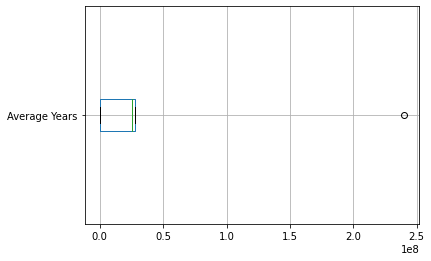

--------------------
Indonesia
moy:
 8725029.163626598
med:
 2317631.4620358148
mod:
 0    1.261677e+00
1    1.529601e+01
2    1.809074e+01
3    4.635245e+06
4    5.765681e+06
5    4.194921e+07
dtype: float64
var:
 226284731651970.97
ect:
 15042763.431363633


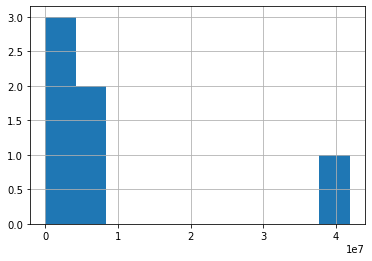

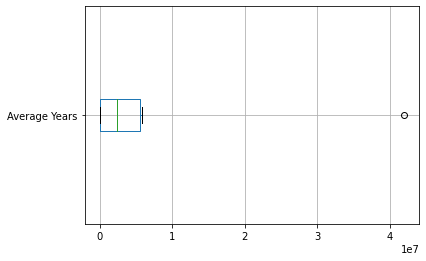

--------------------
Iran, Islamic Rep.
moy:
 3438094.775439439
med:
 530750.3554146567
mod:
 0    1.236109e+00
1    1.920570e+01
2    2.871083e+01
3    1.061472e+06
4    4.361448e+06
5    1.520560e+07
dtype: float64
var:
 30072704982490.344
ect:
 5483858.585201696


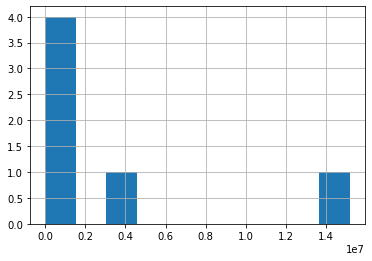

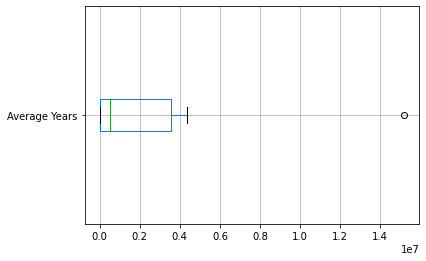

--------------------
Iraq
moy:
 1905461.3389444174
med:
 390279.26916666667
mod:
 0    3.150778e+00
1    9.038333e+00
2    7.805495e+05
3    6.841284e+06
dtype: float64
var:
 8222322018248.643
ect:
 2867459.1572067146


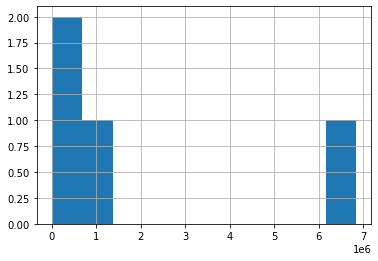

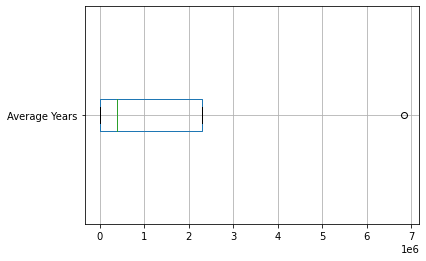

--------------------
Ireland
moy:
 168522.09304827952
med:
 56136.5
mod:
 0         0.511897
1        76.620011
2     56136.500000
3    200158.166667
4    586238.666667
dtype: float64
var:
 48978379850.94907
ect:
 221310.5958849442


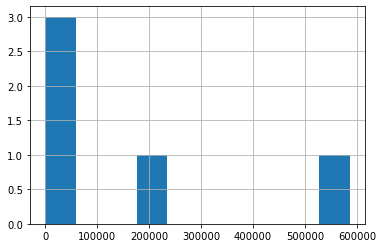

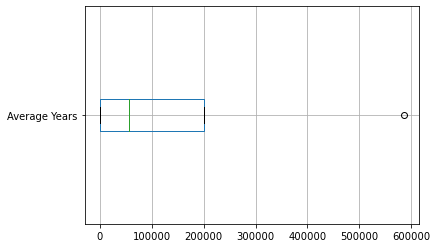

--------------------
Isle of Man
moy:
 0.7882882843700795
med:
 0.7882882843700795
mod:
 0    0.788288
dtype: float64
var:
 0.0
ect:
 0.0


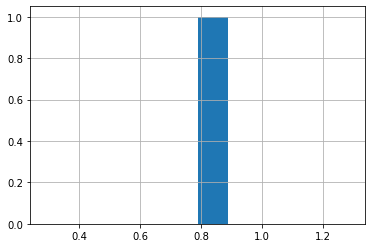

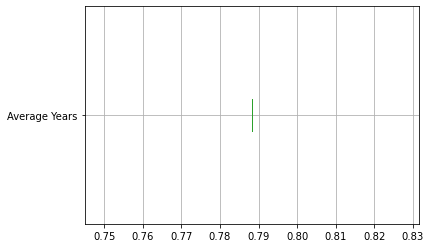

--------------------
Israel
moy:
 332679.836063334
med:
 127302.0
mod:
 0    1.881311e+00
1    7.163234e+01
2    1.273020e+05
3    3.716343e+05
4    1.164389e+06
dtype: float64
var:
 191348207003.13052
ect:
 437433.66011674335


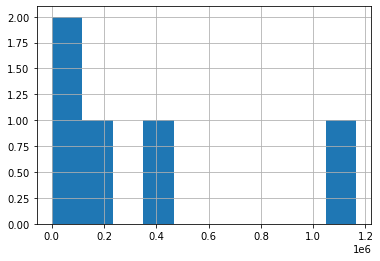

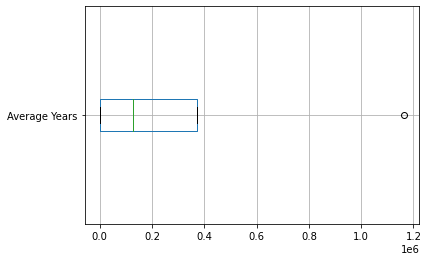

--------------------
Italy
moy:
 1643548.7289660436
med:
 555537.6666666666
mod:
 0    4.549150e-01
1    5.602325e+01
2    5.555377e+05
3    1.904571e+06
4    5.757578e+06
dtype: float64
var:
 4715891657765.316
ect:
 2171610.3835092788


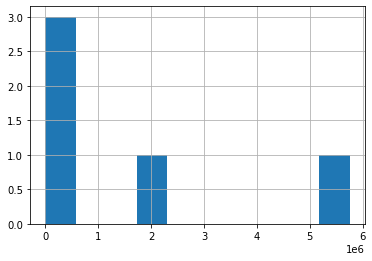

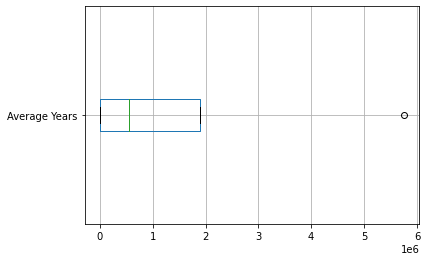

--------------------
Jamaica
moy:
 118223.33101577763
med:
 36.437094949999995
mod:
 0         0.398491
1        19.319493
2        36.437095
3     53242.833333
4    537817.666667
dtype: float64
var:
 44439772719.77434
ect:
 210807.4304187932


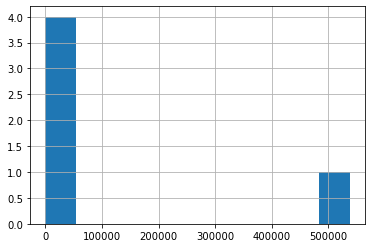

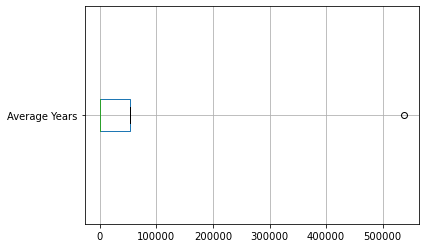

--------------------
Japan
moy:
 3380274.9347806717
med:
 585018.1787336534
mod:
 0   -1.183446e-01
1    8.419080e+01
2    1.169952e+06
3    1.235106e+07
dtype: float64
var:
 27053130780395.617
ect:
 5201262.42179681


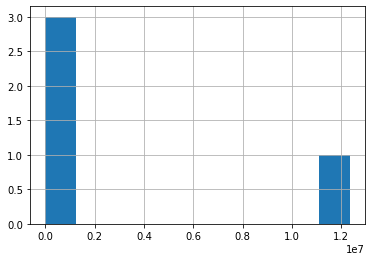

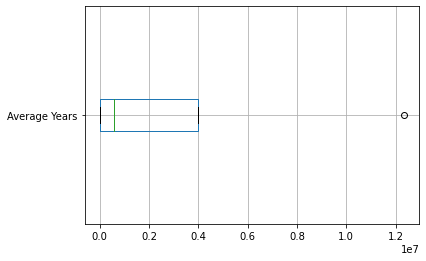

--------------------
Jordan
moy:
 364697.76204461243
med:
 75927.81786522416
mod:
 0    4.912448e+00
1    4.113573e+01
2    1.518145e+05
3    1.306930e+06
dtype: float64
var:
 299774286348.8464
ect:
 547516.4713036919


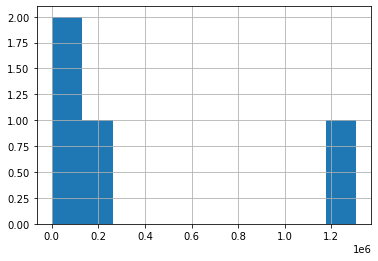

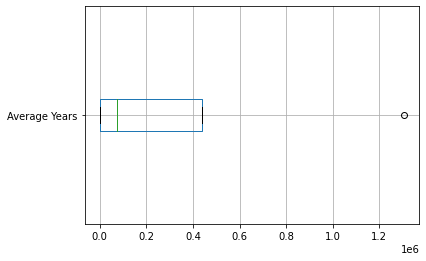

--------------------
Kazakhstan
moy:
 727883.9017002302
med:
 220251.66666666666
mod:
 0    1.439223e+00
1    5.623594e+01
2    2.202517e+05
3    7.571400e+05
4    2.661970e+06
dtype: float64
var:
 1011756415177.1211
ect:
 1005861.03174202


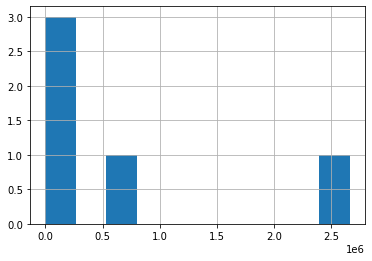

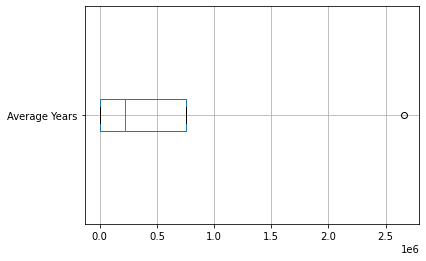

--------------------
Kenya
moy:
 1925359.881839936
med:
 18.736370404561352
mod:
 0    2.672829e+00
1    1.283333e+01
2    1.873637e+01
3    1.042128e+06
4    8.584637e+06
dtype: float64
var:
 11249393027343.89
ect:
 3354011.4828879


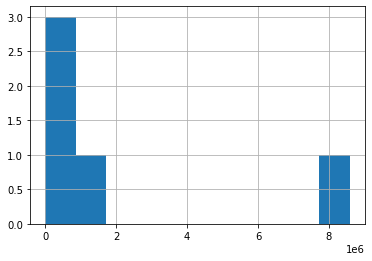

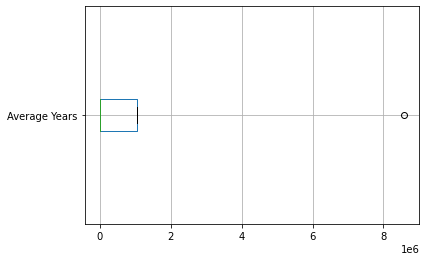

--------------------
Kiribati
moy:
 760.4829717399331
med:
 11.094046928333334
mod:
 0       1.854868
1      11.094047
2    2268.500000
dtype: float64
var:
 1137071.9058314757
ect:
 1066.3357378572077


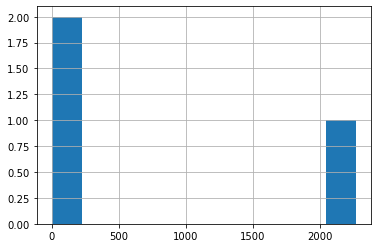

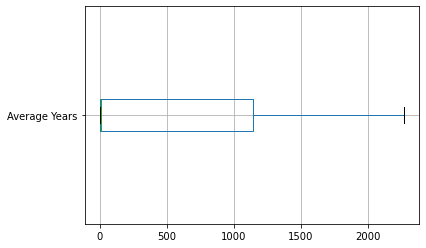

--------------------
Korea, Dem. People’s Rep.
moy:
 1458786.78568103
med:
 385896.8333333333
mod:
 0    5.237098e-01
1    3.858968e+05
2    3.990463e+06
dtype: float64
var:
 3229511554037.732
ect:
 1797084.181121667


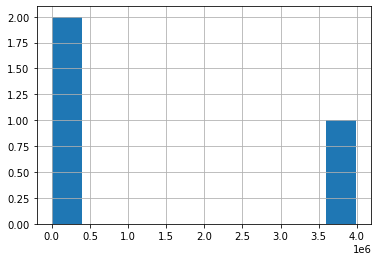

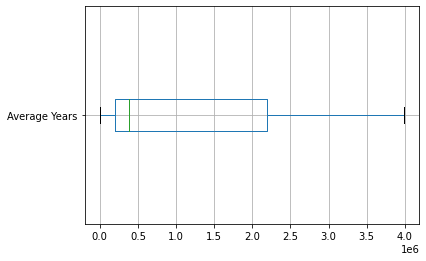

--------------------
Korea, Rep.
moy:
 2471381.7878393745
med:
 1659536.8753814583
mod:
 0    5.672612e-01
1    8.558410e+01
2    3.318988e+06
3    6.566453e+06
dtype: float64
var:
 7425768376283.277
ect:
 2725026.3074479257


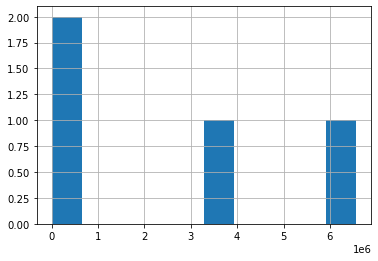

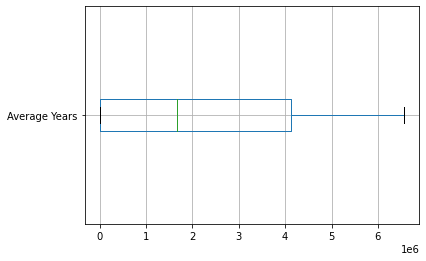

--------------------
Kosovo
moy:
 0.3772534448763482
med:
 0.3772534448763482
mod:
 0    0.377253
dtype: float64
var:
 0.0
ect:
 0.0


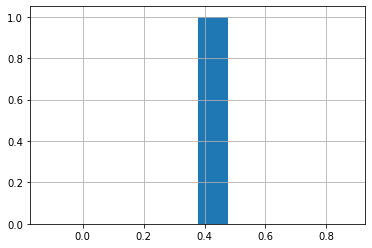

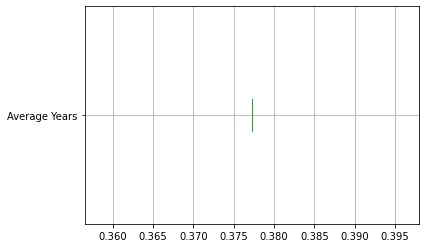

--------------------
Kuwait
moy:
 123152.861564435
med:
 20986.275194975
mod:
 0         5.562534
1        71.550390
2     41901.000000
3    450633.333333
dtype: float64
var:
 36039897704.1189
ect:
 189841.77017747937


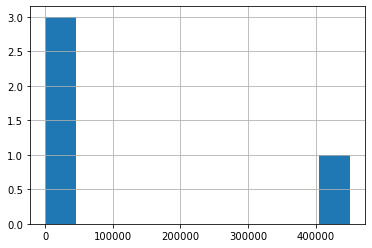

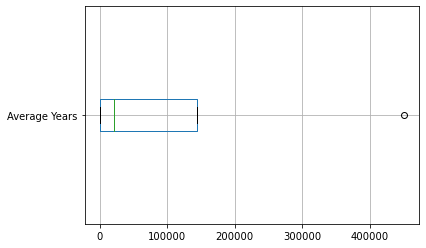

--------------------
Kyrgyz Republic
moy:
 298684.042396901
med:
 99342.5
mod:
 0    1.687477e+00
1    2.252451e+01
2    9.934250e+04
3    2.679068e+05
4    1.126147e+06
dtype: float64
var:
 180757706618.96426
ect:
 425156.0967679568


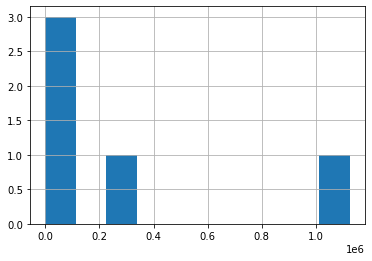

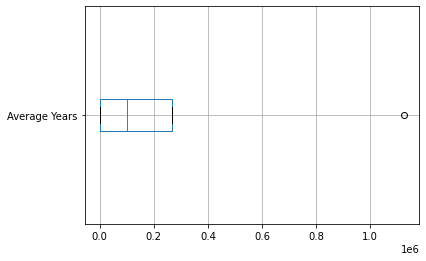

--------------------
Lao PDR
moy:
 350313.35669543606
med:
 128275.0
mod:
 0    1.332198e+00
1    1.195128e+01
2    1.282750e+05
3    1.484762e+05
4    1.474802e+06
dtype: float64
var:
 319988866169.3921
ect:
 565675.5838547321


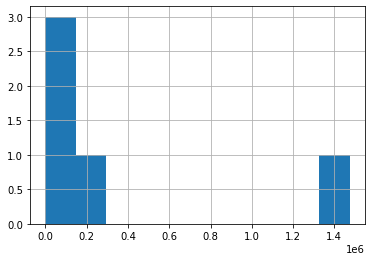

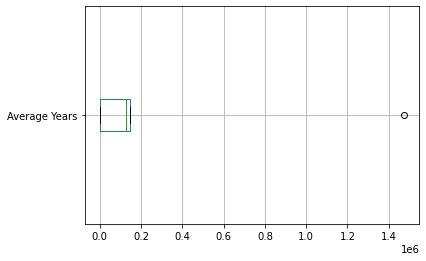

--------------------
Latvia
moy:
 77611.08603541953
med:
 17505.833333333332
mod:
 0        -1.328973
1        73.592483
2     17505.833333
3     97248.333333
4    273229.000000
dtype: float64
var:
 10860076203.487762
ect:
 104211.68938025985


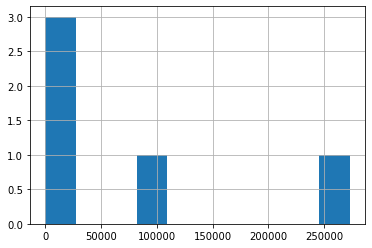

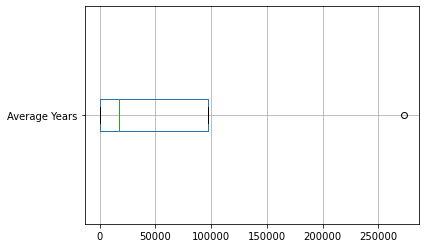

--------------------
Lebanon
moy:
 213740.66642107145
med:
 88849.16666666667
mod:
 0         5.593808
1        62.404964
2     88849.166667
3    217893.833333
4    761892.333333
dtype: float64
var:
 81485293225.84366
ect:
 285456.2895188047


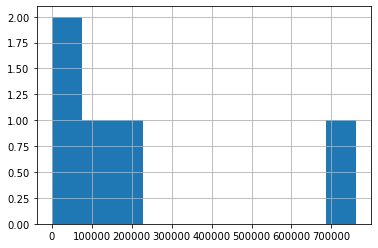

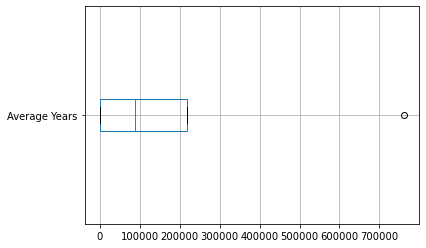

--------------------
Lesotho
moy:
 134974.3031649261
med:
 25141.071666666667
mod:
 0         1.235993
1        13.810000
2     50268.333333
3    489613.833333
dtype: float64
var:
 42344090315.071625
ect:
 205776.79731950254


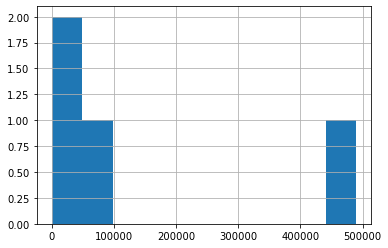

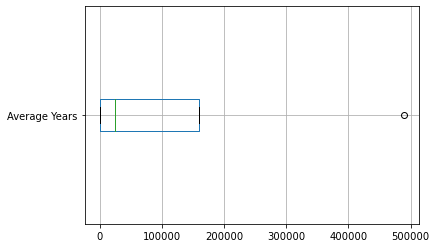

--------------------
Liberia
moy:
 252945.5212570351
med:
 51026.15948896692
mod:
 0         2.766050
1         3.652311
2    102048.666667
3    909727.000000
dtype: float64
var:
 145522849505.6155
ect:
 381474.57255446987


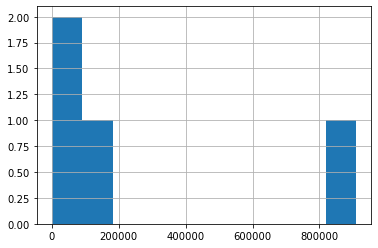

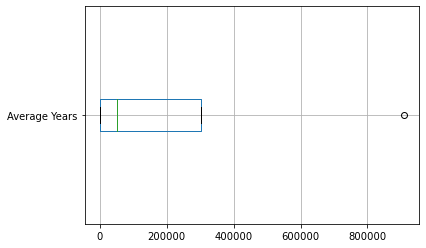

--------------------
Libya
moy:
 410219.4913178957
med:
 109930.33333333333
mod:
 0    3.072870e-01
1    1.099303e+05
2    1.120728e+06
dtype: float64
var:
 254425153807.8535
ect:
 504405.743234406


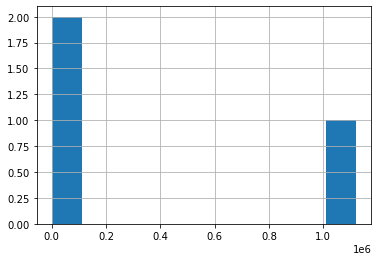

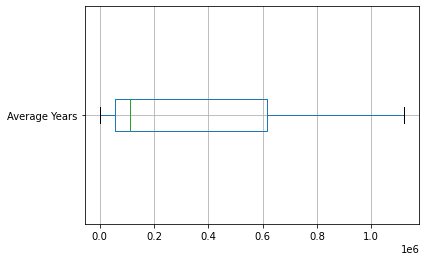

--------------------
Liechtenstein
moy:
 45.37785120534518
med:
 45.37785120534518
mod:
 0     0.745887
1    90.009816
dtype: float64
var:
 1992.0122680417173
ect:
 44.631964644654815


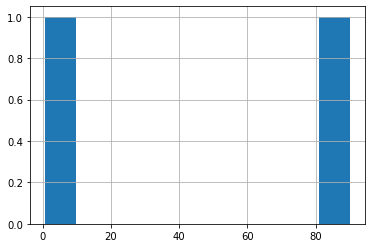

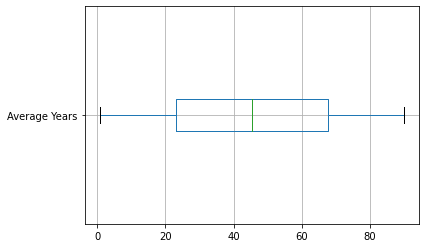

--------------------
Lithuania
moy:
 131701.58138896382
med:
 29994.0
mod:
 0        -1.418200
1        67.491811
2     29994.000000
3    168711.500000
4    459736.333333
dtype: float64
var:
 30798835662.082863
ect:
 175495.97050098574


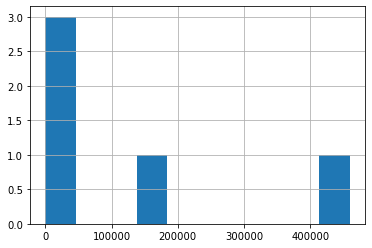

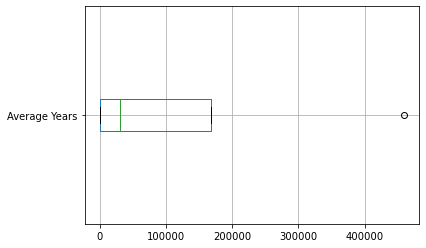

--------------------
Luxembourg
moy:
 17379.1607540269
med:
 3176.281698525
mod:
 0        2.246286
1       93.063397
2     6259.500000
3    63161.833333
dtype: float64
var:
 705116570.5155532
ect:
 26554.031153773118


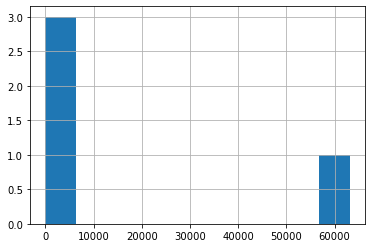

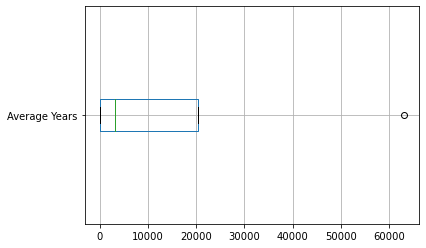

--------------------
Macao SAR, China
moy:
 21116.244741448125
med:
 4877.666666666667
mod:
 0        2.241736
1       64.981971
2     4877.666667
3    28985.833333
4    71650.500000
dtype: float64
var:
 753657916.8334402
ect:
 27452.83076175279


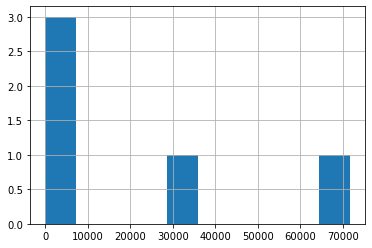

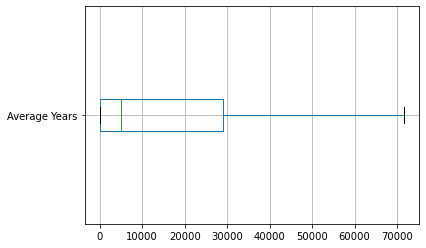

--------------------
Macedonia, FYR
moy:
 80349.00927613395
med:
 13112.227512275833
mod:
 0         0.082080
1        61.621691
2     26162.833333
3    295171.500000
dtype: float64
var:
 15496714722.723076
ect:
 124485.80128963735


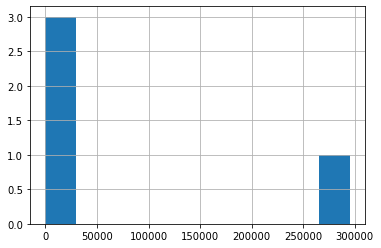

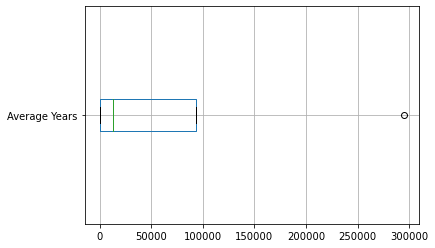

--------------------
Madagascar
moy:
 1294759.7987874513
med:
 288349.0644976825
mod:
 0    2.732821e+00
1    2.795662e+00
2    5.766953e+05
3    4.602338e+06
dtype: float64
var:
 3702120973937.171
ect:
 1924089.6481030115


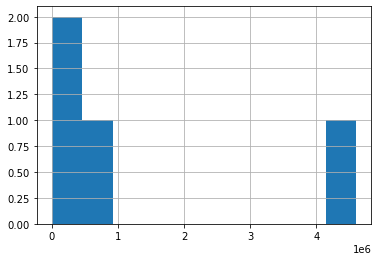

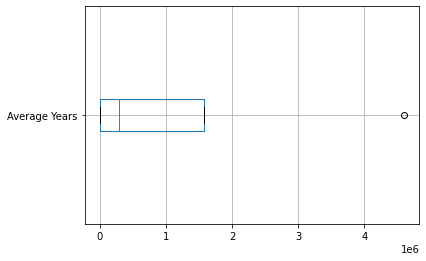

--------------------
Malawi
moy:
 953630.7447721818
med:
 201705.34322902892
mod:
 0    2.959297e+00
1    5.019791e+00
2    4.034057e+05
3    3.411109e+06
dtype: float64
var:
 2040189156596.8818
ect:
 1428351.9022274874


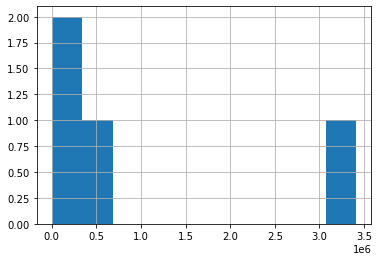

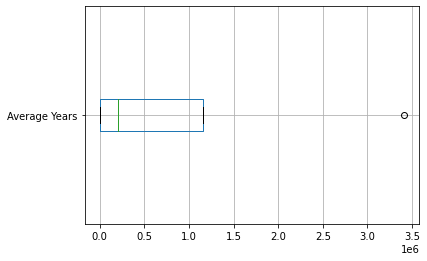

--------------------
Malaysia
moy:
 1134544.660623023
med:
 270167.7405838292
mod:
 0    1.783430e+00
1    1.969914e+01
2    6.248117e+01
3    5.402730e+05
4    9.948190e+05
5    5.272092e+06
dtype: float64
var:
 3558894049393.311
ect:
 1886503.1273213704


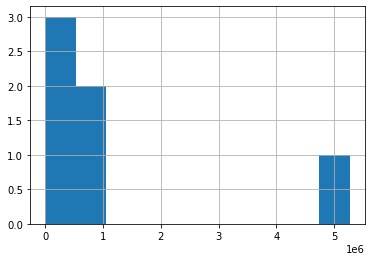

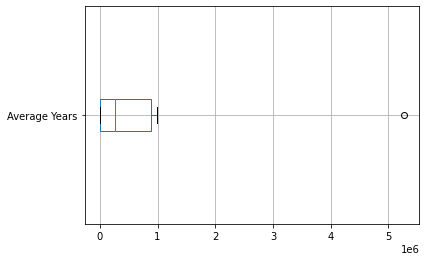

--------------------
Maldives
moy:
 16051.660862793247
med:
 41.21700919166667
mod:
 0        2.133493
1       12.120478
2       41.217009
3     6263.666667
4    73939.166667
dtype: float64
var:
 843591331.1002438
ect:
 29044.643759224244


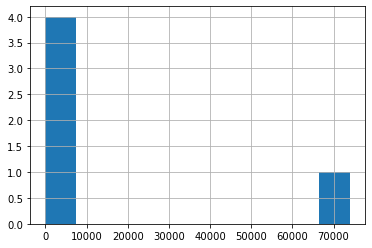

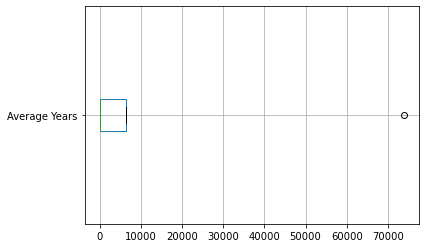

--------------------
Mali
moy:
 842822.1966330047
med:
 192913.9025
mod:
 0    2.981532e+00
1    4.638333e+00
2    3.858232e+05
3    2.985458e+06
dtype: float64
var:
 1555105491295.4915
ect:
 1247038.6887725221


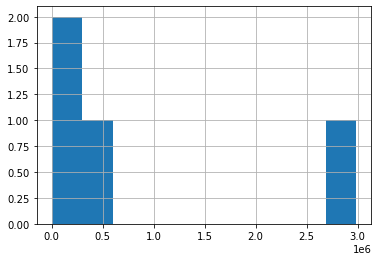

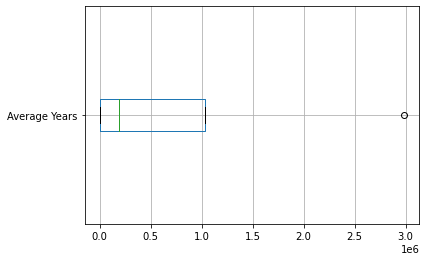

--------------------
Malta
moy:
 14179.502761377302
med:
 4790.5
mod:
 0        0.765891
1       69.581250
2     4790.500000
3    12155.666667
4    53881.000000
dtype: float64
var:
 413716926.5396949
ect:
 20340.032609110902


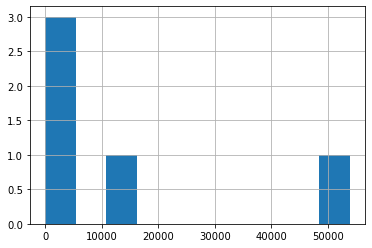

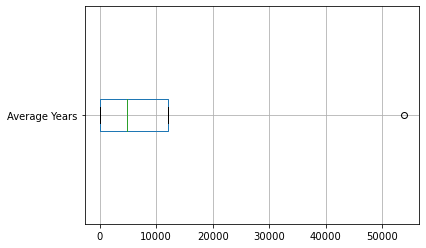

--------------------
Marshall Islands
moy:
 412.1590245024864
med:
 13.2637403
mod:
 0       0.213333
1      13.263740
2    1223.000000
dtype: float64
var:
 328759.9292937599
ect:
 573.3759057492388


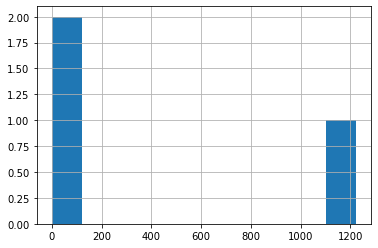

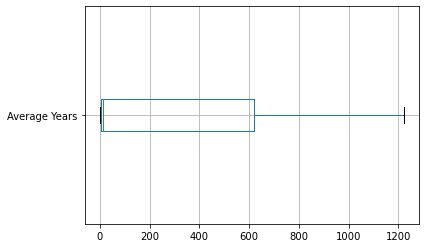

--------------------
Mauritania
moy:
 196796.59293531874
med:
 44569.21659389083
mod:
 0         2.938553
1         7.599854
2     89130.833333
3    698045.000000
dtype: float64
var:
 85073882894.5723
ect:
 291674.2753390712


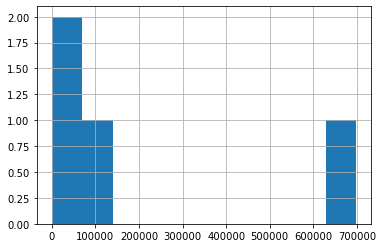

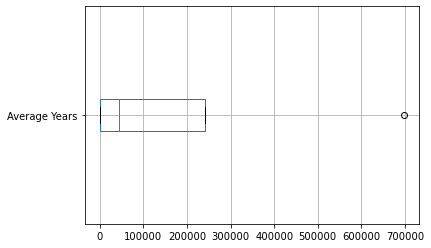

--------------------
Mauritius
moy:
 43963.085010820476
med:
 9635.896618249166
mod:
 0         0.201540
1        16.348622
2        38.959903
3     19232.833333
4     38241.166667
5    206249.000000
dtype: float64
var:
 5462403905.039314
ect:
 73908.07740050687


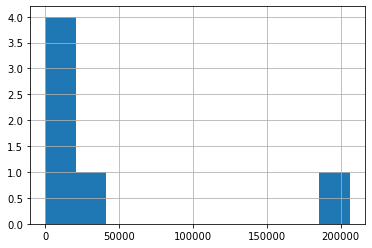

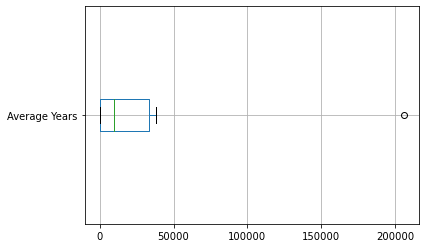

--------------------
Mexico
moy:
 5642961.494473496
med:
 1199820.4381115332
mod:
 0    1.435004e+00
1    4.220956e+01
2    2.399599e+06
3    2.017220e+07
dtype: float64
var:
 71325954204972.53
ect:
 8445469.448465995


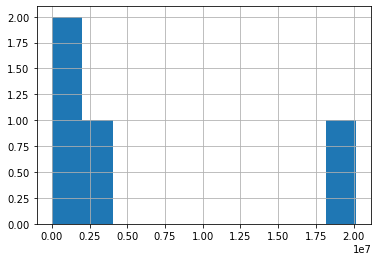

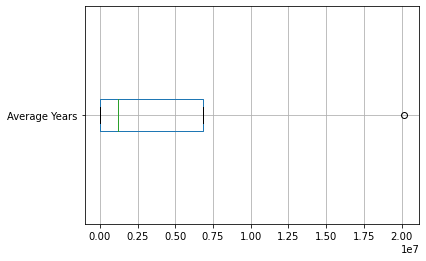

--------------------
Micronesia, Fed. Sts.
moy:
 6962.590810627012
med:
 1335.5604586900001
mod:
 0        0.075658
1       26.287584
2     2644.833333
3    25179.166667
dtype: float64
var:
 111768896.31169434
ect:
 10572.080983027625


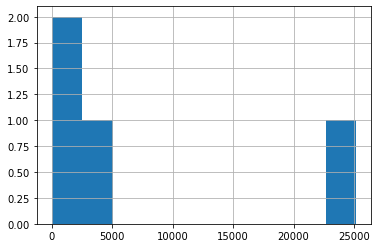

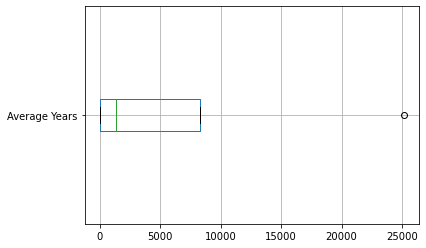

--------------------
Moldova
moy:
 183238.63557044533
med:
 61032.714718781666
mod:
 0        -0.053822
1        44.762771
2    122020.666667
3    610889.166667
dtype: float64
var:
 63442257196.326706
ect:
 251877.464645662


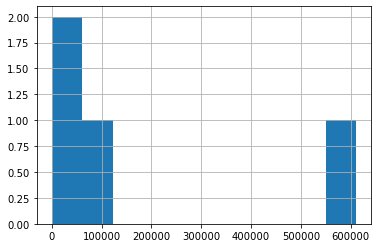

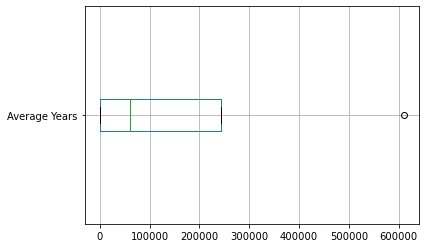

--------------------
Monaco
moy:
 43.62518611213468
med:
 43.62518611213468
mod:
 0     0.789822
1    86.460550
dtype: float64
var:
 1834.868428248314
ect:
 42.83536422453198


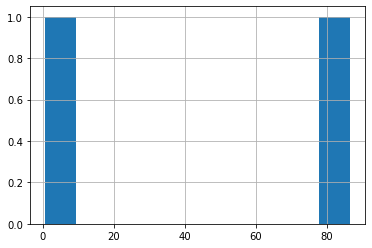

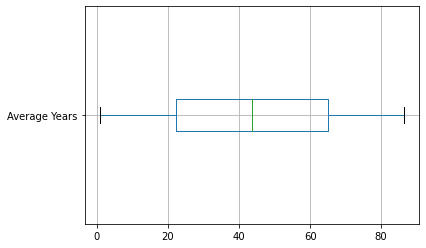

--------------------
Mongolia
moy:
 153038.6707395343
med:
 43714.666666666664
mod:
 0         1.823955
1        16.363076
2     43714.666667
3    173704.000000
4    547756.500000
dtype: float64
var:
 43003412310.497375
ect:
 207372.6411812739


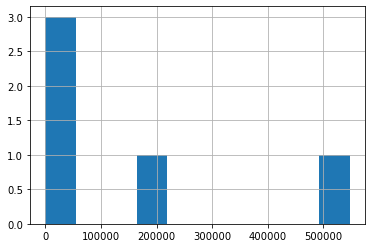

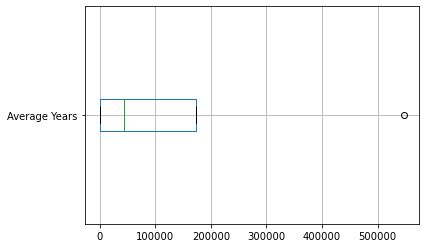

--------------------
Montenegro
moy:
 2778.7779481277307
med:
 53.22998414
mod:
 0       0.103860
1      53.229984
2    8283.000000
dtype: float64
var:
 15148700.595665207
ect:
 3892.1331677712683


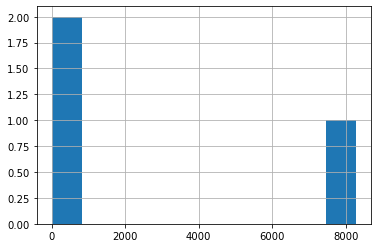

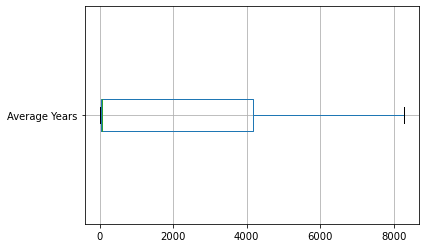

--------------------
Morocco
moy:
 1497051.127760219
med:
 590183.1666666666
mod:
 0    1.404878e+00
1    5.390059e+01
2    5.901832e+05
3    6.555042e+05
4    6.239513e+06
dtype: float64
var:
 5700742793433.919
ect:
 2387622.833161452


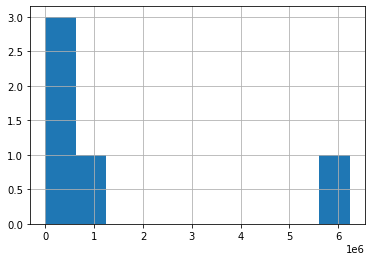

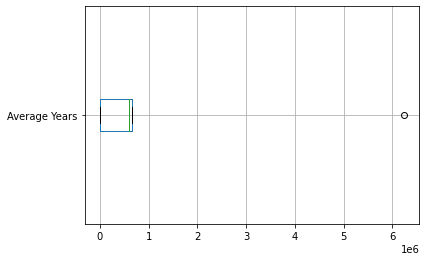

--------------------
Mozambique
moy:
 1137974.113000854
med:
 135044.0
mod:
 0    2.909373e+00
1    7.988964e+00
2    1.350440e+05
3    6.535242e+05
4    4.901292e+06
dtype: float64
var:
 3598612735419.499
ect:
 1897000.9845594438


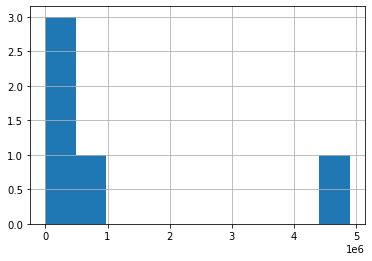

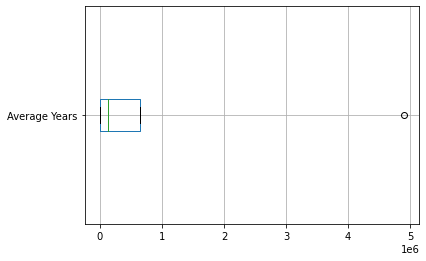

--------------------
Myanmar
moy:
 2520903.2737754527
med:
 525399.8729861676
mod:
 0    8.491295e-01
1    7.745972e+00
2    1.050792e+06
3    9.032812e+06
dtype: float64
var:
 14319013056138.447
ect:
 3784047.179428191


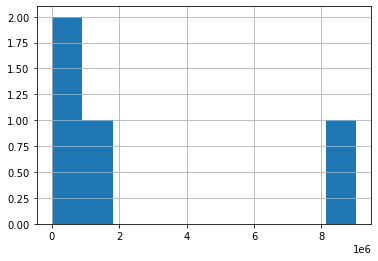

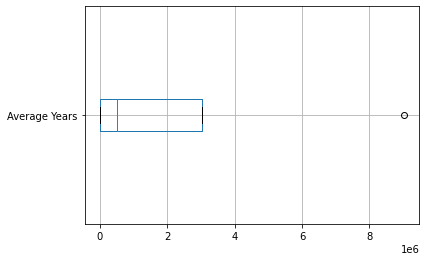

--------------------
Namibia
moy:
 145691.06805692523
med:
 26724.664104318334
mod:
 0         2.110686
1        15.161542
2     53434.166667
3    529312.833333
dtype: float64
var:
 49530934171.69479
ect:
 222555.46313603446


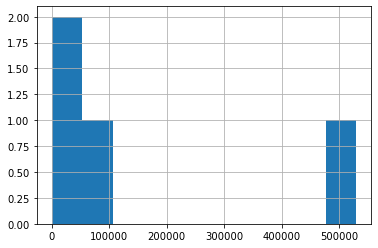

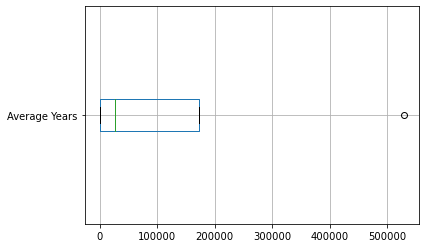

--------------------
Nauru
moy:
 215.66666666666666
med:
 215.66666666666666
mod:
 0    215.666667
dtype: float64
var:
 0.0
ect:
 0.0


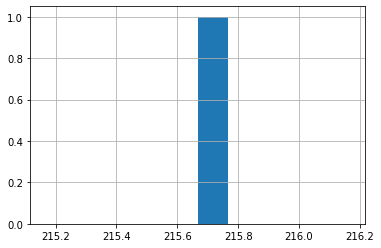

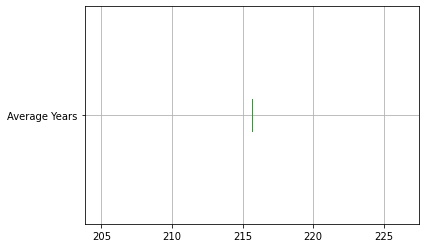

--------------------
Nepal
moy:
 1444279.944574802
med:
 17.503206570943203
mod:
 0    1.152848e+00
1    1.240015e+01
2    1.750321e+01
3    6.869422e+05
4    6.534426e+06
dtype: float64
var:
 6548179286640.687
ect:
 2558941.047902567


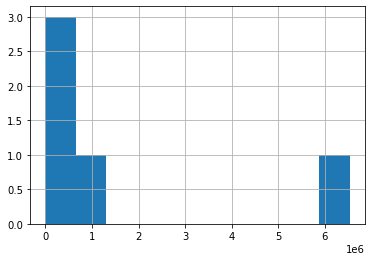

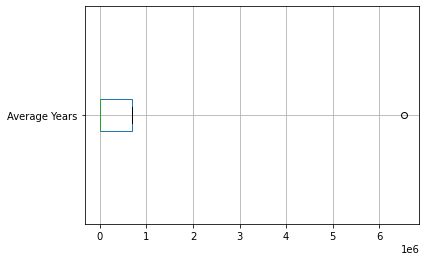

--------------------
Netherlands
moy:
 550147.6997695009
med:
 99026.77893267083
mod:
 0    4.078793e-01
1    9.205787e+01
2    1.979615e+05
3    2.002537e+06
dtype: float64
var:
 709673141641.7673
ect:
 842421.0002378664


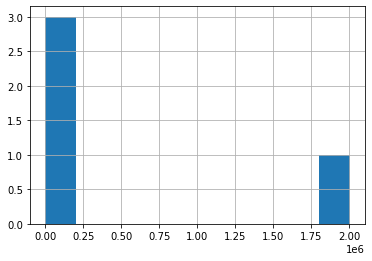

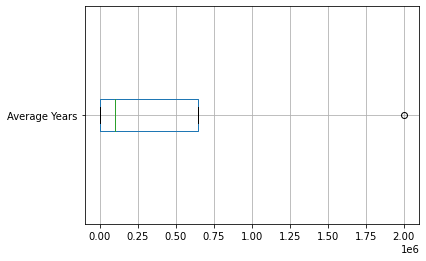

--------------------
New Caledonia
moy:
 30.901925937835276
med:
 30.901925937835276
mod:
 0     1.803560
1    60.000292
dtype: float64
var:
 846.7149151503096
ect:
 29.098366193831392


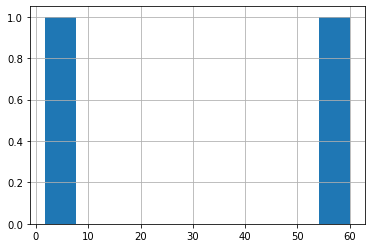

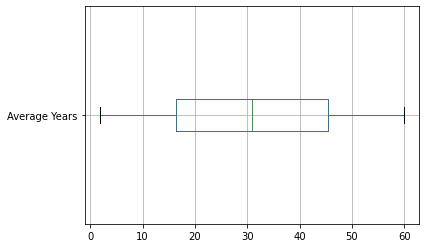

--------------------
New Zealand
moy:
 157020.32271733243
med:
 29198.73644658333
mod:
 0         1.098360
1        18.003072
2        83.306226
3     58314.166667
4    262596.528646
5    621108.833333
dtype: float64
var:
 51700229753.879555
ect:
 227376.84524568362


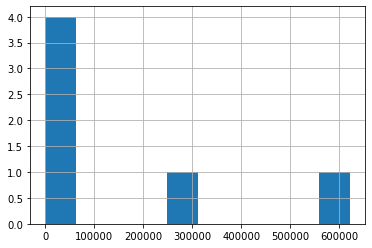

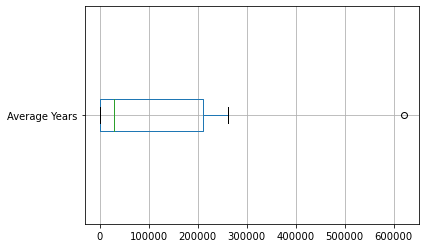

--------------------
Nicaragua
moy:
 349829.1658180054
med:
 61472.825357625
mod:
 0    1.179223e+00
1    1.448405e+01
2    1.229312e+05
3    1.276370e+06
dtype: float64
var:
 288677560591.2202
ect:
 537287.2235510725


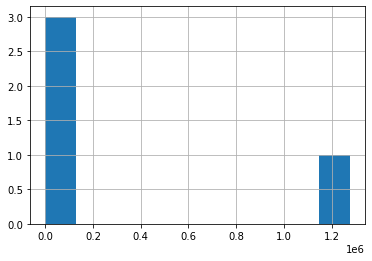

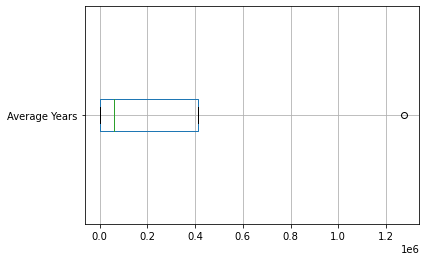

--------------------
Niger
moy:
 893595.109651188
med:
 214253.49730904464
mod:
 0    1.610653e+00
1    3.827951e+00
2    4.285032e+05
3    3.145872e+06
dtype: float64
var:
 1721518918912.6406
ect:
 1312066.6594775743


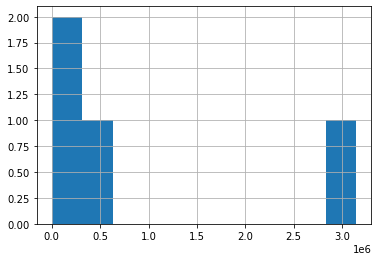

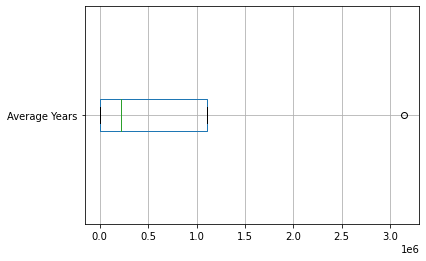

--------------------
Nigeria
moy:
 9689839.916416146
med:
 2017945.8333333333
mod:
 0    2.665665e+00
1    1.766667e+01
2    4.035874e+06
3    3.472347e+07
dtype: float64
var:
 211608833319077.62
ect:
 14546780.857601369


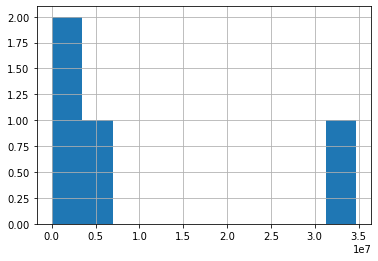

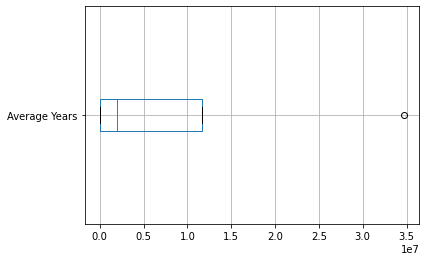

--------------------
Northern Mariana Islands
moy:
 -0.25885215762313024
med:
 -0.25885215762313024
mod:
 0   -0.258852
dtype: float64
var:
 0.0
ect:
 0.0


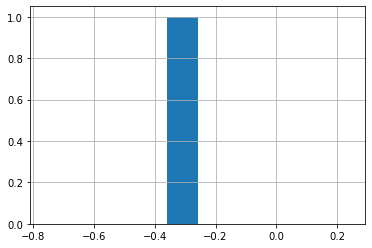

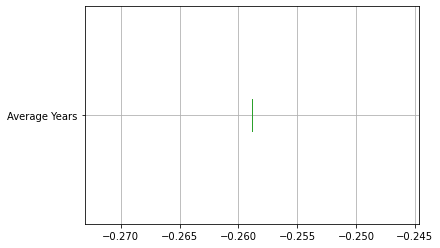

--------------------
Norway
moy:
 189893.26273067543
med:
 63105.833333333336
mod:
 0         1.198043
1        94.948943
2     63105.833333
3    246754.500000
4    639509.833333
dtype: float64
var:
 58709141853.04057
ect:
 242299.69429002705


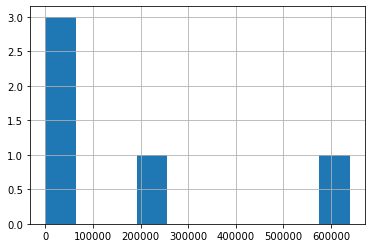

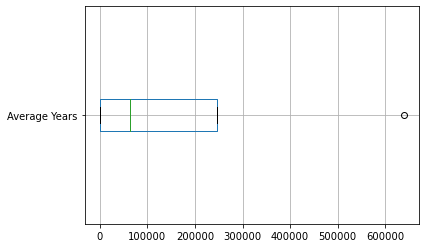

--------------------
Oman
moy:
 156078.8439337431
med:
 22971.469300939167
mod:
 0         6.270466
1        57.771935
2     45885.166667
3    578366.166667
dtype: float64
var:
 59792613136.71562
ect:
 244525.28118114008


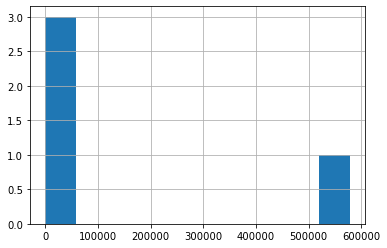

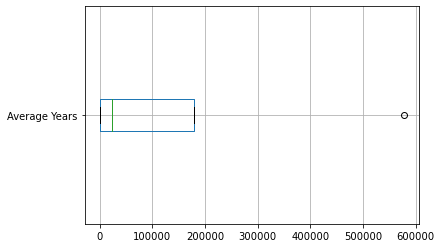

--------------------
Pakistan
moy:
 8615302.441286126
med:
 11.638636747996001
mod:
 0    2.091127e+00
1    1.064333e+01
2    1.163864e+01
3    3.887834e+06
4    3.918865e+07
dtype: float64
var:
 235949737048073.44
ect:
 15360655.488880461


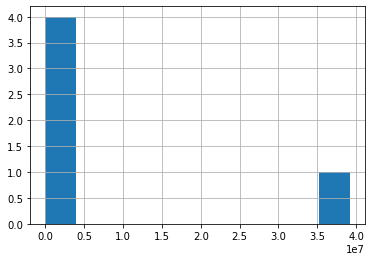

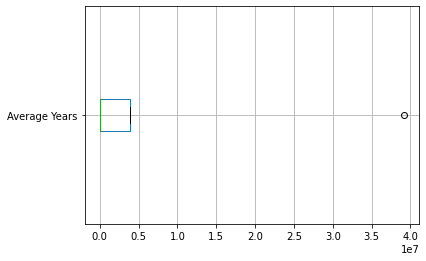

--------------------
Palau
moy:
 122.79546516226654
med:
 122.79546516226654
mod:
 0      0.757597
1    244.833333
dtype: float64
var:
 14893.24126773868
ect:
 122.0378681710668


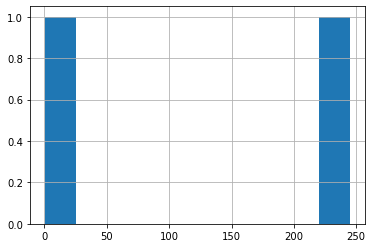

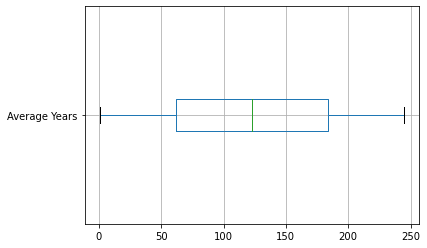

--------------------
Panama
moy:
 172734.27482963415
med:
 34316.52144335084
mod:
 0         1.723099
1        43.876220
2     68589.166667
3    622302.333333
dtype: float64
var:
 68154037745.1381
ect:
 261063.28302757954


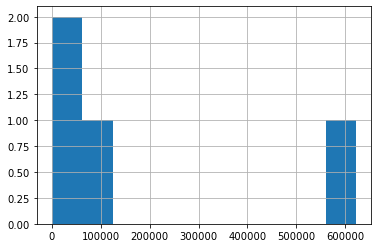

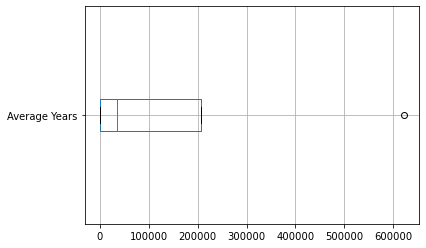

--------------------
Papua New Guinea
moy:
 401557.55747856526
med:
 84037.44
mod:
 0    2.183248e+00
1    4.380000e+00
2    1.680705e+05
3    1.438153e+06
dtype: float64
var:
 362884583978.7393
ect:
 602399.023885945


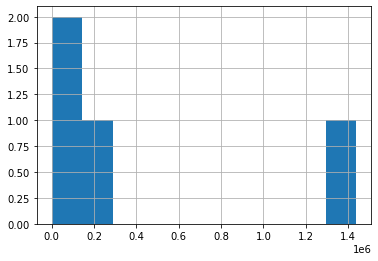

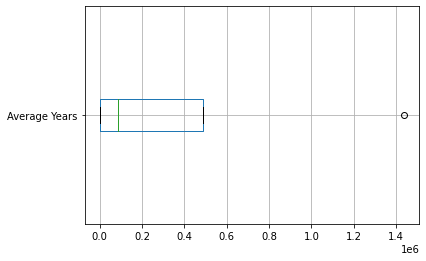

--------------------
Paraguay
moy:
 368216.7189978308
med:
 67570.60351698584
mod:
 0    1.335624e+00
1    3.370703e+01
2    1.351075e+05
3    1.337724e+06
dtype: float64
var:
 316356555272.0498
ect:
 562455.8251738973


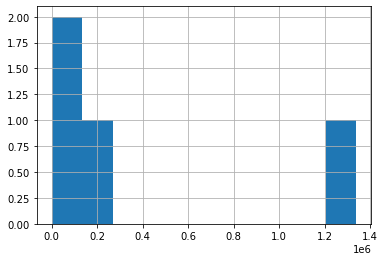

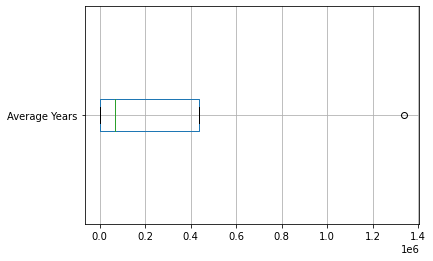

--------------------
Peru
moy:
 1244008.4556949104
med:
 38.21333333333333
mod:
 0    1.311948e+00
1    1.508653e+01
2    3.821333e+01
3    5.618872e+05
4    5.658100e+06
dtype: float64
var:
 4918406653730.471
ect:
 2217748.1042107716


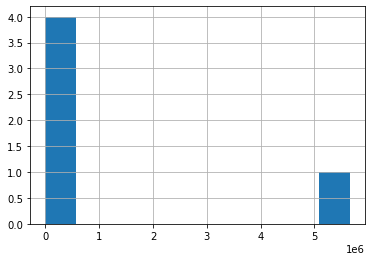

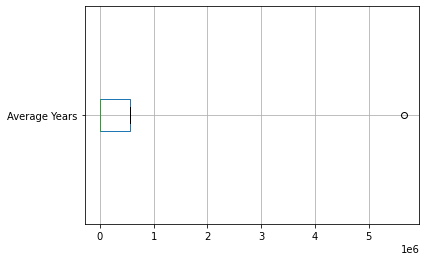

--------------------
Philippines
moy:
 5210372.934761764
med:
 1024378.9695102992
mod:
 0    1.633360e+00
1    4.027235e+01
2    2.048718e+06
3    1.879273e+07
dtype: float64
var:
 62193020472553.27
ect:
 7886255.161516984


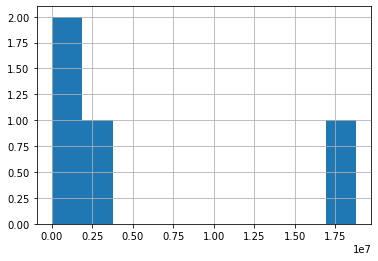

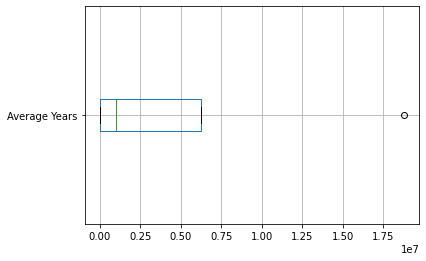

--------------------
Poland
moy:
 1311199.0663446002
med:
 195589.58551635334
mod:
 0   -7.232097e-02
1    6.400437e+01
2    3.911152e+05
3    4.853617e+06
dtype: float64
var:
 4208399677980.704
ect:
 2051438.441187233


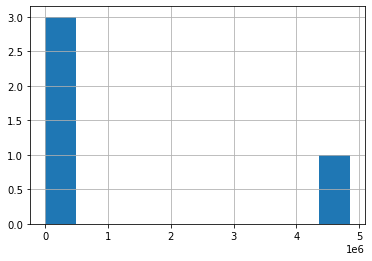

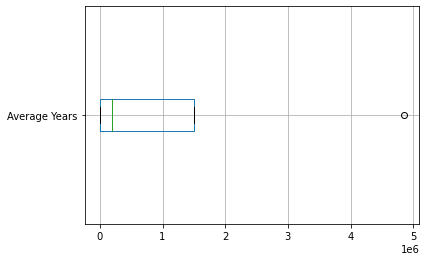

--------------------
Portugal
moy:
 329936.80665836536
med:
 110121.5
mod:
 0   -3.347906e-01
1    6.070142e+01
2    1.101215e+05
3    3.734792e+05
4    1.166023e+06
dtype: float64
var:
 193386318194.09082
ect:
 439757.1127271176


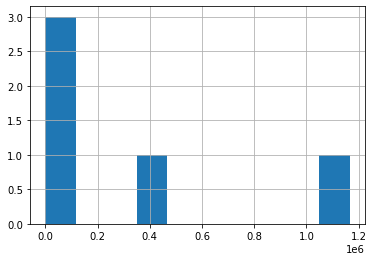

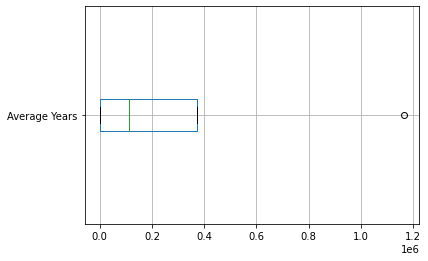

--------------------
Puerto Rico
moy:
 17873.19389816191
med:
 64.48376685833333
mod:
 0       -1.235406
1       64.483767
2    53556.333333
dtype: float64
var:
 636643939.8098835
ect:
 25231.804133075453


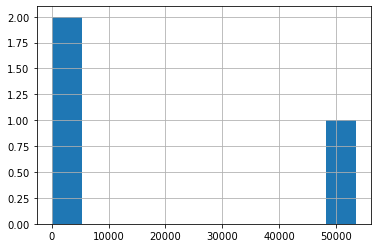

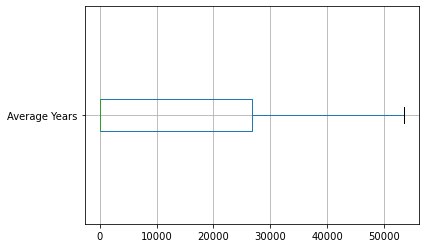

--------------------
Qatar
moy:
 35888.26834472809
med:
 10080.3312355375
mod:
 0         7.410908
1        79.495804
2     20081.166667
3    123385.000000
dtype: float64
var:
 2618811658.7665176
ect:
 51174.32616817263


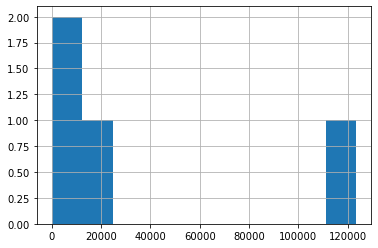

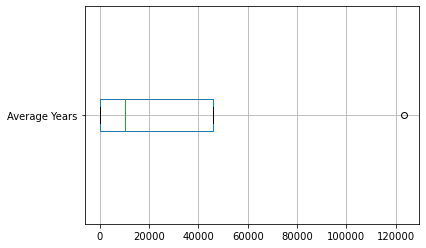

--------------------
Romania
moy:
 694501.0560018542
med:
 215128.33333333334
mod:
 0   -4.579392e-01
1    4.757128e+01
2    2.151283e+05
3    7.192023e+05
4    2.538128e+06
dtype: float64
var:
 918792964131.1846
ect:
 958536.8872042351


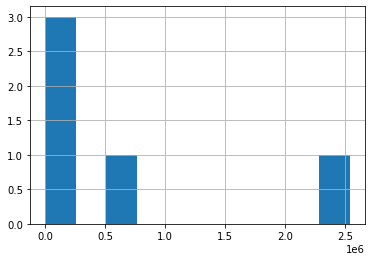

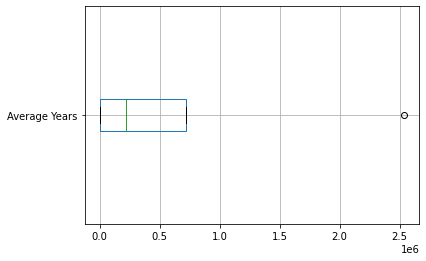

--------------------
Russian Federation
moy:
 4643994.317264101
med:
 647765.7250000001
mod:
 0    1.523897e-01
1    6.128333e+01
2    1.295470e+06
3    1.728045e+07
dtype: float64
var:
 53506328129993.2
ect:
 7314801.988433672


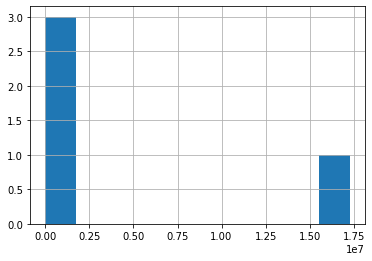

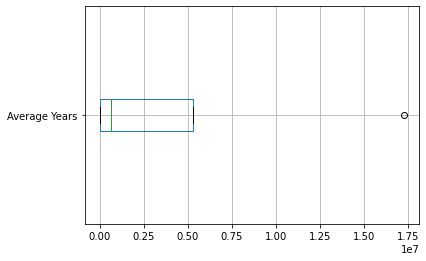

--------------------
Rwanda
moy:
 539032.9315364257
med:
 73835.5
mod:
 0    2.553706e+00
1    1.010398e+01
2    7.383550e+04
3    2.595933e+05
4    2.361723e+06
dtype: float64
var:
 839558837889.2468
ect:
 916274.4337201857


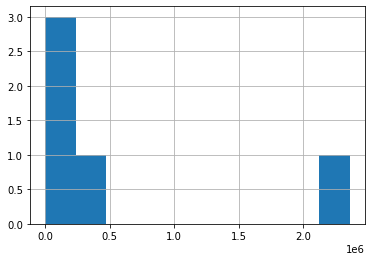

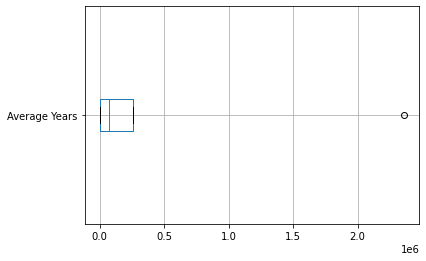

--------------------
Samoa
moy:
 11466.98123031048
med:
 2260.9857916475
mod:
 0        0.786671
1       15.471583
2     4506.500000
3    41345.166667
dtype: float64
var:
 300941238.6970035
ect:
 17347.658017640406


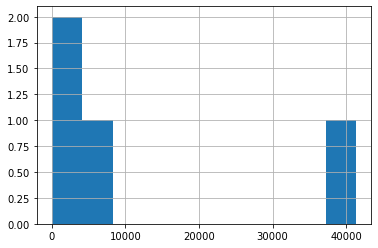

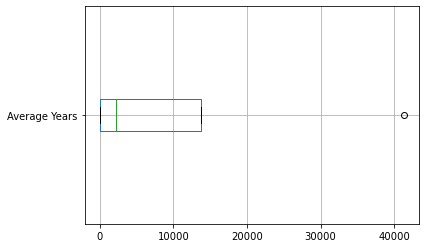

--------------------
San Marino
moy:
 1.1713857546643431
med:
 1.1713857546643431
mod:
 0    1.171386
dtype: float64
var:
 0.0
ect:
 0.0


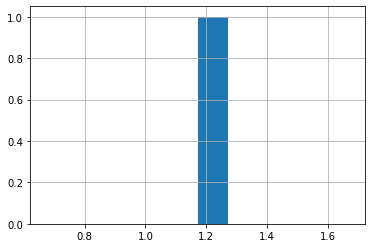

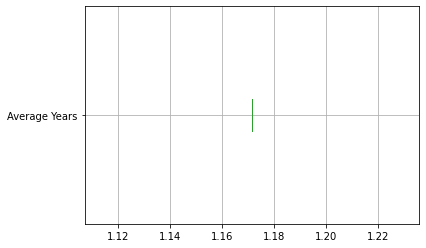

--------------------
Sao Tome and Principe
moy:
 10221.92665854816
med:
 2226.4761333333336
mod:
 0        2.254368
1       22.285600
2     4430.666667
3    36432.500000
dtype: float64
var:
 232251806.66007528
ect:
 15239.809928607223


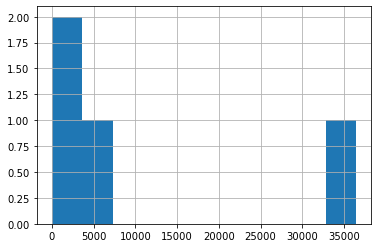

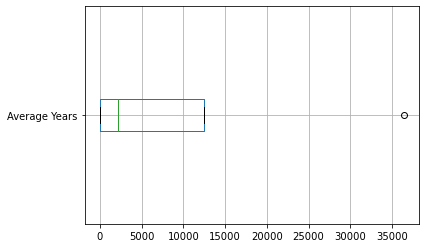

--------------------
Saudi Arabia
moy:
 1387592.6395955072
med:
 544770.6666666666
mod:
 0    2.809662e+00
1    5.622165e+01
2    5.447707e+05
3    1.251994e+06
4    5.141140e+06
dtype: float64
var:
 3733702809201.8438
ect:
 1932279.1747575824


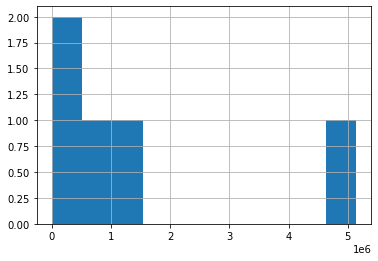

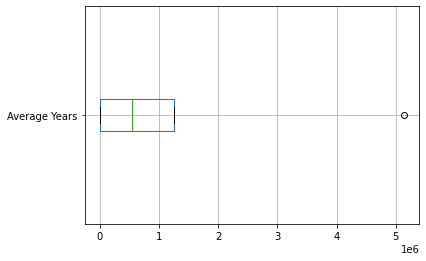

--------------------
Senegal
moy:
 666272.3920806702
med:
 127124.66666666667
mod:
 0    2.945359e+00
1    1.351504e+01
2    1.271247e+05
3    3.331385e+05
4    2.871082e+06
dtype: float64
var:
 1230132240756.596
ect:
 1109113.2677759274


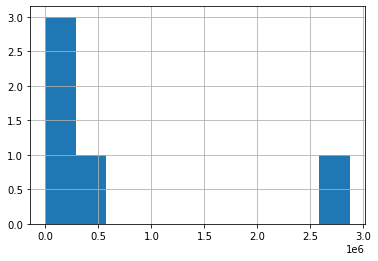

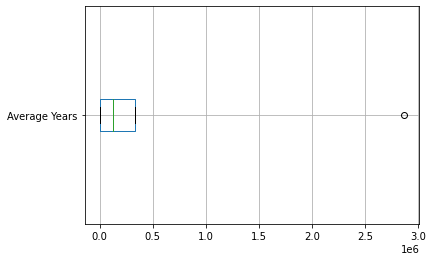

--------------------
Serbia
moy:
 78339.99526901907
med:
 52.00707834
mod:
 0        -0.521271
1        52.007078
2    234968.500000
dtype: float64
var:
 12266244707.002708
ect:
 110753.07989849632


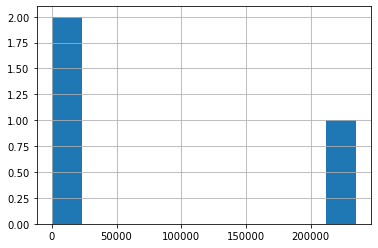

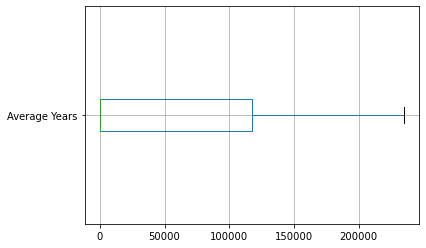

--------------------
Seychelles
moy:
 448.49616911497236
med:
 47.85905405166667
mod:
 0       1.129453
1      47.859054
2    1296.500000
dtype: float64
var:
 359919.1911956814
ect:
 599.9326555503387


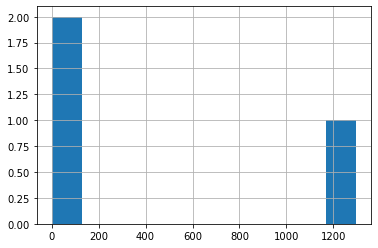

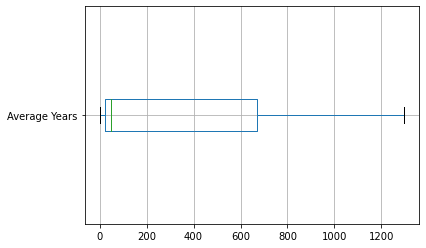

--------------------
Sierra Leone
moy:
 348564.8785439003
med:
 74242.36514338225
mod:
 0    2.283889e+00
1    3.396953e+00
2    1.484813e+05
3    1.245772e+06
dtype: float64
var:
 272001482476.03848
ect:
 521537.6136732982


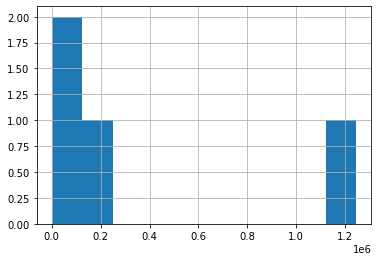

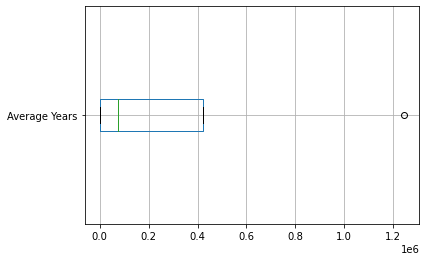

--------------------
Singapore
moy:
 225532.1865833661
med:
 75.490708285
mod:
 0         1.735708
1        75.490708
2    676519.333333
dtype: float64
var:
 101694704173.47157
ect:
 318896.07111639297


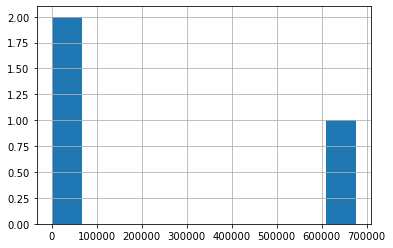

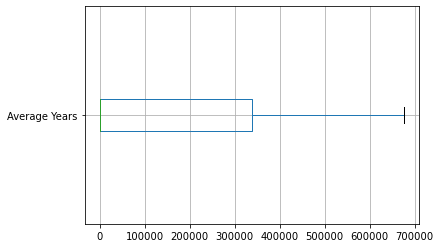

--------------------
Slovak Republic
moy:
 189686.33538067463
med:
 26174.696440607502
mod:
 0         0.115308
1        77.059548
2     52272.333333
3    706395.833333
dtype: float64
var:
 89450963200.09843
ect:
 299083.53883170907


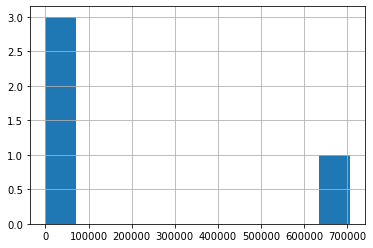

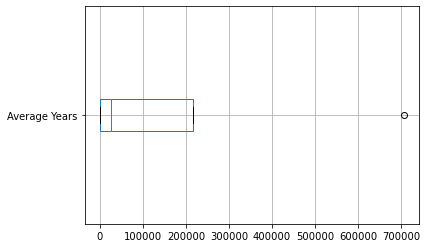

--------------------
Slovenia
moy:
 57752.9257239447
med:
 9183.087855778334
mod:
 0         0.193851
1        70.509045
2     18295.666667
3    212645.333333
dtype: float64
var:
 8052793115.020831
ect:
 89737.35629614253


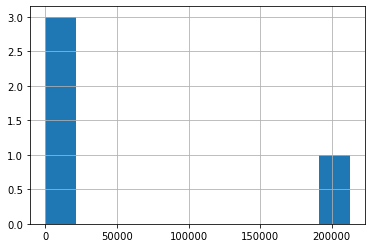

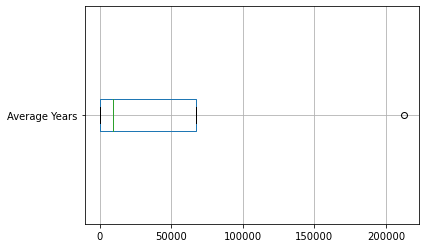

--------------------
Solomon Islands
moy:
 31824.91485167714
med:
 6736.083155415
mod:
 0         2.159763
1         7.499644
2     13464.666667
3    113825.333333
dtype: float64
var:
 2271550749.1330314
ect:
 47660.78838136263


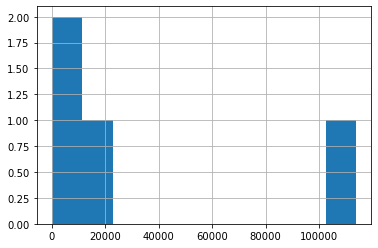

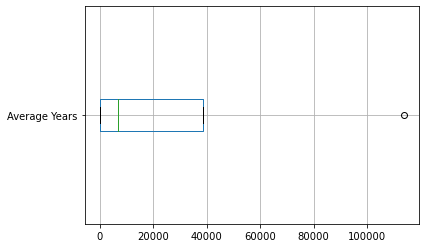

--------------------
Somalia
moy:
 727406.1788998591
med:
 261655.83333333334
mod:
 0    2.870033e+00
1    2.616558e+05
2    1.920560e+06
dtype: float64
var:
 723218200411.2926
ect:
 850422.365893144


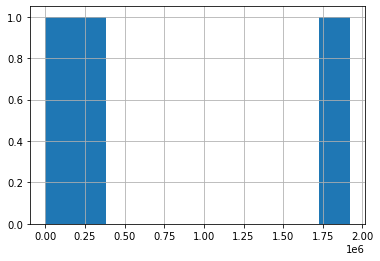

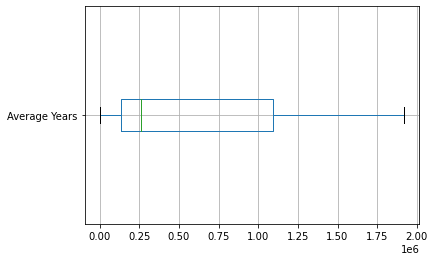

--------------------
South Africa
moy:
 2736988.6846493855
med:
 524121.03242631
mod:
 0    1.507078e+00
1    4.106485e+01
2    1.048201e+06
3    9.899711e+06
dtype: float64
var:
 17284644570479.795
ect:
 4157480.5556346015


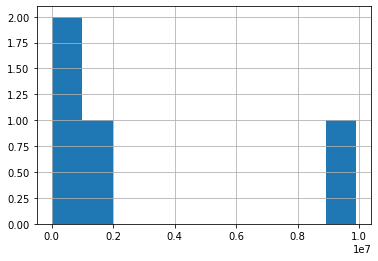

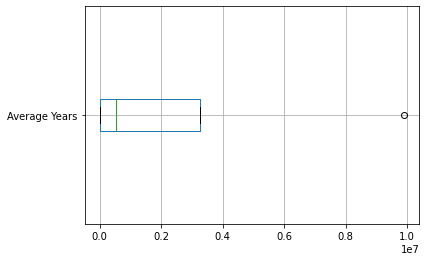

--------------------
South Sudan
moy:
 277854.0
med:
 277854.0
mod:
 0    277854.0
dtype: float64
var:
 0.0
ect:
 0.0


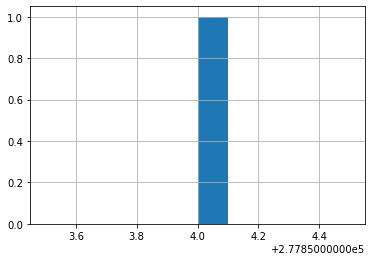

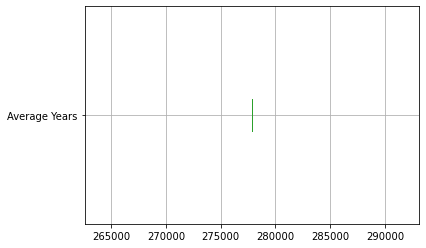

--------------------
Spain
moy:
 1358414.8799077151
med:
 424095.5
mod:
 0    3.043869e-02
1    7.153577e+01
2    4.240955e+05
3    1.951797e+06
4    4.416110e+06
dtype: float64
var:
 2852988650481.7764
ect:
 1689079.231558359


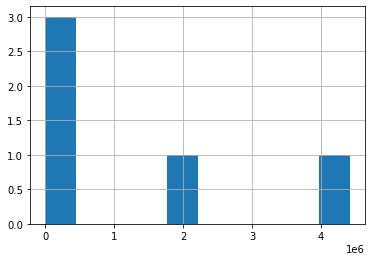

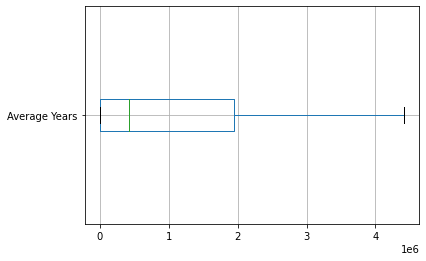

--------------------
Sri Lanka
moy:
 623915.5557718347
med:
 140243.49784479584
mod:
 0    8.128514e-01
1    9.526090e+00
2    2.049569e+01
3    2.804665e+05
4    3.399228e+05
5    3.123073e+06
dtype: float64
var:
 1268695211783.9978
ect:
 1126363.712032662


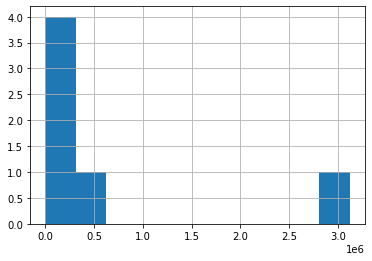

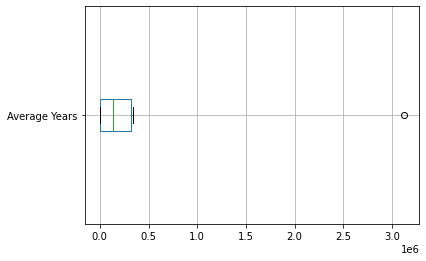

--------------------
St. Kitts and Nevis
moy:
 340.33175206352365
med:
 66.41666666666666
mod:
 0      1.078590
1     66.416667
2    953.500000
dtype: float64
var:
 188699.16085952963
ect:
 434.39516670829755


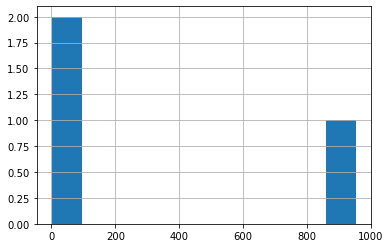

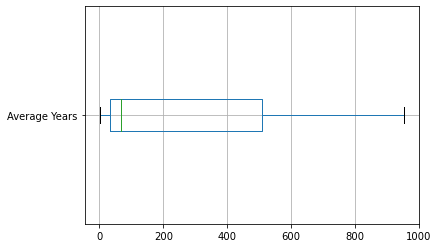

--------------------
St. Lucia
moy:
 6114.399745282022
med:
 1207.4109108725
mod:
 0        0.592012
1       14.317972
2       45.321822
3     2369.500000
4     3107.833333
5    31148.833333
dtype: float64
var:
 126868321.70954068
ect:
 11263.583875016899


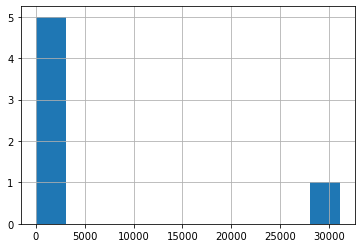

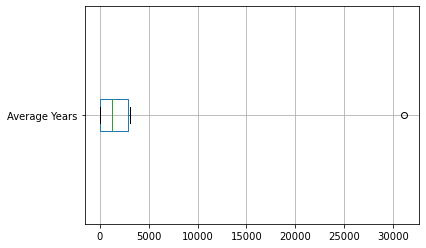

--------------------
St. Vincent and the Grenadines
moy:
 5969.052280051387
med:
 1017.5058333333333
mod:
 0        0.030787
1       42.178333
2     1992.833333
3    21841.166667
dtype: float64
var:
 84622846.1450899
ect:
 9199.067678036177


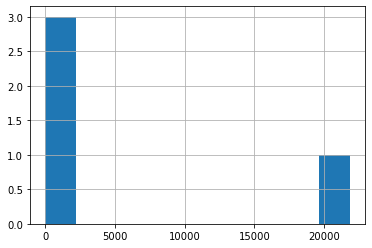

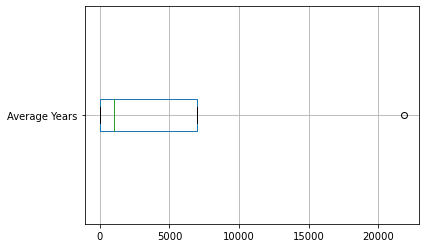

--------------------
Sudan
moy:
 2450195.623365685
med:
 458987.67624404584
mod:
 0    2.307641e+00
1    2.151915e+01
2    9.179538e+05
3    8.882805e+06
dtype: float64
var:
 13933256644162.094
ect:
 3732727.7752552615


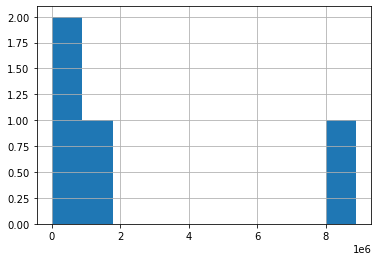

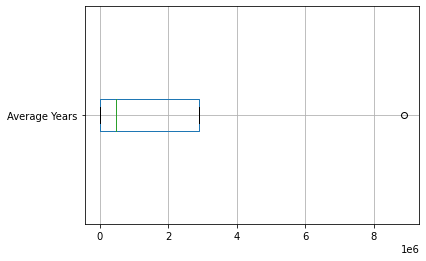

--------------------
Suriname
moy:
 22361.77444104399
med:
 4927.626252315
mod:
 0        1.011926
1       36.419171
2     9818.833333
3    79590.833333
dtype: float64
var:
 1107728935.3734353
ect:
 33282.56203139168


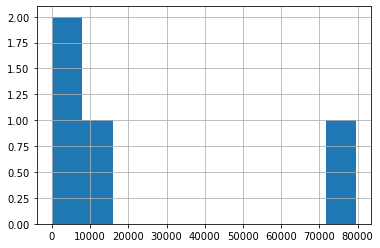

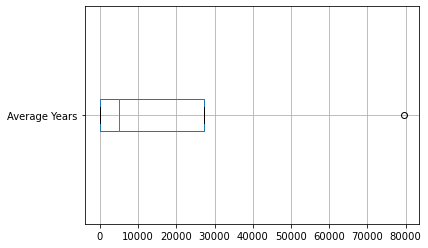

--------------------
Swaziland
moy:
 80697.93955921134
med:
 14783.789152551666
mod:
 0         1.846598
1        21.078305
2     29546.500000
3    293222.333333
dtype: float64
var:
 15200925769.747698
ect:
 123292.03449431637


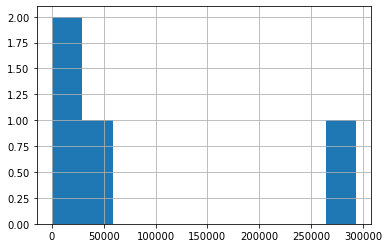

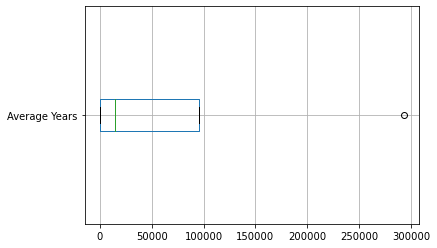

--------------------
Sweden
moy:
 346845.3702745057
med:
 97969.83333333333
mod:
 0    8.740769e-01
1    9.231063e+01
2    9.796983e+04
3    4.444145e+05
4    1.191749e+06
dtype: float64
var:
 205172052734.35538
ect:
 452959.21751781955


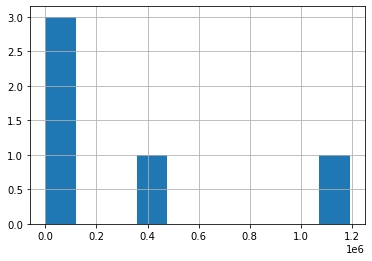

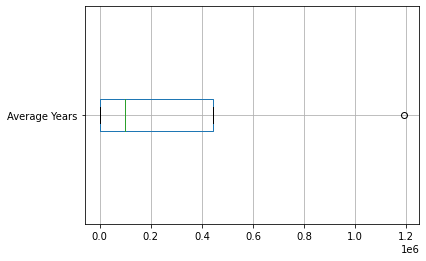

--------------------
Switzerland
moy:
 263680.50785536645
med:
 83266.66666666667
mod:
 0         1.120596
1        85.918681
2     83266.666667
3    273293.333333
4    961755.500000
dtype: float64
var:
 131791836374.28555
ect:
 363031.4536982788


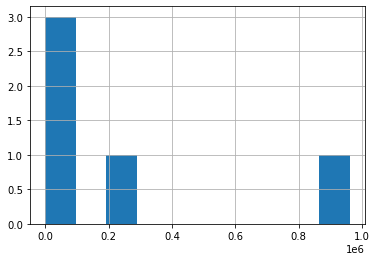

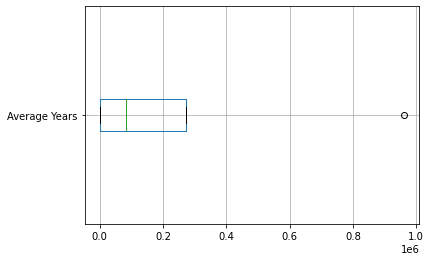

--------------------
Syrian Arab Republic
moy:
 1115803.106475536
med:
 481684.5
mod:
 0   -1.762605e+00
1    2.529498e+01
2    4.816845e+05
3    6.693698e+05
4    4.427938e+06
dtype: float64
var:
 2812325009948.611
ect:
 1676998.8103599271


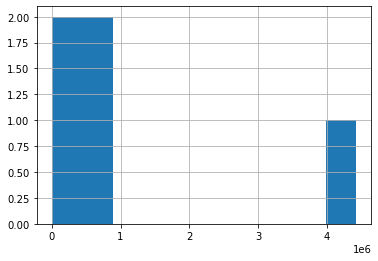

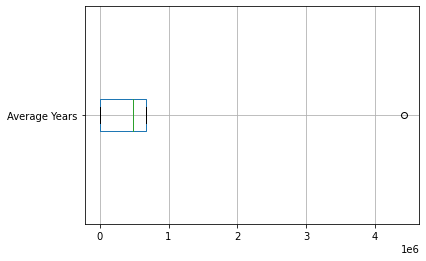

--------------------
Tajikistan
moy:
 407321.367003962
med:
 169757.83333333334
mod:
 0    2.241686e+00
1    1.526000e+01
2    1.697578e+05
3    2.016085e+05
4    1.665223e+06
dtype: float64
var:
 402575573825.4579
ect:
 634488.4347452347


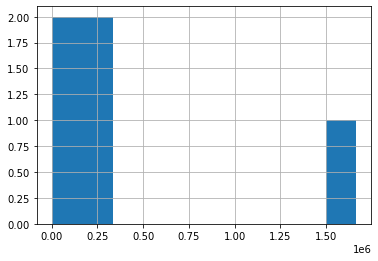

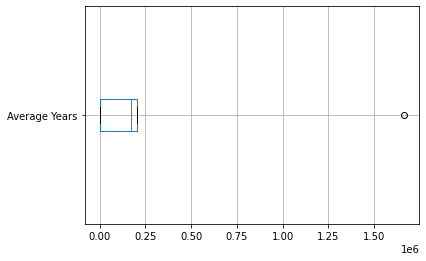

--------------------
Tanzania
moy:
 2602883.050356556
med:
 570067.2041666667
mod:
 0    3.126426e+00
1    5.241667e+00
2    1.140129e+06
3    9.271395e+06
dtype: float64
var:
 15039663221620.645
ect:
 3878100.4656430245


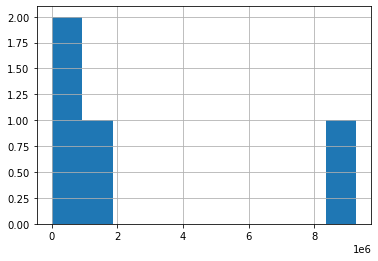

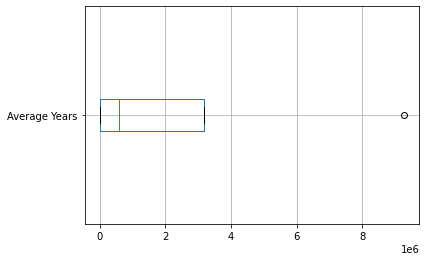

--------------------
Thailand
moy:
 2538942.0098815737
med:
 886793.8333333334
mod:
 0    4.367325e-01
1    2.927934e+01
2    8.867938e+05
3    2.404678e+06
4    9.403208e+06
dtype: float64
var:
 12551614473691.506
ect:
 3542825.775238109


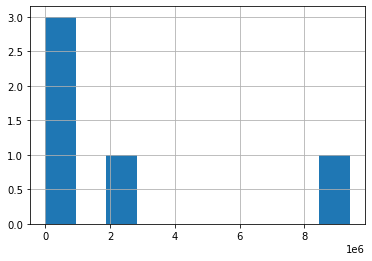

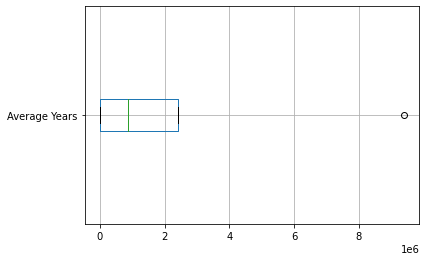

--------------------
Timor-Leste
moy:
 74917.3036202696
med:
 14188.125
mod:
 0         2.131148
1        10.916667
2     28365.333333
3    271290.833333
dtype: float64
var:
 12988224745.648579
ect:
 113965.89290506428


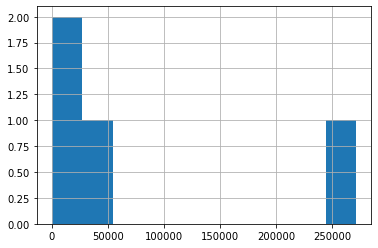

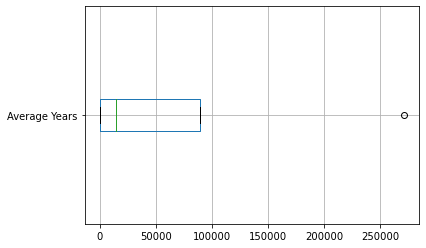

--------------------
Togo
moy:
 295987.1607871221
med:
 32657.34425163269
mod:
 0    2.639553e+00
1    4.636667e+00
2    1.835517e+01
3    6.529633e+04
4    1.604182e+05
5    1.550183e+06
dtype: float64
var:
 317902336727.5469
ect:
 563828.2865620941


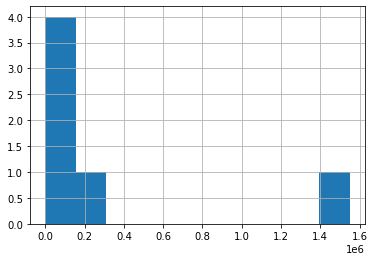

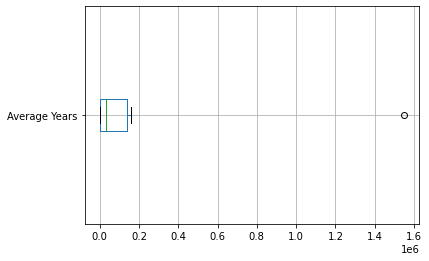

--------------------
Tonga
moy:
 6297.666199914885
med:
 1265.6133062075
mod:
 0        0.438187
1       29.726612
2     2501.500000
3    22659.000000
dtype: float64
var:
 90261567.21282303
ect:
 9500.60878116887


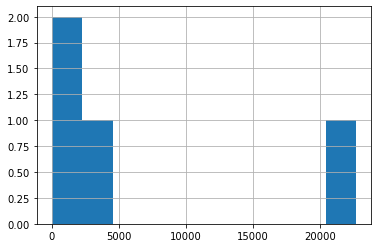

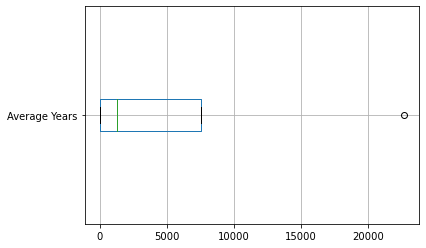

--------------------
Trinidad and Tobago
moy:
 58582.799342946135
med:
 8762.859555884166
mod:
 0         0.478260
1        60.219112
2     17465.500000
3    216805.000000
dtype: float64
var:
 8395419456.599148
ect:
 91626.52157863


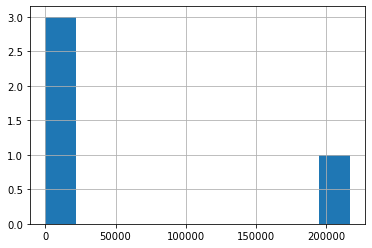

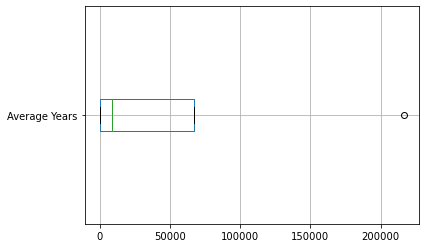

--------------------
Tunisia
moy:
 487560.82410317735
med:
 161808.5
mod:
 0    1.150277e+00
1    4.263691e+01
2    1.618085e+05
3    3.468667e+05
4    1.929085e+06
dtype: float64
var:
 535858054237.6875
ect:
 732023.2607217393


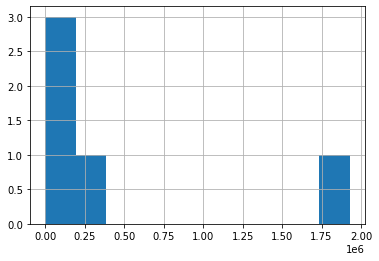

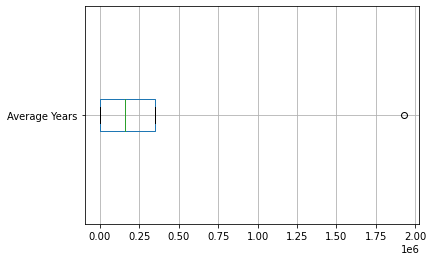

--------------------
Turkey
moy:
 3965973.877481115
med:
 1320489.0
mod:
 0    1.545624e+00
1    4.650845e+01
2    1.320489e+06
3    4.701843e+06
4    1.380749e+07
dtype: float64
var:
 27170606693704.168
ect:
 5212543.207850096


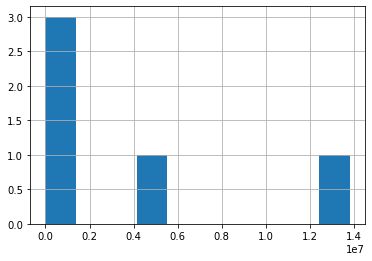

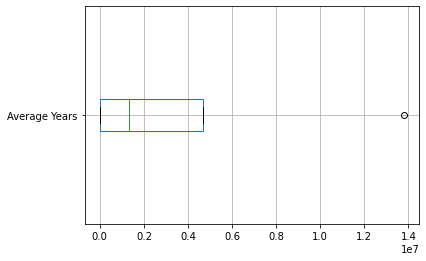

--------------------
Turkmenistan
moy:
 296310.5643629798
med:
 48224.249381235
mod:
 0    1.758689e+00
1    8.665429e+00
2    9.643983e+04
3    1.088792e+06
dtype: float64
var:
 210892214645.77838
ect:
 459230.02367634716


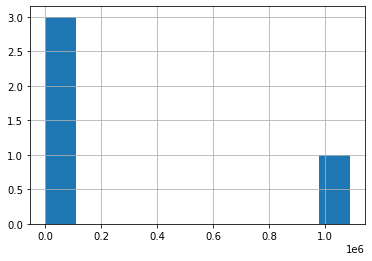

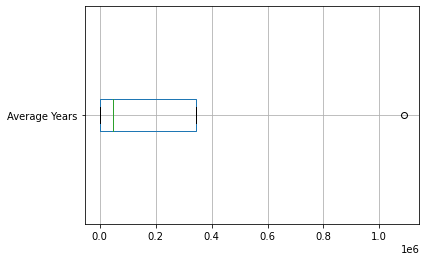

--------------------
Turks and Caicos Islands
moy:
 2.1158475487887567
med:
 2.1158475487887567
mod:
 0    2.115848
dtype: float64
var:
 0.0
ect:
 0.0


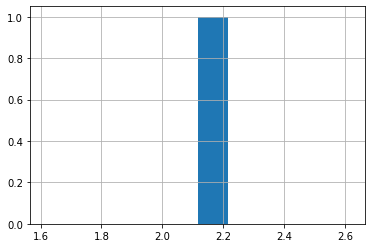

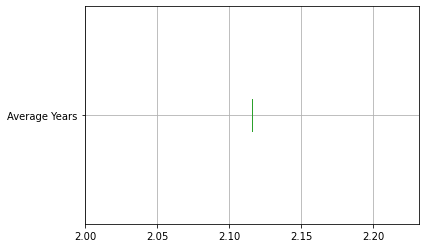

--------------------
Tuvalu
moy:
 85.2846989691629
med:
 34.81666666666666
mod:
 0      0.870764
1     34.816667
2    220.166667
dtype: float64
var:
 9288.626661102915
ect:
 96.37752155509558


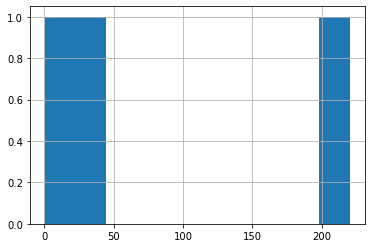

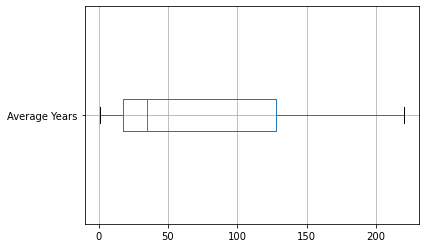

--------------------
Uganda
moy:
 2139682.6308641713
med:
 464638.2373669
mod:
 0    3.382056e+00
1    1.497473e+01
2    9.292615e+05
3    7.629451e+06
dtype: float64
var:
 10189769341857.773
ect:
 3192141.8110506576


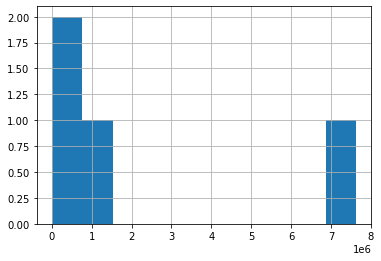

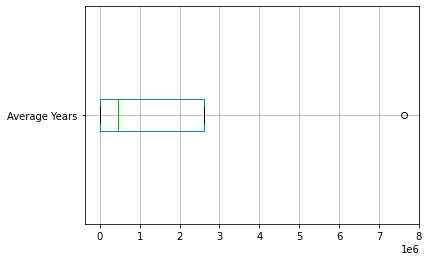

--------------------
Ukraine
moy:
 1650427.4460340007
med:
 373862.3333333333
mod:
 0   -3.286652e-01
1    3.722550e+01
2    3.738623e+05
3    2.286681e+06
4    5.591557e+06
dtype: float64
var:
 4602928010839.021
ect:
 2145443.5464115622


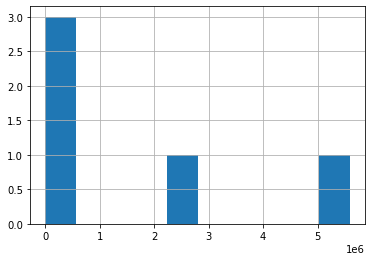

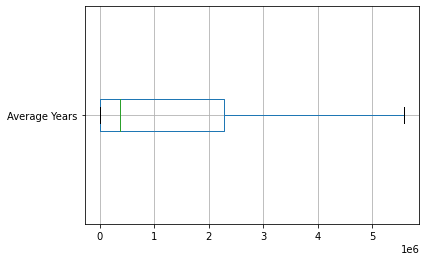

--------------------
United Arab Emirates
moy:
 210300.65157340316
med:
 64171.82499929166
mod:
 0         2.956295
1        83.316665
2    128260.333333
3    712856.000000
dtype: float64
var:
 86927235146.09813
ect:
 294834.2502934456


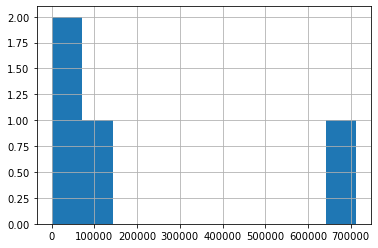

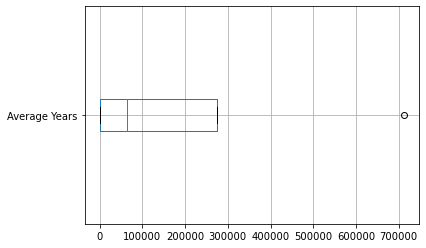

--------------------
United Kingdom
moy:
 2152141.1997137484
med:
 351928.0261997475
mod:
 0    7.464555e-01
1    8.855240e+01
2    7.037675e+05
3    7.904708e+06
dtype: float64
var:
 11113212573285.254
ect:
 3333648.5377563806


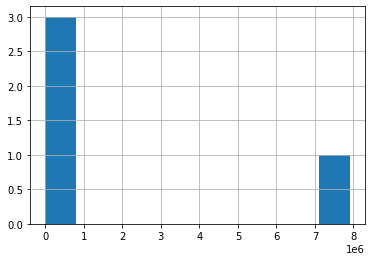

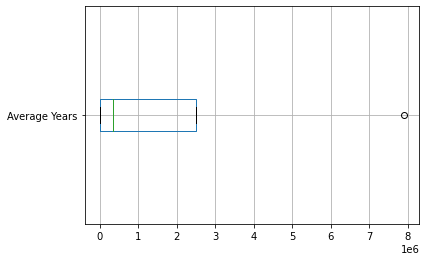

--------------------
United States
moy:
 13924558.88584125
med:
 4105284.0
mod:
 0    7.502624e-01
1    7.251228e+01
2    4.105284e+06
3    2.027375e+07
4    4.524368e+07
dtype: float64
var:
 301080534715540.9
ect:
 17351672.389586568


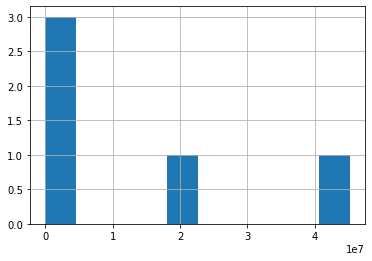

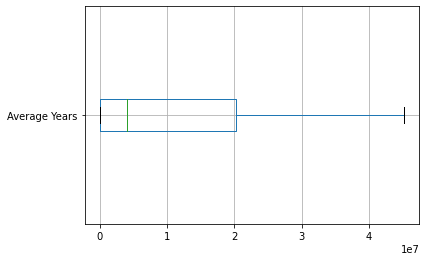

--------------------
Uruguay
moy:
 142556.66806814953
med:
 25491.750702478334
mod:
 0         0.337534
1        56.001405
2     50927.500000
3    519242.833333
dtype: float64
var:
 47729279729.4447
ect:
 218470.31773090985


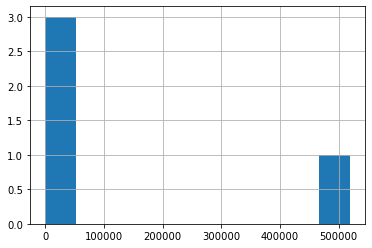

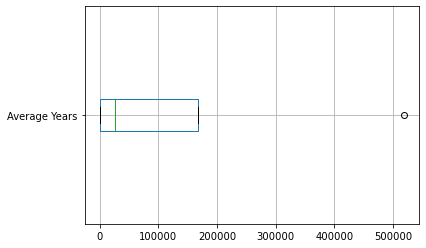

--------------------
Uzbekistan
moy:
 1380261.1057342747
med:
 267498.3333333333
mod:
 0    1.995338e+00
1    2.720000e+01
2    2.674983e+05
3    5.091142e+05
4    6.124664e+06
dtype: float64
var:
 5663331213021.594
ect:
 2379775.4543279065


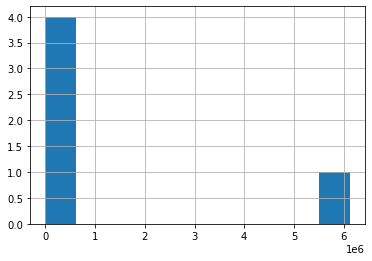

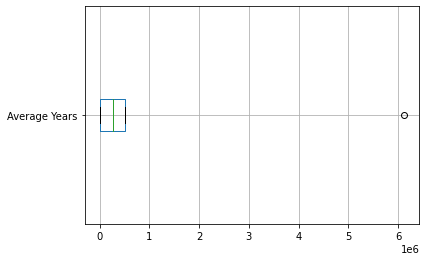

--------------------
Vanuatu
moy:
 14628.663492058738
med:
 2791.104117048333
mod:
 0        2.279067
1       13.374901
2     5568.833333
3    52930.166667
dtype: float64
var:
 494155862.47052634
ect:
 22229.616786407416


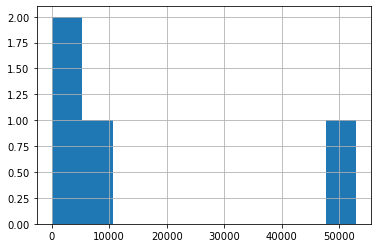

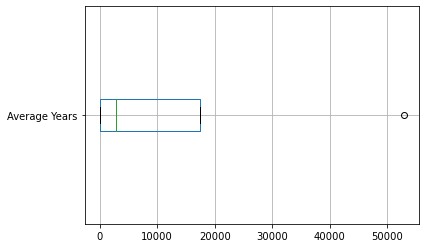

--------------------
Venezuela, RB
moy:
 1504038.708787462
med:
 281681.2007775967
mod:
 0    1.433595e+00
1    5.006822e+01
2    5.633123e+05
3    5.452791e+06
dtype: float64
var:
 5250430181737.777
ect:
 2291381.7189062536


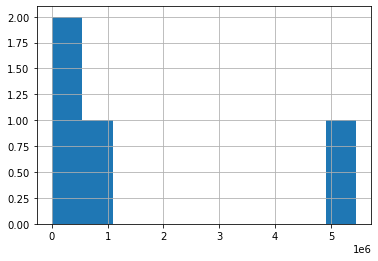

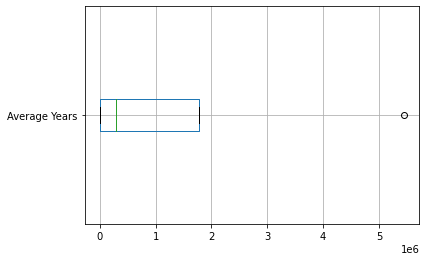

--------------------
Vietnam
moy:
 4283832.130764851
med:
 1327671.8333333333
mod:
 0    1.067158e+00
1    3.758667e+01
2    1.327672e+06
3    2.319985e+06
4    1.777147e+07
dtype: float64
var:
 46242787749366.54
ect:
 6800204.978481644


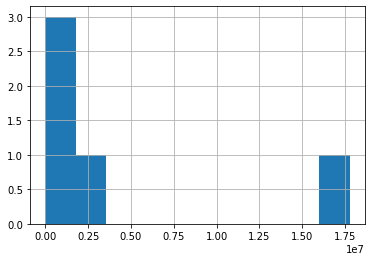

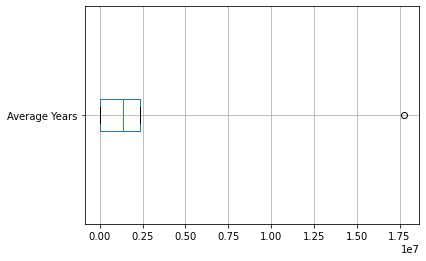

--------------------
Virgin Islands (U.S.)
moy:
 21.216416211857897
med:
 21.216416211857897
mod:
 0    -0.496674
1    42.929506
dtype: float64
var:
 471.4582775569262
ect:
 21.713090004808763


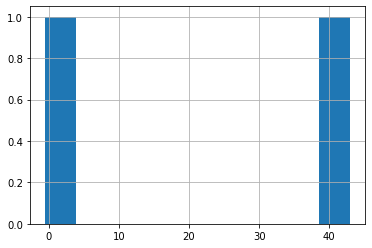

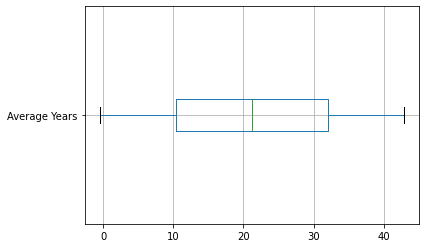

--------------------
West Bank and Gaza
moy:
 257608.4114474827
med:
 110228.66666666667
mod:
 0         2.961539
1        46.595699
2    110228.666667
3    212711.666667
4    965052.166667
dtype: float64
var:
 131382366083.34041
ect:
 362467.0551696256


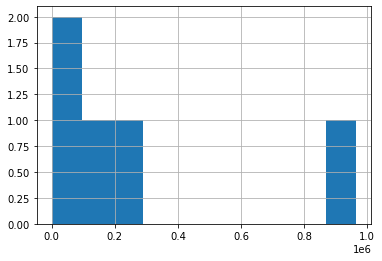

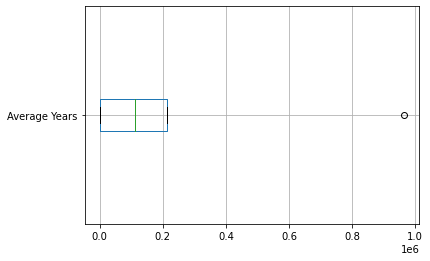

--------------------
Yemen, Rep.
moy:
 1576869.8820588028
med:
 309270.52807578916
mod:
 0    2.638750e+00
1    1.855615e+01
2    6.185225e+05
3    5.688936e+06
dtype: float64
var:
 5700121624841.249
ect:
 2387492.7486468414


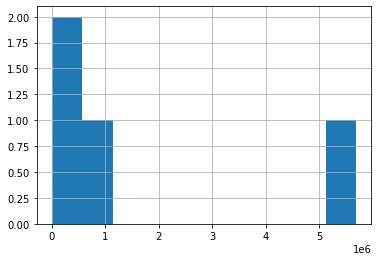

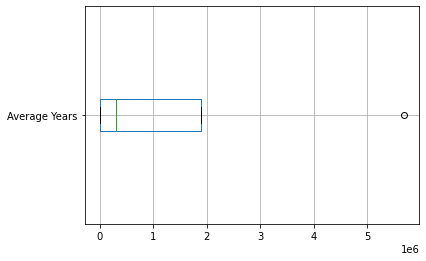

--------------------
Zambia
moy:
 813213.2628401597
med:
 180591.6140166667
mod:
 0    2.989994e+00
1    1.506137e+01
2    3.611682e+05
3    2.891667e+06
dtype: float64
var:
 1461729069103.1553
ect:
 1209019.8795318278


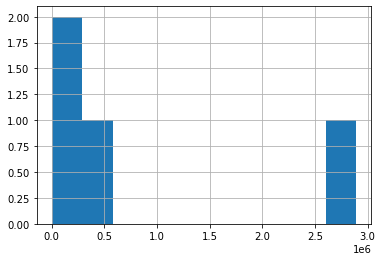

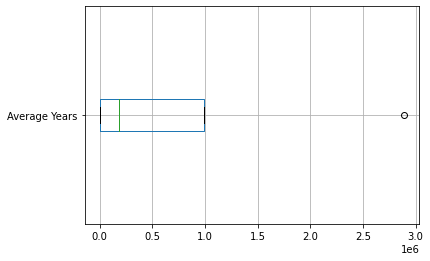

--------------------
Zimbabwe
moy:
 928979.1550875355
med:
 172905.45062983833
mod:
 0    2.219090e+00
1    1.356793e+01
2    3.457973e+05
3    3.370104e+06
dtype: float64
var:
 2006291078573.276
ect:
 1416436.0481762937


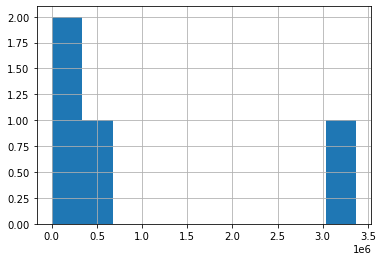

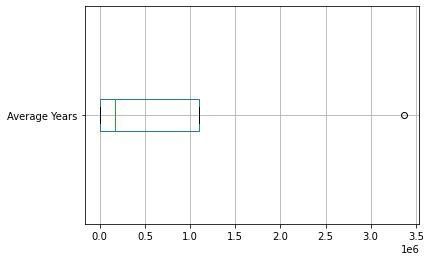

In [90]:
for pays in df3["Country Name"].unique():
    subset = df3.loc[df3["Country Name"] == pays]
    print("-"*20)
    print(pays)
    print("moy:\n",subset['Average Years'].mean())
    print("med:\n",subset['Average Years'].median())
    print("mod:\n",subset['Average Years'].mode())
    print("var:\n",subset['Average Years'].var(ddof=0))
    print("ect:\n",subset['Average Years'].std(ddof=0))
    subset["Average Years"].hist()
    plt.show()
    subset.boxplot(column="Average Years", vert=False)
    plt.show()

## Partie 5: Analyse des données



Quels sont les 20 pays avec un fort potentiel de clients pour nos services ?
d'abord nous voyons notre df en groupant sur les pays et les indicateurs et après nous allons trouver les pays avec un fort potentiel selon des indicateurs 

In [91]:
df3

,Country Name,Country Code,Indicator Name,Indicator Code,Currency Unit,Region,Income Group,Average Years
92849,Afghanistan,AFG,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,Afghan afghani,South Asia,Low income,1.409175e+01
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,Afghan afghani,South Asia,Low income,5.935758e+00
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,Afghan afghani,South Asia,Low income,3.103683e+00
93963,Afghanistan,AFG,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1,Afghan afghani,South Asia,Low income,8.041300e+05
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,Afghan afghani,South Asia,Low income,6.679801e+06
...,...,...,...,...,...,...,...,...
882082,Zambia,ZMB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,New Zambian kwacha,Sub-Saharan Africa,Lower middle income,2.891667e+06
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,U.S. dollar,Sub-Saharan Africa,Low income,1.356793e+01
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,U.S. dollar,Sub-Saharan Africa,Low income,2.219090e+00
885603,Zimbabwe,ZWE,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1,U.S. dollar,Sub-Saharan Africa,Low income,3.457973e+05


Quels sont les meilleurs pays par indicateur Internet users (per 100 people)?

Text(0, 0.5, 'Classement des pays pour 2010-2015')

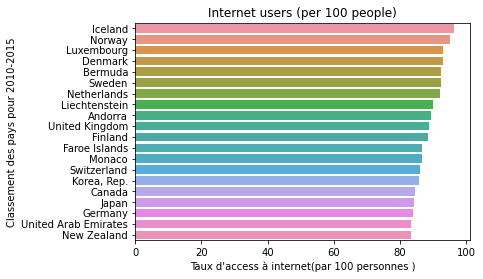

In [92]:
# Définir un neveau datafarme en filtrant sur un indicateur
df_Indict_Internet= df3[df3['Indicator Name']=='Internet users (per 100 people)']
# Sorting et choisir 20 pays qui sont les plus valeurs
top20_Country = df_Indict_Internet.sort_values('Average Years', ascending=False).head(20)
# Donnez la liste des 20 pays les mieux classés par rapport à utilisateur d'internet
plt.title('Internet users (per 100 people)')
sns.barplot(x=top20_Country['Average Years'], y=top20_Country['Country Name'])
plt.xlabel("Taux d'access à internet(par 100 personnes )")
plt.ylabel('Classement des pays pour 2010-2015')

Text(0.5, 0, 'Taux de croissance de la population')

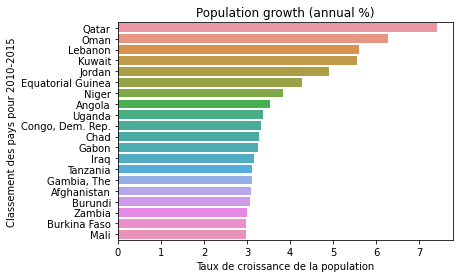

In [93]:
#Donnez la liste des 20 pays les mieux classés par rapport à Population growth (annual %)
df_indic_Population_Growth= df3[df3['Indicator Name']=='Population growth (annual %)']
top20_Country = df_indic_Population_Growth.sort_values('Average Years', ascending=False).head(20)
plt.title('Population growth (annual %)')
sns.barplot(x=top20_Country['Average Years'], y=top20_Country['Country Name'])
plt.ylabel('Classement des pays pour 2010-2015')
plt.xlabel('Taux de croissance de la population')

Quels sont les meilleurs pays par indicateur Population of the official entrance age to secondary general education, both sexes (number) ?

Text(0.5, 0, "Population d'entrée au lycée")

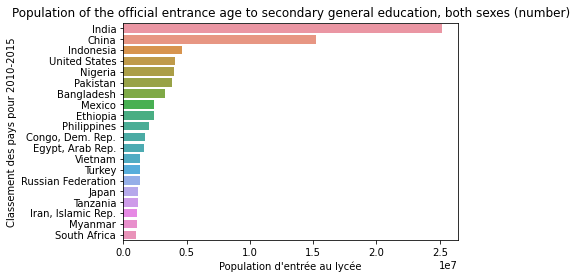

In [94]:
#Donnez la liste des 20 pays les mieux classés par rapport à Population of the official entrance age to secondary general education, both sexes (number)
df_Population_Secondary= df3[df3['Indicator Name']=='Population of the official entrance age to secondary general education, both sexes (number)']
top20_Country = df_Population_Secondary.sort_values('Average Years', ascending=False).head(20)
# plot
sns.barplot(x=top20_Country['Average Years'], y=top20_Country['Country Name'])
plt.title('Population of the official entrance age to secondary general education, both sexes (number)')
plt.ylabel('Classement des pays pour 2010-2015')
plt.xlabel("Population d'entrée au lycée")

Quels sont les meilleurs pays par indicateur Population, ages 15-24, total ?

Text(0.5, 0, 'la polulation entre 15-24')

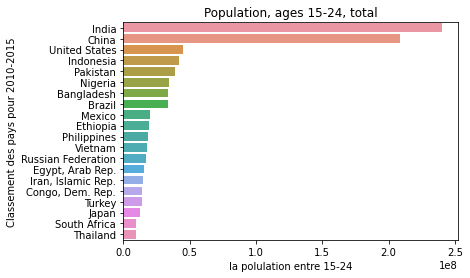

In [95]:
#Donnez la liste des 20 pays les mieux classés par rapport à Population, ages 15-24, total
df_Population_15_24= df3[df3['Indicator Name']=='Population, ages 15-24, total']
top20_Country = df_Population_15_24.sort_values('Average Years', ascending=False).head(20)

plt.title('Population, ages 15-24, total')
sns.barplot(x=top20_Country['Average Years'], y=top20_Country['Country Name'])
plt.ylabel('Classement des pays pour 2010-2015')
plt.xlabel('la polulation entre 15-24')


Quels sont les meilleurs pays par indicateur Enrolment in tertiary education, all programmes, both sexes (number) ?

Text(0.5, 0, "nombre d'Inscriptions dans l'enseignement supérieur")

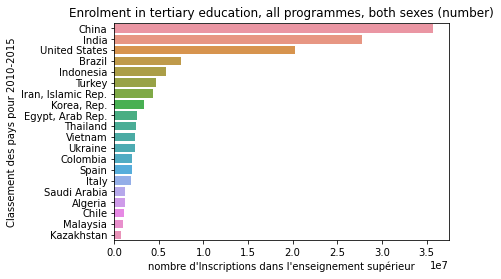

In [96]:
#Donnez la liste des 20 pays les mieux classés par rapport à Enrolment in tertiary education, all programmes, both sexes (number)
df_Enrolment_Tertiary= df3[df3['Indicator Name']=='Enrolment in tertiary education, all programmes, both sexes (number)']
top20_Country = df_Enrolment_Tertiary.sort_values('Average Years', ascending=False).head(20)
# plot
plt.title('Enrolment in tertiary education, all programmes, both sexes (number)')
sns.barplot(x=top20_Country['Average Years'], y=top20_Country['Country Name'])
plt.ylabel('Classement des pays pour 2010-2015')
plt.xlabel("nombre d'Inscriptions dans l'enseignement supérieur")

Quels sont les meilleurs pays par indicateur Expenditure on education as % of total government expenditure (%)?

Text(0.5, 0, "Taux de dépenses d'éducation en % des dépenses publiques totales")

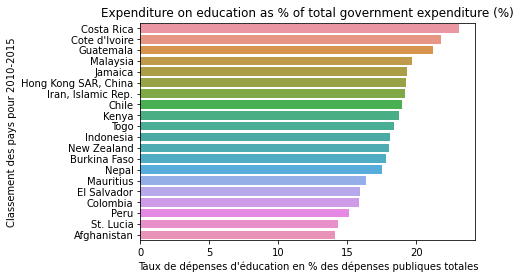

In [97]:
#Donnez la liste des 20 pays les mieux classés par rapport à Expenditure on education as % of total government expenditure (%)
df_Indic_Expenditure= df3[df3['Indicator Name']=='Expenditure on education as % of total government expenditure (%)']
top20_Country = df_Indic_Expenditure.sort_values('Average Years', ascending=False).head(20)
#plot
plt.title('Expenditure on education as % of total government expenditure (%)')
sns.barplot(x=top20_Country['Average Years'], y=top20_Country['Country Name'])
plt.ylabel('Classement des pays pour 2010-2015')
plt.xlabel("Taux de dépenses d'éducation en % des dépenses publiques totales")

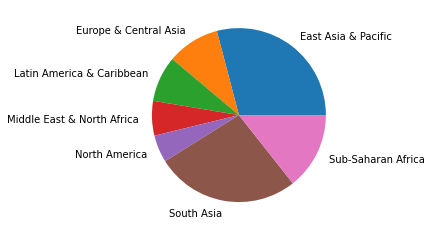

In [98]:
# faire un groupby par regions 
df_region = df3.groupby(by=["Region"]).sum()

names= df_region.index
values=df_region['Average Years']
plt.pie(values, labels=names, labeldistance=1.15);
plt.show();



### Création des scores
#### I. Quels sont les pays avec un fort potentiel de clients pour nos services sur tous les indicateurs ?

On utilise un classement par quartiles un score entre 0 et 3 pour chaque indicateur afin de noter le critère indicateur de chaque pays (3 pays pour la plus potentiel, 0 pour la moins potentiel).

In [103]:
# faire un groupby par pays pour avoir tous les scores pour chaque pays sur une ligne
df4 = df3.groupby(by=["Country Name"]).sum()
df4

,Average Years,Score_Internet_User,Score_Population_Growth,Score_Population_Secondary,Score_Population_15_24,Score_Enrolment_Tertiary,Score_Indic_Expenditure
Country Name,,,,,,,
Afghanistan,7.483954e+06,0.0,3.0,3.0,3.0,0.0,0.0
Albania,7.862124e+05,2.0,0.0,1.0,1.0,1.0,0.0
Algeria,8.665805e+06,1.0,2.0,3.0,3.0,3.0,0.0
American Samoa,-2.057934e-01,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,8.788385e+01,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Virgin Islands (U.S.),4.243283e+01,2.0,0.0,0.0,0.0,0.0,0.0
West Bank and Gaza,1.288042e+06,2.0,3.0,1.0,1.0,1.0,0.0
"Yemen, Rep.",6.307480e+06,1.0,3.0,3.0,3.0,0.0,0.0


In [104]:
df3['Score_Internet_User'] = pd.qcut(df_Indict_Internet['Average Years'], 4, labels = False) 
df3['Score_Population_Growth'] = pd.qcut(df_indic_Population_Growth['Average Years'], 4, labels = False) 
df3['Score_Population_Secondary'] = pd.qcut(df_Population_Secondary['Average Years'], 4, labels = False) 
df3['Score_Population_15_24'] = pd.qcut(df_Population_15_24['Average Years'], 4, labels = False) 
df3['Score_Enrolment_Tertiary'] = pd.qcut(df_Enrolment_Tertiary['Average Years'], 4, labels = False) 
df3['Score_Indic_Expenditure'] = pd.qcut(df_Indic_Expenditure['Average Years'], 4, labels = False) 
df3

,Country Name,Country Code,Indicator Name,Indicator Code,Currency Unit,Region,Income Group,Average Years,Score_Internet_User,Score_Population_Growth,Score_Population_Secondary,Score_Population_15_24,Score_Enrolment_Tertiary,Score_Indic_Expenditure
92849,Afghanistan,AFG,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,Afghan afghani,South Asia,Low income,1.409175e+01,NaN,NaN,NaN,NaN,NaN,0.0
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,Afghan afghani,South Asia,Low income,5.935758e+00,0.0,NaN,NaN,NaN,NaN,NaN
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,Afghan afghani,South Asia,Low income,3.103683e+00,NaN,3.0,NaN,NaN,NaN,NaN
93963,Afghanistan,AFG,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1,Afghan afghani,South Asia,Low income,8.041300e+05,NaN,NaN,3.0,NaN,NaN,NaN
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,Afghan afghani,South Asia,Low income,6.679801e+06,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882082,Zambia,ZMB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,New Zambian kwacha,Sub-Saharan Africa,Lower middle income,2.891667e+06,NaN,NaN,NaN,2.0,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,U.S. dollar,Sub-Saharan Africa,Low income,1.356793e+01,0.0,NaN,NaN,NaN,NaN,NaN
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,U.S. dollar,Sub-Saharan Africa,Low income,2.219090e+00,NaN,2.0,NaN,NaN,NaN,NaN
885603,Zimbabwe,ZWE,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1,U.S. dollar,Sub-Saharan Africa,Low income,3.457973e+05,NaN,NaN,2.0,NaN,NaN,NaN


Sélectionner les pays pour lesquels tous Scores sont supérieure à une valeur (le 3ème quartile), Par exemple un pays qui est dans le 3.0 sur plusieurs indicateurs aura un meilleur score qu'un pays qui n'y apparait qu'une fois(les meilleurs pays sont ceux pour lesquels la valeur de tous leurs indicateurs sont supérieurs au 3e quartile). Donc pour réaliser ça nous ajoutons une colonne qui a fait une moyennes des score des indiquateurs de chaque pays et après nous faisons un tri par cette valeur pour afficher les 20 pays avec un fort potentiel 

Text(0, 0.5, 'Classement des pays pour 2010-2015')

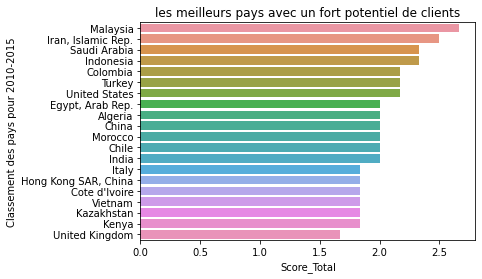

In [119]:
df4["Score_Total"] = (df4["Score_Internet_User"]+ df4["Score_Population_Growth"]+ df4["Score_Population_Secondary"]+ df4["Score_Population_15_24"]+ df4["Score_Enrolment_Tertiary"]+ df4["Score_Indic_Expenditure"])/6
top20_Country = df4.sort_values('Score_Total', ascending=False).head(20)

# plot- les meilleurs pays avec un fort potentiel 2010_2015
plt.title('les meilleurs pays avec un fort potentiel de clients')
sns.barplot(x=top20_Country['Score_Total'], y=top20_Country.index[0:20])
plt.ylabel('Classement des pays pour 2010-2015')


##### II. Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

on voit qu'il n'y a que certains indicateurs renseignés dans les années 2020 à 2100, et c'est ceux là qu'on utilise pour voir une évolution. Il y a d'autre méthode qu'on trace l'évolution d'un des indicateurs comme 'Population, ages 15-24, total' pour la période 2020-2100, seulement pour notre 10 pays et pusique avec la librarie Scipy on extrapole des valeurs NAN des années 2020_2100. 
j'ai choisi la première méthode, utiliser les indicateurs Wittgenstein Projection.


In [107]:
country_nominated = top20_Country.index[0:15]
country_nominated

Index(['Malaysia', 'Iran, Islamic Rep.', 'Saudi Arabia', 'Indonesia',
       'Colombia', 'Turkey', 'United States', 'Egypt, Arab Rep.', 'Algeria',
       'China', 'Morocco', 'Chile', 'India', 'Italy', 'Hong Kong SAR, China'],
      dtype='object', name='Country Name')

In [108]:
#Filtre pour les pays nommé
mask = df['Country Name'].isin(country_nominated)
data = df[mask]

# Supprimer les colonnes supplémetaire 
data1 =data.drop(labels=['Currency Unit','Short Name','Table Name', 'Long Name', '2-alpha code','WB-2 code', 'Special Notes', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data'], axis = 1)

Trouver les indicateurs pas NAN pour les années 2020_2100 

In [109]:
# Supprimer une ligne NAN en fonction de plusieurs colonnes
data1.dropna(axis=0, how='any', subset=['2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095','2100'] , inplace=True)
# Garder justement les année 2020-2100
df_final = data1.drop(labels=['2010', '2011', '2012', '2013', '2014', '2015','2016','2017'], axis = 1) 
df_final["Indicator Name"].unique()


array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

In [110]:
 # Filter df avec une liste des indicateurs
list2_indic = ['Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total','Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total']
mask = df_final['Indicator Name'].isin(list2_indic)
df_final2 = df_final[mask]

# Calculer la moyennes des années 2020_2100
df_final2['Average Years Projection'] = df_final2[['2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095','2100']].mean(axis=1)
df_final2

/var/folders/2q/11qj63n15x1fpx2f8p6f5vd00000gn/T/ipykernel_8195/3869963856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['Average Years Projection'] = df_final2[['2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095','2100']].mean(axis=1)


,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,...,2070,2075,2080,2085,2090,2095,2100,Region,Income Group,Average Years Projection
102551,Algeria,DZA,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,196.35,237.01,266.81,288.81,295.19,292.16,...,340.46,330.57,327.41,325.82,325.93,318.61,305.86,Middle East & North Africa,Upper middle income,303.830588
102569,Algeria,DZA,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.4.MF,741.46,867.30,1044.45,1173.91,1269.20,1296.32,...,1528.91,1498.30,1456.92,1445.22,1440.61,1443.57,1413.64,Middle East & North Africa,Upper middle income,1302.508235
241821,Chile,CHL,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Latin America & Caribbean,High income: OECD,0.000000
241839,Chile,CHL,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.4.MF,225.17,228.84,244.85,257.81,272.54,282.98,...,281.50,283.27,282.02,278.19,272.72,266.88,261.10,Latin America & Caribbean,High income: OECD,269.780588
245486,China,CHN,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,4241.67,4613.67,4565.19,4717.93,4737.50,4726.43,...,4426.82,4339.37,4237.17,4125.97,4013.39,3902.66,3793.76,East Asia & Pacific,Upper middle income,4405.804118
245504,China,CHN,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.4.MF,20805.42,20690.79,22443.92,22148.39,22836.48,22891.76,...,21698.02,21293.33,20881.01,20399.26,19875.36,19345.56,18825.06,East Asia & Pacific,Upper middle income,21415.642353
249151,Colombia,COL,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,205.06,225.41,236.11,251.42,262.68,270.90,...,284.06,283.16,274.93,268.80,261.56,251.79,241.71,Latin America & Caribbean,Upper middle income,261.784118
249169,Colombia,COL,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.4.MF,1126.57,1234.50,1357.20,1421.96,1514.41,1582.65,...,1732.65,1717.37,1713.57,1665.33,1629.75,1587.39,1529.51,Latin America & Caribbean,Upper middle income,1561.546471
307791,"Egypt, Arab Rep.",EGY,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.4.MF,39.32,45.62,51.71,56.03,59.31,62.53,...,73.23,74.48,74.68,73.71,72.08,71.20,69.44,Middle East & North Africa,Lower middle income,64.844706
307809,"Egypt, Arab Rep.",EGY,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.4.MF,1499.90,1733.94,2002.04,2260.28,2440.57,2575.39,...,3103.42,3157.20,3213.13,3224.85,3186.18,3119.86,3085.71,Middle East & North Africa,Lower middle income,2720.124706


Quels sont les meilleurs pays par indicateur 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total' ?

Text(0.5, 0, 'Population âgée de 15 à 19 ans en milliers')

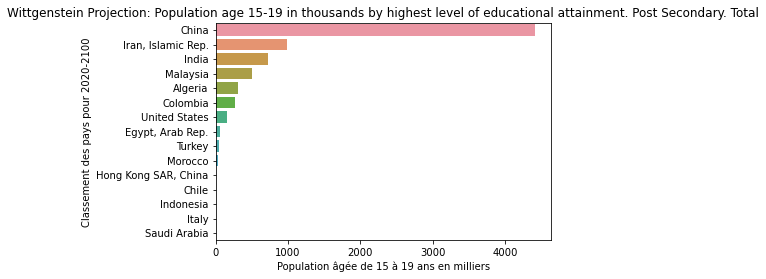

In [111]:
df_Indic_projection1= df_final2[df_final2['Indicator Name']=='Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total']
top_pays = df_Indic_projection1.sort_values('Average Years Projection', ascending=False)
#plot les meilleurs pays entre des années 2020_2100
plt.title('Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total')
sns.barplot(x=top_pays['Average Years Projection'], y=top_pays['Country Name'])
plt.ylabel('Classement des pays pour 2020-2100')
plt.xlabel('Population âgée de 15 à 19 ans en milliers')

Quels sont les meilleurs pays par indicateur 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total'?

Text(0.5, 0, 'Population âgée de 20 à 24 ans en milliers')

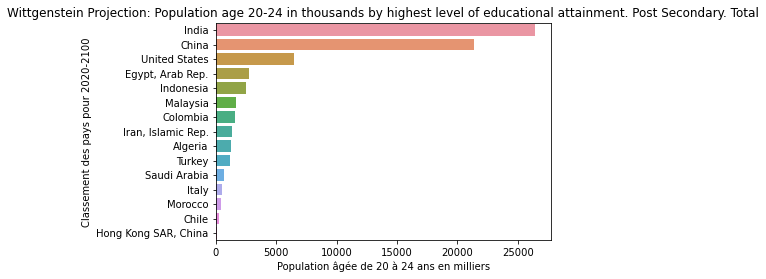

In [112]:
df_Indic_projection2= df_final2[df_final2['Indicator Name']=='Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total']
top_pays = df_Indic_projection2.sort_values('Average Years Projection', ascending=False)
#plot les meilleurs pays entre des années 2020_2100
plt.title('Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total')
sns.barplot(x=top_pays['Average Years Projection'], y=top_pays['Country Name'])
plt.ylabel('Classement des pays pour 2020-2100')
plt.xlabel('Population âgée de 20 à 24 ans en milliers')

Quels sont les meilleurs pays pour les deux indicateurs Wittgenstein Projection?

/var/folders/2q/11qj63n15x1fpx2f8p6f5vd00000gn/T/ipykernel_8195/1587591726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['Score_indic_project_15_19'] = pd.qcut(df_Indic_projection1['Average Years Projection'], 4, labels = False)
/var/folders/2q/11qj63n15x1fpx2f8p6f5vd00000gn/T/ipykernel_8195/1587591726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['Score_indic_project_20_24'] = pd.qcut(df_Indic_projection2['Average Years Projection'], 4, labels = False)


Text(0, 0.5, 'Classement des pays pour 2020-2100')

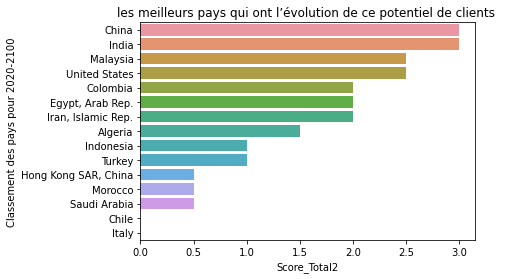

In [113]:
# classement par quartiles un score entre 0 et 3 pour chaque indicateur
df_final2['Score_indic_project_15_19'] = pd.qcut(df_Indic_projection1['Average Years Projection'], 4, labels = False) 
df_final2['Score_indic_project_20_24'] = pd.qcut(df_Indic_projection2['Average Years Projection'], 4, labels = False) 

# 10 top pays qui ont les meilleurs scores pour deux indicateurs
df_final3 = df_final2.groupby(by=["Country Name"]).sum()
df_final3["Score_Total2"] = (df_final3["Score_indic_project_15_19"]+ df_final3["Score_indic_project_20_24"])/2
top15 = df_final3.sort_values('Score_Total2', ascending=False).head(15)

#Plot les meilleurs pays entre des années 2020_2100
plt.title('les meilleurs pays qui ont l’évolution de ce potentiel de clients ')
sns.barplot(x=top15['Score_Total2'], y=top15.index[0:15])
plt.ylabel('Classement des pays pour 2020-2100')


##### Dans quels pays l'entreprise doit-elle opérer en priorité ?
les pays commun entre les deux étapes précedants. les pays qui ont eu un fort potentiel pendant des années 2010_2015 et aussi ils ont toujours un fort potentiel pour les années 2020 à 2100. les pays qui ont eu un fort potentiel pour devenir des clients dans le passé et qui ont un fort potentiel pour devenir des clients à l'avenir

In [116]:
# les meilleurs pays entre les années 2010_2015
list1 = top20_Country.index[0:10]
list1

Index(['Malaysia', 'Iran, Islamic Rep.', 'Saudi Arabia', 'Indonesia',
       'Colombia', 'Turkey', 'United States', 'Egypt, Arab Rep.', 'Algeria',
       'China'],
      dtype='object', name='Country Name')

In [117]:
# les meilleurs pays entre les années 2020_2100
country_nominated2 = top15.index[0:15]
list2 = country_nominated2[0:10]
list2

Index(['China', 'India', 'Malaysia', 'United States', 'Colombia',
       'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Algeria', 'Indonesia',
       'Turkey'],
      dtype='object', name='Country Name')

In [118]:
# les pays communs entre deux list
common_country = list(set(list1).intersection(list2))
common_country

['Egypt, Arab Rep.',
 'China',
 'Malaysia',
 'Algeria',
 'Turkey',
 'Iran, Islamic Rep.',
 'United States',
 'Colombia',
 'Indonesia']